# Importa bibliotecas

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import yfinance as yf
from pypfopt import EfficientFrontier, risk_models, expected_returns
import numpy as np

# Puxa dados e maiores correlações de ativos do yahoo finance

In [78]:
acoes_b3 = [
    # 100 ações
    "PETR4.SA", "VALE3.SA", "ITUB4.SA", "BBDC4.SA", "BBAS3.SA", "ABEV3.SA",
    "WEGE3.SA", "MGLU3.SA", "B3SA3.SA", "RENT3.SA", "EQTL3.SA", "ITSA4.SA",
    "SUZB3.SA", "JBSS3.SA", "GGBR4.SA", "ELET3.SA", "BBDC3.SA", "CSNA3.SA",
    "UGPA3.SA", "ELET6.SA", "TAEE11.SA", "BRFS3.SA", "BRKM5.SA", "ENBR3.SA",
    "KLBN11.SA", "BBSE3.SA", "PRIO3.SA", "SBSP3.SA", "CSAN3.SA", "GOLL4.SA",
    "TOTS3.SA", "CPLE6.SA", "VIVT3.SA", "LREN3.SA", "EMBR3.SA", "CMIG4.SA",
    "MULT3.SA", "CCRO3.SA", "RAIL3.SA", "TIMS3.SA", "YDUQ3.SA", "AMER3.SA",
    "DXCO3.SA", "LWSA3.SA", "MRFG3.SA", "CVCB3.SA", "QUAL3.SA", "VBBR3.SA",
    "BRML3.SA", "POSI3.SA", "PETZ3.SA", "RAIZ4.SA", "ENGI11.SA", "ALPA4.SA",
    "CPFE3.SA", "SULA11.SA", "EZTC3.SA", "MEAL3.SA", "CYRE3.SA", "HAPV3.SA",
    "NTCO3.SA", "TRPL4.SA", "ARZZ3.SA", "CRFB3.SA", "GOAU4.SA", "SLCE3.SA",
    "SANB11.SA", "MRVE3.SA", "PCAR3.SA", "RECV3.SA", "STBP3.SA", "BPAC11.SA",
    "BEEF3.SA", "MOVI3.SA", "AESB3.SA", "TASA4.SA", "SEER3.SA", "NEOE3.SA",
    "LIGT3.SA", "VIIA3.SA", "AZUL4.SA", "RAPT4.SA", "POMO4.SA", "USIM5.SA",
    "ECOR3.SA", "MYPK3.SA", "SOMA3.SA", "BLAU3.SA", "RRRP3.SA", "CARD3.SA",
    "BRAP4.SA", "MRLN3.SA", "PARD3.SA", "JHSF3.SA", "SIMH3.SA", "CASH3.SA",
    "RDOR3.SA", "FLRY3.SA", "SMTO3.SA", "ROMI3.SA", "ENEV3.SA", "IGTI11.SA",
    "BRSR6.SA", "TIET11.SA", "CSMG3.SA"

    ,

    # 99 Fundos imobiliários
    "HGLG11.SA", "XPML11.SA", "KNRI11.SA", "VISC11.SA", "ABCP11.SA", 
    "MALL11.SA", "BBPO11.SA", "FIIP11.SA", "RBRP11.SA", "BRCR11.SA", 
    "CPTS11.SA", "TRXF11.SA", "HGRU11.SA", "SHUL11.SA", "FEXC11.SA", 
    "IRDM11.SA", "MFII11.SA", "RBRF11.SA", "JSRE11.SA", "PSI11.SA", 
    "MXRF11.SA", "VLOG11.SA", "RZAK11.SA", "HGBS11.SA", "XPCM11.SA", 
    "AIEC11.SA", "ALZR11.SA", "KNHY11.SA", "IRFI11.SA", "HGFII11.SA", 
    "KFOF11.SA", "CEAR11.SA", "SPTI11.SA", "DEVA11.SA", "TORD11.SA", 
    "ABFI11.SA", "MOAT11.SA", "VTLT11.SA", "FIIP11B.SA", "PLCR11.SA", 
    "HREN11.SA", "MALL11.SA", "RZAK11.SA", "RBRF11.SA", "JSRE11.SA", 
    "MOGL11.SA", "BCRI11.SA", "ALZR11.SA", "HGRU11.SA", "FIF.SA", 
    "RBCO11.SA", "FLMA11.SA", "CVBI11.SA", "VGHF11.SA", "EXPL11.SA", 
    "TEEB11.SA", "RCFF11.SA", "HGBS11.SA", "TGAR11.SA", "TRXX11.SA", 
    "VIBR11.SA", "MUNI11.SA", "VGRI11.SA", "XPLG11.SA", "GGFI11.SA", 
    "VAMC11.SA", "GOUV11.SA", "SBPR11.SA", "FAFF11.SA", "IRLM11.SA", 
    "KGLG11.SA", "FEXC11.SA", "VMCF11.SA", "HGGI11.SA", "MCLG11.SA", 
    "CPSO11.SA", "AGRO11.SA", "FVAU11.SA", "PNSH11.SA", "MPTI11.SA", 
    "RHDF11.SA", "TGPR11.SA", "WBFF11.SA", "FFCI11.SA", "HIRA11.SA", 
    "IRAC11.SA", "RBRX11.SA", "TAPO11.SA", "GTWL11.SA", "GGRI11.SA", 
    "FOFT11.SA", "HGLG11.SA", "FIDI11.SA", "VTIQ11.SA",
    "RBRP11.SA", "REIT11.SA", "HARR11.SA", "SHPF11.SA", "OMGI11.SA"

    ,

    "BOVA11.SA",  # ETF que replica o índice Bovespa
    "IVVB11.SA",  # ETF que replica o índice S&P 500
    "SMAL11.SA",  # ETF de small caps
    "BOVV11.SA",  # ETF de ações do IBOVESPA
    "DIVO11.SA",  # ETF de ações com pagamento de dividendos
    "GOVE11.SA",  # ETF de títulos públicos
    "RENT11.SA",  # FII Fundo de Investimento em Renda Fixa
    "RBRF11.SA",  # FII Fundo de Investimento Imobiliário
    "XPML11.SA",  # FII Fundo de Investimento Multimercado
    "ITAG11.SA",  # ETF de ações do índice IBrX-50
    "SPXI11.SA",  # ETF que replica o S&P 500
    "IMAB11.SA",  # ETF que replica o índice de renda fixa
    "IBOV11.SA",  # ETF que replica o IBOVESPA
    "BIDI11.SA",  # ETF de ações de dividendos
    "XFIX11.SA",  # ETF com foco em renda fixa
    "TSMT11.SA",  # Fundo de Investimento de Multimercado
    "PGBL11.SA",  # Fundo de Investimentos em Ações e Renda Fixa
    "SPXI11.SA",  # Fundo de Investimento em Ações
    "IVV11.SA",   # Fundo de Investimentos em Ações
    "MODF11.SA",  # Fundo de Investimentos em Fundos de Renda Fixa
    "LIMA11.SA",  # Fundo de Investimentos Multimercado
    "VGIA11.SA",  # Fundo de Investimentos em Fundos Imobiliários
    "VFIX11.SA",  # Fundo de Investimentos em Renda Fixa
    "FIXX11.SA",  # Fundo de Investimentos em Commodities
    "TISS11.SA",  # Fundo de Investimentos em Setores Emergentes
    "MAXF11.SA",  # Fundo de Investimentos de Ações
    "MDLA11.SA",  # Fundo de Investimentos em Ações e Renda Fixa
    "FISX11.SA",  # Fundo de Investimentos em Ações
    "RBGF11.SA",  # Fundo de Investimentos em Renda Fixa
    "BRCO11.SA",  # Fundo de Investimentos Imobiliários
    "SUGO11.SA",  # Fundo de Investimentos
    "AGLU11.SA",  # Fundo de Investimentos em Ações
    "RHGB11.SA",  # Fundo de Investimentos em Fundos Imobiliários
    "RHF11.SA",   # Fundo de Investimentos em Ações e Renda Fixa
    "MELI11.SA",  # Fundo de Investimentos em Ações
    "VTRA11.SA",  # Fundo de Investimentos de Tecnologia
    "VINC11.SA",  # Fundo de Investimentos de Índices
    "CAPI11.SA",  # Fundo de Investimentos
    "FEFI11.SA",  # Fundo de Investimentos em Renda Fixa
    "FIRE11.SA",  # Fundo de Investimentos Multimercado
    "PENS11.SA",  # Fundo de Investimentos
    "ATIVO11.SA", # Fundo de Investimentos em Ações
    "VITA11.SA",  # Fundo de Investimentos Multimercado
    "RVAL11.SA",  # Fundo de Investimentos em Ações
    "FOFF11.SA",  # Fundo de Investimentos em Fundos de Ações
    "LVRI11.SA",  # Fundo de Investimentos Multimercado
    "RUSO11.SA",  # Fundo de Investimentos em Setores Específicos
    "MOEM11.SA",  # Fundo de Investimentos em Multimercados
    "AFLA11.SA",  # Fundo de Investimentos Multimercado
    "FLID11.SA",  # Fundo de Investimentos de Renda Fixa
    "ABBA11.SA",  # Fundo de Investimentos
    "JUNO11.SA",  # Fundo de Investimentos de Ações
    "MPLF11.SA",  # Fundo de Investimentos Multimercado
    "BRAM11.SA",  # Fundo de Investimentos
    "RMRF11.SA",  # Fundo de Investimentos de Renda Fixa
    "MGLO11.SA",  # Fundo de Investimentos Multimercado
    "BMTL11.SA",  # Fundo de Investimentos em Fundos Imobiliários
    "POLO11.SA",  # Fundo de Investimentos Multimercado
    "FGTR11.SA",  # Fundo de Investimentos em Tecnologia
    "LIRR11.SA",  # Fundo de Investimentos em Renda Fixa
    "CONV11.SA",  # Fundo de Investimentos Multimercado
    "NOVA11.SA",  # Fundo de Investimentos Multimercado
    "SMART11.SA", # Fundo de Investimentos em Fundos de Ações
    "VITT11.SA",  # Fundo de Investimentos Multimercado
    "GOAL11.SA",  # Fundo de Investimentos de Renda Fixa
    "SIGA11.SA",  # Fundo de Investimentos em Fundos Imobiliários
    "PREM11.SA",  # Fundo de Investimentos em Multimercados
    "TESS11.SA",  # Fundo de Investimentos
    "DIAS11.SA",  # Fundo de Investimentos em Ações
    "BNDX11.SA",  # Fundo de Investimentos em Renda Fixa
    "TDFX11.SA",  # Fundo de Investimentos Multimercado
    "PEAX11.SA",  # Fundo de Investimentos em Ações
    "ITAU11.SA",  # Fundo de Investimentos
    "FAMA11.SA",  # Fundo de Investimentos Multimercado
    "TACO11.SA",  # Fundo de Investimentos Multimercado
    "BEST11.SA",  # Fundo de Investimentos
    "BOLE11.SA",  # Fundo de Investimentos em Ações
    "PEEL11.SA",  # Fundo de Investimentos em Ações
    "CITA11.SA",  # Fundo de Investimentos Multimercado
    "APEX11.SA"   # Fundo de Investimentos Multimercado

    ,


    "BTG11.SA",                # Debênture da empresa BTG Pactual
    "B3SA3.SA",                # Debênture da B3 (Bolsa de Valores)
    "VULC3.SA",                # Debênture da Vulcanização do Brasil
    "RAIZ3.SA",                # Debênture da Raiz Energias Renováveis
    "BBSE3.SA",                # Debênture do Banco do Brasil
    "MERC11.SA",               # Debênture do Mercado Livre
    "CEMIG3.SA",               # Debênture da CEMIG (Companhia Energética de Minas Gerais)
    "IFR3.SA",                 # Debênture do Intercement
    "BASF3.SA",                # Debênture da BASF
    "BBAS3.SA",                # Debênture do Banco do Brasil
    "GGBR4.SA",                # Debênture da Gerdau
    "CSNA3.SA",                # Debênture da Companhia Siderúrgica Nacional
    "VIVT3.SA",                # Debênture da Telefônica Vivo
    "KLBN11.SA",               # Debênture da Klabin
    "LREN3.SA",                # Debênture da Lojas Renner
    "PTBL11.SA",               # Debênture da Petrobras
    "ITUB4.SA",                # Debênture do Itaú Unibanco
    "BBPO11.SA",               # Debênture do Banco do Brasil
    "BRKM5.SA",                # Debênture do Braskem
    "COCA11.SA",               # Debênture da Coca-Cola
    "MGLU3.SA",                # Debênture da Magazine Luiza
    "LAME4.SA",                # Debênture do Grupo Lojas Americanas
    "HAPV3.SA",                # Debênture da Hapvida
    "CPLF11.SA",               # Debênture da Copel (Companhia Paranaense de Energia)
    "RCSA3.SA",                # Debênture da RCSA (Rede de Comércio e Serviços do Amazonas)
    "AGRO3.SA",                # Debênture da Agroterra
    "ALUP11.SA",               # Debênture da Alupar Investimentos
    "CESP6.SA",                # Debênture da CESP (Companhia Energética de São Paulo)
    "PGFN11.SA",               # Debênture do Governo Federal
    "ITSA4.SA",                # Debênture do Itaúsa
    "VIVT3.SA",                # Debênture da Telefônica Vivo
    "RSID3.SA",                # Debênture da Rumo S.A.
    "YDUQ3.SA",                # Debênture da Yduqs
    "AURA33.SA",               # Debênture da Aura Minerals
    "TIMP3.SA",                # Debênture da TIM Participações
    "OGXP3.SA",                # Debênture da OGX Petróleo e Gás
    "ELET6.SA",                # Debênture da Eletrobras
    "GRND3.SA",                # Debênture da Grendene
    "NATU3.SA",                # Debênture da Natura
    "FRTA3.SA",                # Debênture da Fras-le
    "BRML3.SA",                # Debênture da BR Malls
    "BBDC3.SA",                # Debênture do Banco Bradesco
    "TCSA3.SA",                # Debênture da Tenda
    "AZUL4.SA",                # Debênture da Azul Linhas Aéreas
    "POMO4.SA",                # Debênture da Pão de Açúcar
    "CLSC3.SA",                # Debênture da Cosan
    "ENAT3.SA",                # Debênture da Eneva
    "COPL3.SA",                # Debênture da Copersucar
    "RCSL3.SA",                # Debênture da Resende
    "SPLT11.SA",               # Debênture da Sprint Telecom
    "CSAN3.SA",                # Debênture da Cosan
    "RLOG3.SA",                # Debênture da Rumo Logística
    "CGAS5.SA"                 # Debênture da Comgás
]

# Definir período de datas
end_date = '2024-01-01'
start_date = '2019-01-01'

# Baixar dados apenas uma vez
def obter_dados(acoes, start_date, end_date):
    # Inicialização dos contadores
    sucesso = 0
    erro = 0

    # Dicionário para armazenar os dados
    dados_historicos = {}

    for ativo in acoes:
        try:
            dados = yf.download(ativo, start=start_date, end=end_date)
            if not dados.empty:
                dados_historicos[ativo] = dados['Close']
                sucesso += 1
                print(f"Sucesso ao processar {ativo}")
            else:
                erro += 1
                print(f"Erro: {ativo} não retornou dados.")
        except Exception as e:
            erro += 1
            print(f"Erro ao processar {ativo}: {e}")

    # Criar DataFrame com os dados de fechamento
    df_fechamento = pd.DataFrame(dados_historicos)

    # Preencher valores ausentes
    df_fechamento.fillna(method='ffill', inplace=True)

    # Excluir ativos com mais de 30% de valores ausentes
    percentual_ausente = df_fechamento.isnull().mean()
    ativos_para_excluir = percentual_ausente[percentual_ausente > 0.3].index
    df_fechamento.drop(columns=ativos_para_excluir, inplace=True)

    # Conta quantidade de ativos que serão excluidos
    conta_ativos_para_excluir = len(ativos_para_excluir)

    # Exibir as informações finais
    print("\nResumo:")
    print(f"Ativos processados com sucesso: {sucesso}")
    print(f"Ativos com erro: {erro}")
    print(f"Ativos excluídos por muitos valores ausentes: {list(ativos_para_excluir)}")
    print("Ativos excluidos por valores ausentes: ", conta_ativos_para_excluir)
    return df_fechamento

# Função para medir a correlação
def medir_correlacao(df):
    return df.corr()

# Função para encontrar as 10 maiores correlações
def maiores_correlações(corr_matrix, n=10):
    corr_flat = corr_matrix.where(corr_matrix != 1).unstack().dropna()
    corr_sorted = corr_flat.sort_values(ascending=False).reset_index()
    corr_sorted.columns = ['Ativo 1', 'Ativo 2', 'Correlação']
    corr_sorted = corr_sorted.drop_duplicates(subset=['Correlação'])
    return corr_sorted.head(n)

# Função para encontrar as 10 menores correlações
def menores_correlações(corr_matrix, n=10):
    corr_flat = corr_matrix.where(corr_matrix != 1).unstack().dropna()
    corr_sorted = corr_flat.sort_values(ascending=True).reset_index()
    corr_sorted.columns = ['Ativo 1', 'Ativo 2', 'Correlação']
    corr_sorted = corr_sorted.drop_duplicates(subset=['Correlação'])
    return corr_sorted.head(n)

# Obter as cotações históricas (apenas uma vez)
df_fechamento = obter_dados(acoes_b3, start_date, end_date)

# Medir a correlação
correlacao = medir_correlacao(df_fechamento)

# Exibir as 10 maiores correlações entre todas as ações
maiores_corr = maiores_correlações(correlacao)
print("\nAs 10 maiores correlações entre os ativos da B3 são:")
print(maiores_corr)

# Exibir as 10 menores correlações entre todas as ações
menores_corr = menores_correlações(correlacao)
print("\nAs 10 menores correlações entre os ativos da B3 são:")
print(menores_corr)


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar PETR4.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Sucesso ao processar VALE3.SA
Sucesso ao processar ITUB4.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BBDC4.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BBAS3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar ABEV3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar WEGE3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar MGLU3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar B3SA3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar RENT3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar EQTL3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar ITSA4.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar SUZB3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar JBSS3.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Sucesso ao processar GGBR4.SA
Sucesso ao processar ELET3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BBDC3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar CSNA3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar UGPA3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar ELET6.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar TAEE11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BRFS3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BRKM5.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ENBR3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: ENBR3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar KLBN11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BBSE3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar PRIO3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar SBSP3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar CSAN3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar GOLL4.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar TOTS3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar CPLE6.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar VIVT3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar LREN3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar EMBR3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar CMIG4.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar MULT3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar CCRO3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar RAIL3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar TIMS3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar YDUQ3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar AMER3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar DXCO3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar LWSA3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar MRFG3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar CVCB3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar QUAL3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar VBBR3.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BRML3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: BRML3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar POSI3.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Sucesso ao processar PETZ3.SA


Sucesso ao processar RAIZ4.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Sucesso ao processar ENGI11.SA
Sucesso ao processar ALPA4.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar CPFE3.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SULA11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: SULA11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar EZTC3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar MEAL3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar CYRE3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar HAPV3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar NTCO3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar TRPL4.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ARZZ3.SA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2019-01-01 -> 2024-01-01) (Yahoo error = "No data found, symbol may be delisted")')


Erro: ARZZ3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar CRFB3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar GOAU4.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar SLCE3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar SANB11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar MRVE3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar PCAR3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar RECV3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar STBP3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BPAC11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BEEF3.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Sucesso ao processar MOVI3.SA


Sucesso ao processar AESB3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar TASA4.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar SEER3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar NEOE3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar LIGT3.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['VIIA3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: VIIA3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar AZUL4.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar RAPT4.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar POMO4.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar USIM5.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar ECOR3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar MYPK3.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SOMA3.SA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2019-01-01 -> 2024-01-01) (Yahoo error = "No data found, symbol may be delisted")')


Erro: SOMA3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BLAU3.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['RRRP3.SA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2019-01-01 -> 2024-01-01) (Yahoo error = "No data found, symbol may be delisted")')


Erro: RRRP3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['CARD3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: CARD3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BRAP4.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MRLN3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: MRLN3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['PARD3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: PARD3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar JHSF3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar SIMH3.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Sucesso ao processar CASH3.SA


Sucesso ao processar RDOR3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar FLRY3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar SMTO3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar ROMI3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar ENEV3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar IGTI11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BRSR6.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['TIET11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: TIET11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar CSMG3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar HGLG11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar XPML11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar KNRI11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar VISC11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar ABCP11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar MALL11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BBPO11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar FIIP11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar RBRP11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BRCR11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar CPTS11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar TRXF11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar HGRU11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SHUL11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: SHUL11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FEXC11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: FEXC11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar IRDM11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar MFII11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar RBRF11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar JSRE11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['PSI11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: PSI11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar MXRF11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['VLOG11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: VLOG11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar RZAK11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar HGBS11.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Sucesso ao processar XPCM11.SA


Sucesso ao processar AIEC11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar ALZR11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar KNHY11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['IRFI11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: IRFI11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['HGFII11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: HGFII11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar KFOF11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['CEAR11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: CEAR11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SPTI11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: SPTI11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar DEVA11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar TORD11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ABFI11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: ABFI11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MOAT11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: MOAT11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar VTLT11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FIIP11B.SA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2019-01-01 -> 2024-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1546308000, endDate = 1704078000")')


Erro: FIIP11B.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar PLCR11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['HREN11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Erro: HREN11.SA não retornou dados.
Sucesso ao processar MALL11.SA
Sucesso ao processar RZAK11.SA
Sucesso ao processar RBRF11.SA
Sucesso ao processar JSRE11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MOGL11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: MOGL11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BCRI11.SA
Sucesso ao processar ALZR11.SA
Sucesso ao processar HGRU11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FIF.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: FIF.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar RBCO11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar FLMA11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar CVBI11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar VGHF11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['EXPL11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: EXPL11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['TEEB11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: TEEB11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['RCFF11.SA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2019-01-01 -> 2024-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1546308000, endDate = 1704078000")')
[*********************100%***********************]  1 of 1 completed


Erro: RCFF11.SA não retornou dados.
Sucesso ao processar HGBS11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar TGAR11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['TRXX11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: TRXX11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['VIBR11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: VIBR11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MUNI11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: MUNI11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['VGRI11.SA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2019-01-01 -> 2024-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1546308000, endDate = 1704078000")')


Erro: VGRI11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar XPLG11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['GGFI11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: GGFI11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['VAMC11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: VAMC11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['GOUV11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: GOUV11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SBPR11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: SBPR11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FAFF11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: FAFF11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['IRLM11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: IRLM11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['KGLG11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FEXC11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: KGLG11.SA não retornou dados.
Erro: FEXC11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['VMCF11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: VMCF11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['HGGI11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: HGGI11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MCLG11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: MCLG11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['CPSO11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: CPSO11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AGRO11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: AGRO11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FVAU11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: FVAU11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['PNSH11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: PNSH11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MPTI11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: MPTI11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['RHDF11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: RHDF11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['TGPR11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: TGPR11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['WBFF11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed

Erro: WBFF11.SA não retornou dados.


Sucesso ao processar FFCI11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['HIRA11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: HIRA11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['IRAC11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed

Erro: IRAC11.SA não retornou dados.


Sucesso ao processar RBRX11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['TAPO11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: TAPO11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['GTWL11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: GTWL11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['GGRI11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: GGRI11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar FOFT11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar HGLG11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FIDI11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: FIDI11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['VTIQ11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: VTIQ11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Sucesso ao processar RBRP11.SA


Sucesso ao processar REIT11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['HARR11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: HARR11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SHPF11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: SHPF11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['OMGI11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: OMGI11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BOVA11.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Sucesso ao processar IVVB11.SA


Sucesso ao processar SMAL11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BOVV11.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Sucesso ao processar DIVO11.SA


Sucesso ao processar GOVE11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['RENT11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Erro: RENT11.SA não retornou dados.
Sucesso ao processar RBRF11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar XPML11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ITAG11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: ITAG11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Sucesso ao processar SPXI11.SA



[*********************100%***********************]  1 of 1 completed

1 Failed download:
['IBOV11.SA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2019-01-01 -> 2024-01-01)')


Sucesso ao processar IMAB11.SA
Erro: IBOV11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BIDI11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: BIDI11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar XFIX11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['TSMT11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: TSMT11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['PGBL11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Erro: PGBL11.SA não retornou dados.
Sucesso ao processar SPXI11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['IVV11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: IVV11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MODF11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: MODF11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['LIMA11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: LIMA11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar VGIA11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['VFIX11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: VFIX11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar FIXX11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['TISS11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: TISS11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MAXF11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: MAXF11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MDLA11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: MDLA11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FISX11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: FISX11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['RBGF11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: RBGF11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BRCO11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SUGO11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: SUGO11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AGLU11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: AGLU11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['RHGB11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: RHGB11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['RHF11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: RHF11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MELI11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: MELI11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['VTRA11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: VTRA11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['VINC11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: VINC11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['CAPI11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: CAPI11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FEFI11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: FEFI11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FIRE11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: FIRE11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['PENS11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: PENS11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ATIVO11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: ATIVO11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['VITA11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: VITA11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['RVAL11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: RVAL11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FOFF11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: FOFF11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['LVRI11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: LVRI11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['RUSO11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: RUSO11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MOEM11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: MOEM11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AFLA11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: AFLA11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FLID11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: FLID11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ABBA11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: ABBA11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['JUNO11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: JUNO11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MPLF11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: MPLF11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BRAM11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: BRAM11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['RMRF11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: RMRF11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MGLO11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: MGLO11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BMTL11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: BMTL11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['POLO11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: POLO11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FGTR11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: FGTR11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['LIRR11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: LIRR11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['CONV11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: CONV11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['NOVA11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: NOVA11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SMART11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: SMART11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['VITT11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: VITT11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['GOAL11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: GOAL11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SIGA11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: SIGA11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['PREM11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: PREM11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['TESS11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: TESS11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['DIAS11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed

Erro: DIAS11.SA não retornou dados.


Sucesso ao processar BNDX11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['TDFX11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: TDFX11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['PEAX11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: PEAX11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ITAU11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: ITAU11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FAMA11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: FAMA11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['TACO11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: TACO11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BEST11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: BEST11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BOLE11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: BOLE11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['PEEL11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: PEEL11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['CITA11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: CITA11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['APEX11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: APEX11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BTG11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: BTG11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar B3SA3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar VULC3.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['RAIZ3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: RAIZ3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BBSE3.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MERC11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: MERC11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['CEMIG3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: CEMIG3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['IFR3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: IFR3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BASF3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: BASF3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BBAS3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar GGBR4.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar CSNA3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar VIVT3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar KLBN11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar LREN3.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['PTBL11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: PTBL11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar ITUB4.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BBPO11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BRKM5.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['COCA11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: COCA11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar MGLU3.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['LAME4.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: LAME4.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar HAPV3.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['CPLF11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: CPLF11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['RCSA3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: RCSA3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar AGRO3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar ALUP11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['CESP6.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: CESP6.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['PGFN11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: PGFN11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Sucesso ao processar ITSA4.SA
Sucesso ao processar VIVT3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar RSID3.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Sucesso ao processar YDUQ3.SA


Sucesso ao processar AURA33.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['TIMP3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: TIMP3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar OGXP3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar ELET6.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar GRND3.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['NATU3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: NATU3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FRTA3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: FRTA3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BRML3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: BRML3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BBDC3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar TCSA3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar AZUL4.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar POMO4.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar CLSC3.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ENAT3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: ENAT3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['COPL3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: COPL3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar RCSL3.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SPLT11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: SPLT11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar CSAN3.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['RLOG3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: RLOG3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed
C:\Users\User\AppData\Local\Temp\ipykernel_9848\4142748290.py:218: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fechamento.fillna(method='ffill', inplace=True)


Sucesso ao processar CGAS5.SA

Resumo:
Ativos processados com sucesso: 191
Ativos com erro: 146
Ativos excluídos por muitos valores ausentes: ['PETZ3.SA', 'RAIZ4.SA', 'RECV3.SA', 'AESB3.SA', 'BLAU3.SA', 'SIMH3.SA', 'CASH3.SA', 'RDOR3.SA', 'IGTI11.SA', 'RZAK11.SA', 'AIEC11.SA', 'DEVA11.SA', 'VGHF11.SA', 'RBRX11.SA', 'XFIX11.SA', 'VGIA11.SA', 'BNDX11.SA', 'AURA33.SA']
Ativos excluidos por valores ausentes:  18

As 10 maiores correlações entre os ativos da B3 são:
      Ativo 1    Ativo 2  Correlação
0   SPXI11.SA  IVVB11.SA    0.999850
2   BOVV11.SA  BOVA11.SA    0.999812
4   BOVA11.SA  GOVE11.SA    0.991121
6   GOVE11.SA  BOVV11.SA    0.990670
8    GGBR4.SA   GOAU4.SA    0.987374
10   BBDC4.SA   BBDC3.SA    0.985364
12   VALE3.SA   BRAP4.SA    0.969170
14  KFOF11.SA  XPLG11.SA    0.963770
16   GOLL4.SA   AZUL4.SA    0.961082
18   ELET3.SA   ELET6.SA    0.960113

As 10 menores correlações entre os ativos da B3 são:
      Ativo 1    Ativo 2  Correlação
0   IMAB11.SA  TORD11.SA   -0.920099

# Calcula retorno, volatilidade e da carteira otimizada

In [3]:
%%time

# Obter as cotações históricas de todas as ações da B3
df_fechamento = yf.download(acoes_b3, start=start_date, end=end_date)['Close']

# Limpar os dados removendo colunas com muitos NaNs e preenchendo os restantes
df_fechamento = df_fechamento.dropna(axis=1, thresh=int(0.8 * len(df_fechamento)))  # Remove ações com mais de 20% de NaNs
df_fechamento = df_fechamento.fillna(method='ffill').fillna(method='bfill')  # Preenche os NaNs restantes

# Calcular os retornos esperados e a matriz de covariância usando PyPortfolioOpt
retornos_esperados = expected_returns.mean_historical_return(df_fechamento)
matriz_cov = risk_models.sample_cov(df_fechamento)

# Inicializar o modelo de Carteira Eficiente
ef = EfficientFrontier(retornos_esperados, matriz_cov)

# Otimizar para o Sharpe Ratio máximo
pesos_otimos = ef.max_sharpe(risk_free_rate=0.083)

# Limpar os pesos para uma melhor apresentação
limpando_pesos = ef.clean_weights()

# Exibir os ativos e seus respectivos pesos na carteira otimizada
print("\nAtivos e Pesos da Carteira Otimizada:")
for ativo, peso in limpando_pesos.items():
    if peso > 0:
        print(f"{ativo}: {peso:.2%}")

# Obter o desempenho da carteira
retorno_esperado_portfolio, volatilidade_portfolio, sharpe_ratio = ef.portfolio_performance()
retorno_esperado_portfolio *= 100  # Agora em %
volatilidade_portfolio *= 100  # Agora em %

print(f"\nRetorno Esperado (Anual): {retorno_esperado_portfolio:.2f}%")
print(f"Volatilidade (Risco Anualizado): {volatilidade_portfolio:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")


[*********************100%***********************]  302 of 302 completed

144 Failed downloads:
['PGFN11.SA', 'COCA11.SA', 'ENBR3.SA', 'IFR3.SA', 'AFLA11.SA', 'IRLM11.SA', 'LVRI11.SA', 'RLOG3.SA', 'FAMA11.SA', 'PEEL11.SA', 'MCLG11.SA', 'MRLN3.SA', 'GTWL11.SA', 'MAXF11.SA', 'ABBA11.SA', 'NATU3.SA', 'VTRA11.SA', 'WBFF11.SA', 'TISS11.SA', 'MOGL11.SA', 'CPLF11.SA', 'SHPF11.SA', 'OMGI11.SA', 'FOFF11.SA', 'SIGA11.SA', 'VAMC11.SA', 'CESP6.SA', 'SBPR11.SA', 'RBGF11.SA', 'VITT11.SA', 'PARD3.SA', 'TGPR11.SA', 'KGLG11.SA', 'SMART11.SA', 'FGTR11.SA', 'RVAL11.SA', 'TEEB11.SA', 'TIET11.SA', 'PNSH11.SA', 'LIRR11.SA', 'GOAL11.SA', 'LAME4.SA', 'HIRA11.SA', 'JUNO11.SA', 'SUGO11.SA', 'BRML3.SA', 'AGLU11.SA', 'SPTI11.SA', 'SHUL11.SA', 'RMRF11.SA', 'IRAC11.SA', 'MOEM11.SA', 'FLID11.SA', 'FRTA3.SA', 'RAIZ3.SA', 'TSMT11.SA', 'PTBL11.SA', 'ATIVO11.SA', 'VIIA3.SA', 'CEAR11.SA', 'HREN11.SA', 'RUSO11.SA', 'TDFX11.SA', 'GOUV11.SA', 'VFIX11.SA', 'MDLA11.SA', 'GGFI11.SA', 'FIDI11.SA', 'CPSO11.SA', 'RHDF11.SA', 'VIN


Ativos e Pesos da Carteira Otimizada:
BPAC11.SA: 6.85%
IVVB11.SA: 23.32%
PRIO3.SA: 42.18%
SPXI11.SA: 12.41%
WEGE3.SA: 15.25%

Retorno Esperado (Anual): 52.65%
Volatilidade (Risco Anualizado): 33.87%
Sharpe Ratio: 1.31
CPU times: total: 25.4 s
Wall time: 1min 54s


C:\Users\User\miniconda3\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


In [4]:
# %%time

# # Exemplo de rebalanceamento baseado na previsão
# limiar_previsao = 0  # Se a previsão for negativa (abaixo de 0%), rebalancear

# if np.mean(y_pred_carteira) < limiar_previsao:
#     print("Previsão negativa para a carteira. Rebalanceando...")
#     # Rebalanceamento: reduz a exposição a ativos arriscados (ex: ações) e aumenta a exposição a ativos mais seguros (ex: títulos)
#     pesos_otimos_rebalanceado = {ativo: peso * 0.8 if peso > 0 else peso for ativo, peso in limpando_pesos.items()}
#     pesos_otimos_rebalanceado["TITULO"] = 1 - sum(pesos_otimos_rebalanceado.values())  # Aloca o restante em um ativo mais seguro, por exemplo, títulos
# else:
#     print("Previsão positiva para a carteira. Mantendo a alocação original.")
#     pesos_otimos_rebalanceado = limpando_pesos

# # Exibir os pesos após o rebalanceamento
# print("\nPesos da Carteira Após Rebalanceamento (se houver):")
# for ativo, peso in pesos_otimos_rebalanceado.items():
#     print(f"{ativo}: {peso:.2%}")


In [8]:
%%time

import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from pypfopt import expected_returns, risk_models
from pypfopt.efficient_frontier import EfficientFrontier

df_fechamento = yf.download(acoes_b3, start=start_date, end=end_date)['Close']

# Limpar os dados removendo colunas com muitos NaNs e preenchendo os restantes
df_fechamento = df_fechamento.dropna(axis=1, thresh=int(0.8 * len(df_fechamento)))  # Remove ações com mais de 20% de NaNs
df_fechamento = df_fechamento.fillna(method='ffill').fillna(method='bfill')  # Preenche os NaNs restantes

# Calcular os retornos diários
retornos_diarios = df_fechamento.pct_change().dropna()

# Preparar os dados para o Random Forest
# Vamos usar os retornos passados para prever o retorno futuro da carteira
X = retornos_diarios.shift(1).dropna()  # Usamos o retorno do dia anterior como feature
y = retornos_diarios.shift(-1).dropna()  # A variável alvo é o retorno do dia seguinte

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Inicializar o modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinar o modelo
rf_model.fit(X_train, y_train)

# Fazer previsões
y_pred = rf_model.predict(X_test)

# Avaliar o modelo
mae = mean_absolute_error(y_test, y_pred)
print(f"\nErro Absoluto Médio (MAE) da previsão do modelo Random Forest: {mae:.4f}")

# Exibir as previsões para os primeiros 5 dias
print("\nPrevisões para os próximos dias (individualmente para cada ativo):")
print(pd.DataFrame(y_pred, columns=df_fechamento.columns).head())

# Calcular os retornos ponderados para a carteira otimizada
# 1. Obter os retornos dos ativos
retornos_esperados = expected_returns.mean_historical_return(df_fechamento)
matriz_cov = risk_models.sample_cov(df_fechamento)

# 2. Inicializar o modelo de Carteira Eficiente e otimizar
ef = EfficientFrontier(retornos_esperados, matriz_cov)
pesos_otimos = ef.max_sharpe(risk_free_rate=0.083)

# 3. Limpar os pesos para uma melhor apresentação
limpando_pesos = ef.clean_weights()

# Exibir os ativos e seus respectivos pesos na carteira otimizada
print("\nAtivos e Pesos da Carteira Otimizada:")
for ativo, peso in limpando_pesos.items():
    if peso > 0:
        print(f"{ativo}: {peso:.2%}")

# 4. Calcular os retornos da carteira otimizada
retorno_diario_carteira = (retornos_diarios * pd.Series(pesos_otimos)).sum(axis=1)

# 5. Prever o retorno da carteira otimizada com o modelo Random Forest
# Usar os retornos anteriores da carteira otimizada para fazer a previsão
X_carteira = retorno_diario_carteira.shift(500).dropna()  # Retorno do dia anterior como feature
y_carteira = retorno_diario_carteira.shift(-50).dropna()  # Retorno do próximo dia como variável alvo

# Dividir os dados da carteira em treinamento e teste
X_train_carteira, X_test_carteira, y_train_carteira, y_test_carteira = train_test_split(X_carteira, y_carteira, test_size=0.2, shuffle=False)

# Treinar o modelo de Random Forest para a carteira
rf_model_carteira = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_carteira.fit(X_train_carteira.values.reshape(-1, 1), y_train_carteira)

# Prever os retornos futuros da carteira
y_pred_carteira = rf_model_carteira.predict(X_test_carteira.values.reshape(-1, 1))

# Avaliar a previsão da carteira
mae_carteira = mean_absolute_error(y_test_carteira, y_pred_carteira)
print(f"\nErro Absoluto Médio (MAE) da previsão do retorno da carteira otimizada: {mae_carteira:.4f}")

# Exibir as previsões de retorno da carteira otimizada
print("\nPrevisões de retorno da carteira otimizada para os próximos dias:")
print(pd.DataFrame(y_pred_carteira, columns=['Retorno Previsto']).head())

# Cálculo do retorno esperado, volatilidade e Sharpe Ratio previstos para a carteira otimizada

# 1. Retorno esperado (média dos retornos previstos)
retorno_esperado_previsto = np.mean(y_pred_carteira) * 252  # anualizar o retorno
print(f"\nRetorno Esperado Previsto da Carteira: {retorno_esperado_previsto:.2f}%")

# 2. Volatilidade (desvio padrão dos retornos previstos)
volatilidade_prevista = np.std(y_pred_carteira) * np.sqrt(252)  # anualizar a volatilidade
print(f"Volatilidade Prevista da Carteira: {volatilidade_prevista:.2f}%")

# 3. Sharpe Ratio (usando o retorno livre de risco de 8.3%)
sharpe_ratio_previsto = (retorno_esperado_previsto / volatilidade_prevista) - 0.083  # Subtrai o risco livre
print(f"Sharpe Ratio Previsto da Carteira: {sharpe_ratio_previsto:.2f}")


[*********************100%***********************]  302 of 302 completed

144 Failed downloads:
['PARD3.SA', 'FEFI11.SA', 'SHPF11.SA', 'CPLF11.SA', 'RBGF11.SA', 'CARD3.SA', 'MELI11.SA', 'ABBA11.SA', 'FRTA3.SA', 'MCLG11.SA', 'PENS11.SA', 'PGBL11.SA', 'MPLF11.SA', 'RENT11.SA', 'TIET11.SA', 'MOAT11.SA', 'BIDI11.SA', 'ITAU11.SA', 'VIBR11.SA', 'FIF.SA', 'RVAL11.SA', 'LIMA11.SA', 'FVAU11.SA', 'BRAM11.SA', 'FISX11.SA', 'RHF11.SA', 'FEXC11.SA', 'AFLA11.SA', 'MUNI11.SA', 'PGFN11.SA', 'SUGO11.SA', 'PEEL11.SA', 'OMGI11.SA', 'BTG11.SA', 'IFR3.SA', 'RMRF11.SA', 'CPSO11.SA', 'AGRO11.SA', 'VITA11.SA', 'TRXX11.SA', 'VFIX11.SA', 'VITT11.SA', 'FLID11.SA', 'BEST11.SA', 'MOEM11.SA', 'HARR11.SA', 'HREN11.SA', 'KGLG11.SA', 'HGFII11.SA', 'POLO11.SA', 'VTIQ11.SA', 'COPL3.SA', 'HIRA11.SA', 'APEX11.SA', 'RUSO11.SA', 'EXPL11.SA', 'FAFF11.SA', 'SMART11.SA', 'SHUL11.SA', 'MOGL11.SA', 'GTWL11.SA', 'PSI11.SA', 'CONV11.SA', 'PEAX11.SA', 'BRML3.SA', 'PTBL11.SA', 'TISS11.SA', 'RCSA3.SA', 'BASF3.SA', 'PREM11.SA', 'TGPR1


Erro Absoluto Médio (MAE) da previsão do modelo Random Forest: 0.0149

Previsões para os próximos dias (individualmente para cada ativo):
Ticker  ABCP11.SA  ABEV3.SA  AGRO3.SA  ALPA4.SA  ALUP11.SA  ALZR11.SA  \
0       -0.003148 -0.002329  0.003947 -0.000094  -0.004420   0.001675   
1       -0.003324 -0.005518 -0.006355 -0.002060  -0.007661  -0.001572   
2       -0.002967  0.004556 -0.000858 -0.000187  -0.001343  -0.001687   
3       -0.003871 -0.005295 -0.002125 -0.001029   0.000754   0.000609   
4        0.001409  0.008768  0.007257 -0.004286   0.004939   0.002790   

Ticker  AMER3.SA  AZUL4.SA  B3SA3.SA  BBAS3.SA  ...  USIM5.SA  VALE3.SA  \
0       0.002210 -0.003779  0.000471  0.000270  ...  0.002489  0.003868   
1      -0.009765 -0.021395 -0.005287 -0.002577  ... -0.004236 -0.001377   
2      -0.003764  0.001768  0.000417  0.003765  ...  0.002773  0.002252   
3      -0.002200 -0.008768 -0.006614 -0.003766  ... -0.007178 -0.001112   
4       0.006485  0.025806  0.001770  0.007585 

ValueError: Found input variables with inconsistent numbers of samples: [740, 1190]

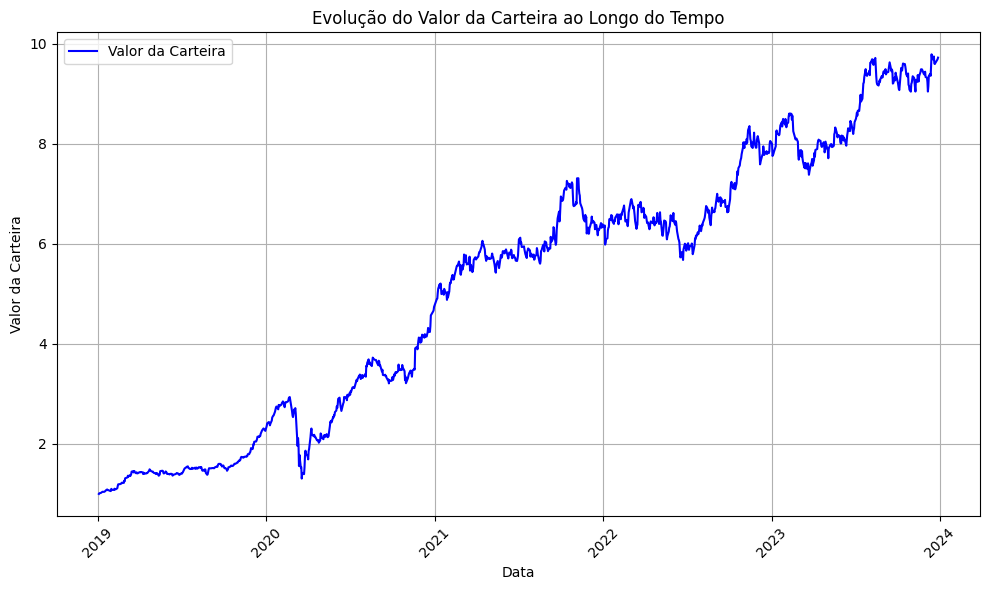

In [5]:

# Calcular os retornos diários dos ativos
retornos_diarios = df_fechamento.pct_change().dropna()

# Calcular o retorno diário da carteira (ponderando os retornos dos ativos)
retorno_carteira = (retornos_diarios * pesos_otimos).sum(axis=1)

# Inicializar o valor da carteira (valor inicial = 1, por exemplo)
valor_inicial = 1
evolucao_carteira = (1 + retorno_carteira).cumprod() * valor_inicial

# Plotar a evolução da carteira
plt.figure(figsize=(10, 6))
plt.plot(evolucao_carteira, label="Valor da Carteira", color='b')
plt.title('Evolução do Valor da Carteira ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Valor da Carteira')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

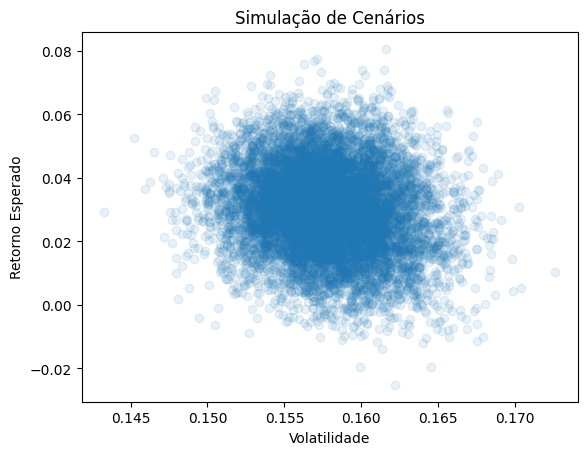

Cenários positivos: 9850
Cenários negativos: 150


In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Função para simulação de cenários
def simulacao_cenarios(retornos_esperados, matriz_cov, n_simulacoes=10000):
    # Simulação de Monte Carlo
    n_ativos = len(retornos_esperados)
    simulacoes = np.random.multivariate_normal(retornos_esperados, matriz_cov, n_simulacoes)
    
    # Calcular os retornos simulados para cada carteira
    retornos_simulados = np.mean(simulacoes, axis=1)
    volatilidade_simulada = np.std(simulacoes, axis=1)
    
    # Contar cenários positivos e negativos
    positivos = np.sum(retornos_simulados > 0)
    negativos = np.sum(retornos_simulados <= 0)
    
    return retornos_simulados, volatilidade_simulada, positivos, negativos

# Exemplo de análise de cenários
retornos_simulados, volatilidade_simulada, positivos, negativos = simulacao_cenarios(retornos_esperados, matriz_cov)

# Exibição de gráficos para os cenários simulados
plt.scatter(volatilidade_simulada, retornos_simulados, alpha=0.1)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Esperado')
plt.title('Simulação de Cenários')
plt.show()

# Exibir o número de cenários positivos e negativos
print(f'Cenários positivos: {positivos}')
print(f'Cenários negativos: {negativos}')


In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Função para prever os retornos usando Random Forest
def prever_retornos_rf(df_fechamento, acao, n_estimadores=100, test_size=0.2):

    # Calcular os retornos logaritmicos
    serie_temporal = np.log(df_fechamento[acao] / df_fechamento[acao].shift(1)).dropna()
    
    # Criar variáveis explicativas (exemplo simples com os retornos passados)
    X = pd.DataFrame({
        'retorno_1': serie_temporal.shift(5),
        'retorno_2': serie_temporal.shift(50),
        'retorno_3': serie_temporal.shift(500)
    }).dropna()
    
    # Variável dependente
    y = serie_temporal.loc[X.index]
    
    # Dividir em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
    
    # Treinar o modelo Random Forest
    modelo_rf = RandomForestRegressor(n_estimators=n_estimadores, random_state=42)
    modelo_rf.fit(X_train, y_train)
    
    # Prever os retornos para o conjunto de teste
    y_pred = modelo_rf.predict(X_test)
    
    # Avaliar o desempenho (erro quadrático médio)
    mse = mean_squared_error(y_test, y_pred)
    
    # Prever o próximo retorno
    X_proximo = pd.DataFrame({
        'retorno_1': [serie_temporal.iloc[-5]],
        'retorno_2': [serie_temporal.iloc[-50]],
        'retorno_3': [serie_temporal.iloc[-500]]
    })
    retorno_previsto = modelo_rf.predict(X_proximo)[0]
    
    return retorno_previsto, mse

# Prever retornos para cada ação com Random Forest
retornos_rf_previstos = {}
for acao in df_fechamento.columns:
    retorno_previsto, mse = prever_retornos_rf(df_fechamento, acao)
    retornos_rf_previstos[acao] = retorno_previsto
    print(f"{acao} - Previsão: {retorno_previsto:.4f}, MSE: {mse:.6f}")

from sklearn.model_selection import GridSearchCV

# Definindo a grade de parâmetros a serem testados
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

ABCP11.SA - Previsão: -0.0013, MSE: 0.000103
ABEV3.SA - Previsão: 0.0102, MSE: 0.000221
AGRO3.SA - Previsão: -0.0077, MSE: 0.000755
ALPA4.SA - Previsão: 0.0062, MSE: 0.000937
ALUP11.SA - Previsão: 0.0050, MSE: 0.000144
ALZR11.SA - Previsão: 0.0002, MSE: 0.000048
AMER3.SA - Previsão: 0.0093, MSE: 0.002690
AZUL4.SA - Previsão: 0.0047, MSE: 0.001626
B3SA3.SA - Previsão: 0.0063, MSE: 0.000530
BBAS3.SA - Previsão: 0.0030, MSE: 0.000229
BBDC3.SA - Previsão: -0.0075, MSE: 0.000241
BBPO11.SA - Previsão: -0.0013, MSE: 0.000026
BBSE3.SA - Previsão: -0.0072, MSE: 0.000173
BCRI11.SA - Previsão: 0.0033, MSE: 0.000084
BEEF3.SA - Previsão: -0.0144, MSE: 0.000867
BOVA11.SA - Previsão: 0.0027, MSE: 0.000117
BOVV11.SA - Previsão: 0.0024, MSE: 0.000133
BPAC11.SA - Previsão: 0.0024, MSE: 0.000398
BRAP4.SA - Previsão: -0.0076, MSE: 0.000412
BRCO11.SA - Previsão: -0.0025, MSE: 0.000133
BRCR11.SA - Previsão: -0.0110, MSE: 0.000191
BRFS3.SA - Previsão: 0.0050, MSE: 0.001155
BRKM5.SA - Previsão: 0.0008, MSE: 0

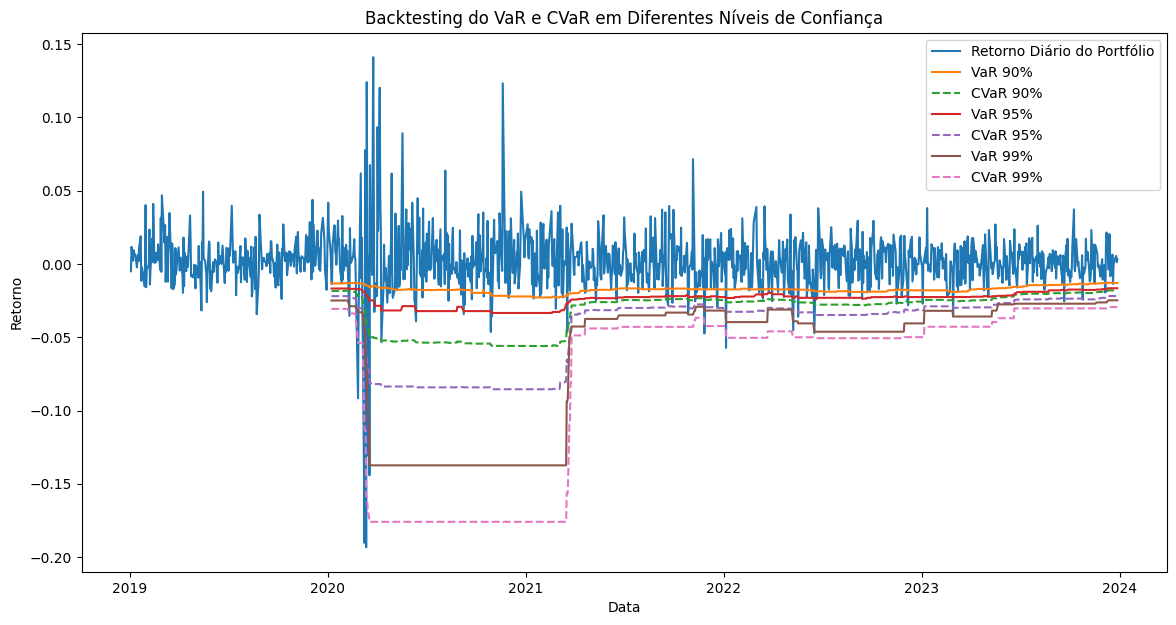

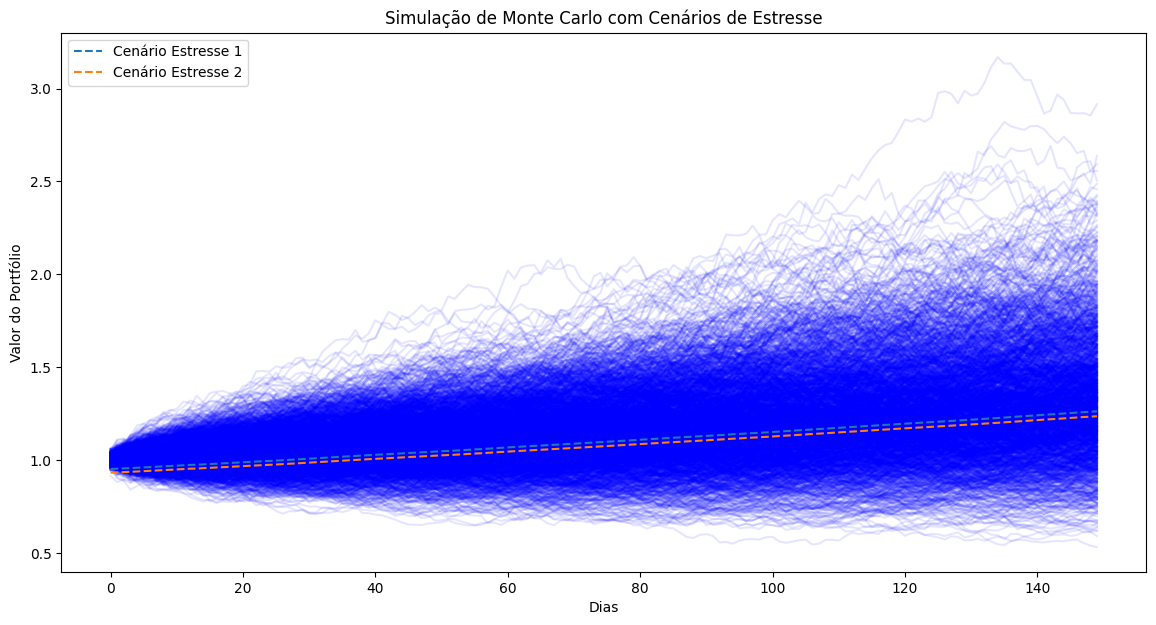

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Supondo que `df_fechamento` contém dados de fechamento ajustados dos ativos
retornos_diarios = df_fechamento.pct_change(fill_method=None)

# Filtrar ativos em `retornos_diarios` e `pesos_otimos` para os mesmos ativos
ativos_validos = list(retornos_diarios.columns.intersection(pesos_otimos.keys()))
retornos_diarios = retornos_diarios[ativos_validos]
pesos_otimos_filtrados = {ativo: pesos_otimos[ativo] for ativo in ativos_validos}
pesos_array = np.array(list(pesos_otimos_filtrados.values()))

# Calcular o retorno diário do portfólio usando os pesos otimizados filtrados
portfolio_retorno_diario = retornos_diarios.dot(pesos_array)

# Definir diferentes níveis de confiança para análise de backtesting
niveis_confianca = [0.90, 0.95, 0.99]

# DataFrame para armazenar VaR e CVaR para cada nível de confiança ao longo do tempo
historico_risco = pd.DataFrame(index=portfolio_retorno_diario.index)

# Calcular VaR e CVaR para cada nível de confiança
for nivel in niveis_confianca:
    VaR_tempo = portfolio_retorno_diario.rolling(window=252).apply(lambda x: np.percentile(x, 100 * (1 - nivel)))
    CVaR_tempo = portfolio_retorno_diario.rolling(window=252).apply(lambda x: x[x <= np.percentile(x, 100 * (1 - nivel))].mean())
    historico_risco[f'VaR_{int(nivel*100)}'] = VaR_tempo
    historico_risco[f'CVaR_{int(nivel*100)}'] = CVaR_tempo

# Visualização dos resultados de backtesting
plt.figure(figsize=(14, 7))
plt.plot(portfolio_retorno_diario, label='Retorno Diário do Portfólio')
for nivel in niveis_confianca:
    plt.plot(historico_risco[f'VaR_{int(nivel*100)}'], label=f'VaR {int(nivel*100)}%')
    plt.plot(historico_risco[f'CVaR_{int(nivel*100)}'], label=f'CVaR {int(nivel*100)}%', linestyle='--')

plt.title("Backtesting do VaR e CVaR em Diferentes Níveis de Confiança")
plt.xlabel("Data")
plt.ylabel("Retorno")
plt.legend()
plt.show()

# Simulação de Monte Carlo
np.random.seed(42)
n_simulacoes = 10000  # Número de simulações
n_dias = 150  # Período (20 dias)

# Obter média e covariância dos retornos diários
media_retorno = portfolio_retorno_diario.mean()
volatilidade_retorno = portfolio_retorno_diario.std()

# Rodar simulações
simulacoes = np.zeros((n_dias, n_simulacoes))
for i in range(n_simulacoes):
    retornos_simulados = np.random.normal(media_retorno, volatilidade_retorno, n_dias)
    simulacoes[:, i] = (1 + retornos_simulados).cumprod()

# Cenários de estresse (exemplo: -5% em um dia para crise financeira, -7% para pandemia)
cenarios_estresse = [-0.05, -0.07]
impacto_estresse = [(1 + cenarios_estresse[0]) * simulacoes, (1 + cenarios_estresse[1]) * simulacoes]

# Plotar simulações e cenários de estresse
plt.figure(figsize=(14, 7))
for i in range(2000):  # Visualizar 2000 trajetórias de simulação
    plt.plot(simulacoes[:, i], color="blue", alpha=0.1)
for i, cenario in enumerate(impacto_estresse):
    plt.plot(cenario.mean(axis=1), label=f'Cenário Estresse {i + 1}', linestyle="--")

plt.title("Simulação de Monte Carlo com Cenários de Estresse")
plt.xlabel("Dias")
plt.ylabel("Valor do Portfólio")
plt.legend()
plt.show()


Para o cenário de estresse de -5.0%:
 - Trajetórias que superaram: 4418.0 / 10000 (44.18%)
 - Trajetórias que não superaram: 5582.0 / 10000 (55.82%)
Para o cenário de estresse de -7.000000000000001%:
 - Trajetórias que superaram: 5428.0 / 10000 (54.28%)
 - Trajetórias que não superaram: 4572.0 / 10000 (45.72%)


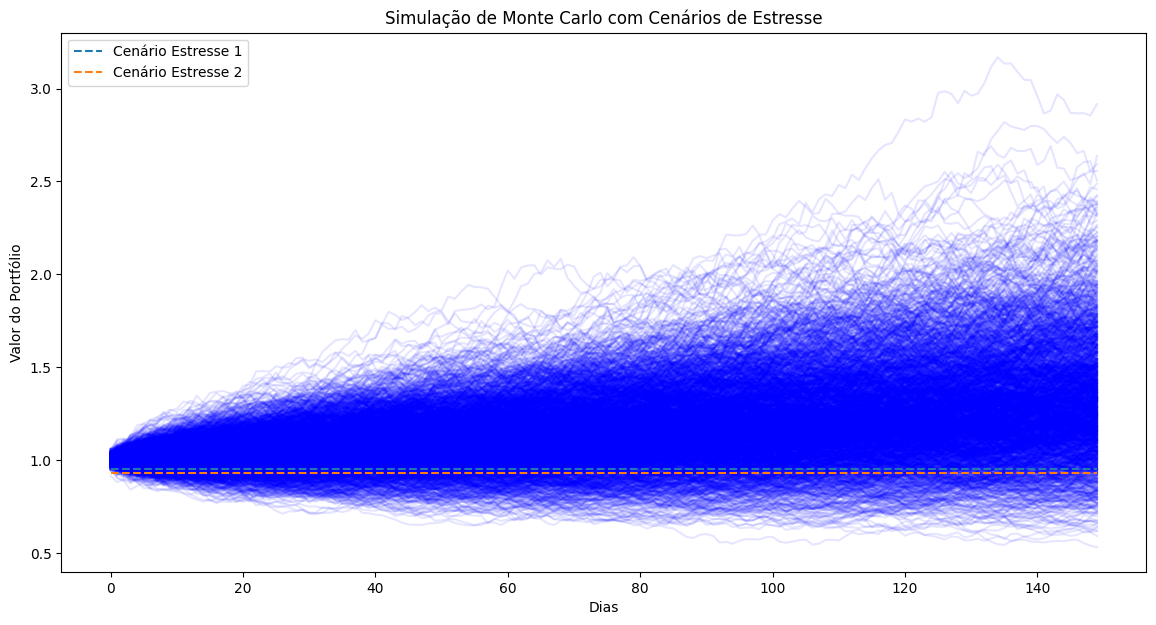

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# Simulação de Monte Carlo
np.random.seed(42)
n_simulacoes = 10000  # Número de simulações
n_dias = 150  # Período (150 dias, por exemplo)

# Obter média e covariância dos retornos diários
media_retorno = portfolio_retorno_diario.mean()
volatilidade_retorno = portfolio_retorno_diario.std()

# Rodar simulações
simulacoes = np.zeros((n_dias, n_simulacoes))
for i in range(n_simulacoes):
    retornos_simulados = np.random.normal(media_retorno, volatilidade_retorno, n_dias)
    simulacoes[:, i] = (1 + retornos_simulados).cumprod()

# Cenários de estresse (exemplo: -5% em um dia para crise financeira, -7% para pandemia)
cenarios_estresse = [-0.05, -0.07]
impacto_estresse = [(1 + cenarios_estresse[0]) * np.ones_like(simulacoes), 
                    (1 + cenarios_estresse[1]) * np.ones_like(simulacoes)]

# Contadores para as trajetórias que superam ou não os cenários de estresse
contador_supera = np.zeros((len(cenarios_estresse), n_simulacoes))  # Contagem para cada cenário de estresse
contador_nao_supera = np.zeros_like(contador_supera)

# Verificar para cada simulação se superou ou não o cenário de estresse durante todo o período
for i in range(n_simulacoes):
    for j, cenario in enumerate(impacto_estresse):
        if (simulacoes[:, i] > cenario[:, i]).all():  # Verifica se a simulação nunca caiu abaixo do impacto
            contador_supera[j, i] = 1
        else:
            contador_nao_supera[j, i] = 1

# Somar os contadores para ver quantas trajetórias superaram ou não os cenários
supera = contador_supera.sum(axis=1)
nao_supera = contador_nao_supera.sum(axis=1)

# Exibir o número de simulações que superaram e não superaram os cenários
for i, cenario in enumerate(cenarios_estresse):
    print(f"Para o cenário de estresse de {cenarios_estresse[i]*100}%:")
    print(f" - Trajetórias que superaram: {supera[i]} / {n_simulacoes} ({(supera[i]/n_simulacoes)*100:.2f}%)")
    print(f" - Trajetórias que não superaram: {nao_supera[i]} / {n_simulacoes} ({(nao_supera[i]/n_simulacoes)*100:.2f}%)")

# Plotar simulações e cenários de estresse
plt.figure(figsize=(14, 7))
for i in range(2000):  # Visualizar 2000 trajetórias de simulação
    plt.plot(simulacoes[:, i], color="blue", alpha=0.1)
for i, cenario in enumerate(impacto_estresse):
    plt.plot(cenario.mean(axis=1), label=f'Cenário Estresse {i + 1}', linestyle="--")

plt.title("Simulação de Monte Carlo com Cenários de Estresse")
plt.xlabel("Dias")
plt.ylabel("Valor do Portfólio")
plt.legend()
plt.show()


Para o cenário de estresse de -5.0% no último dia:
 - Trajetórias que superaram: 8938 / 10000 (89.38%)
 - Trajetórias que não superaram: 1062 / 10000 (10.62%)
Para o cenário de estresse de -7.000000000000001% no último dia:
 - Trajetórias que superaram: 9114 / 10000 (91.14%)
 - Trajetórias que não superaram: 886 / 10000 (8.86%)


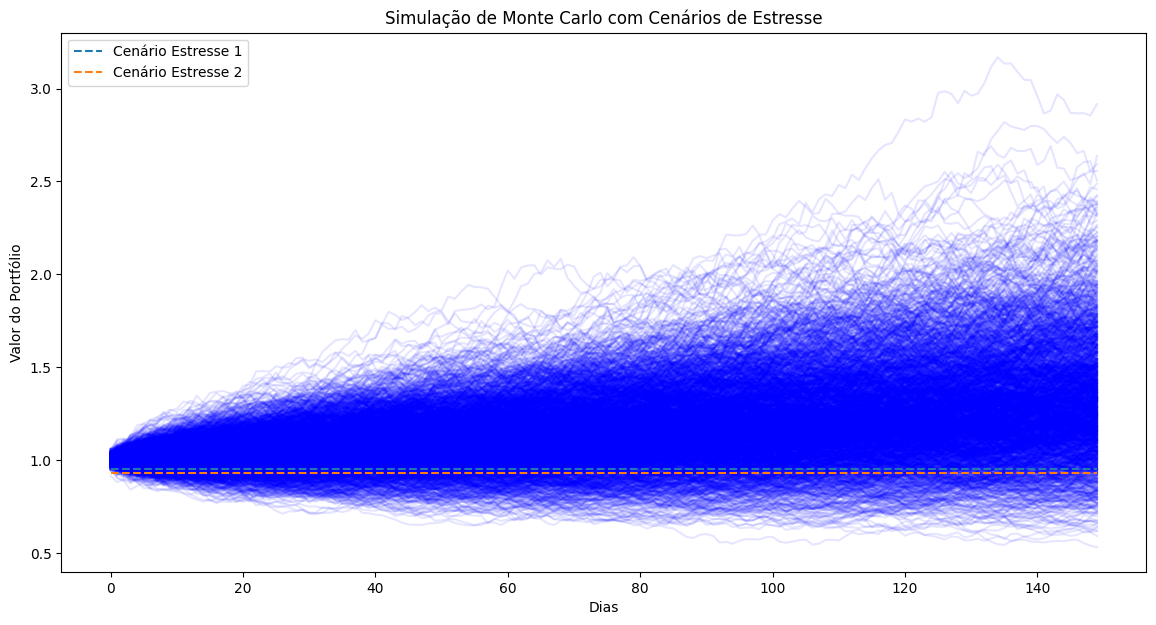

In [109]:
import numpy as np
import matplotlib.pyplot as plt

# Simulação de Monte Carlo
np.random.seed(42)
n_simulacoes = 10000  # Número de simulações
n_dias = 150  # Período (150 dias, por exemplo)

# Obter média e covariância dos retornos diários
media_retorno = portfolio_retorno_diario.mean()
volatilidade_retorno = portfolio_retorno_diario.std()

# Rodar simulações
simulacoes = np.zeros((n_dias, n_simulacoes))
for i in range(n_simulacoes):
    retornos_simulados = np.random.normal(media_retorno, volatilidade_retorno, n_dias)
    simulacoes[:, i] = (1 + retornos_simulados).cumprod()

# Cenários de estresse (exemplo: -5% em um dia para crise financeira, -7% para pandemia)
cenarios_estresse = [-0.05, -0.07]
impacto_estresse = [(1 + cenarios_estresse[0]), (1 + cenarios_estresse[1])]

# Inicializar os contadores para cada cenário
contador_supera = [0, 0]  # Contagem das trajetórias que superam os cenários de estresse
contador_nao_supera = [0, 0]  # Contagem das trajetórias que não superam os cenários de estresse

# Verificar para cada simulação no último ponto se superou ou não o cenário de estresse
for i in range(n_simulacoes):
    for j, cenario in enumerate(impacto_estresse):
        # Comparar o valor final da simulação com o impacto do cenário de estresse
        if simulacoes[-1, i] > cenario:  # Simulação superou o cenário de estresse
            contador_supera[j] += 1
        else:  # Simulação não superou o cenário de estresse
            contador_nao_supera[j] += 1

# Exibir o número de simulações que superaram e não superaram os cenários
for i, cenario in enumerate(cenarios_estresse):
    print(f"Para o cenário de estresse de {cenarios_estresse[i]*100}% no último dia:")
    print(f" - Trajetórias que superaram: {contador_supera[i]} / {n_simulacoes} ({(contador_supera[i]/n_simulacoes)*100:.2f}%)")
    print(f" - Trajetórias que não superaram: {contador_nao_supera[i]} / {n_simulacoes} ({(contador_nao_supera[i]/n_simulacoes)*100:.2f}%)")

# Plotar simulações e cenários de estresse
plt.figure(figsize=(14, 7))
for i in range(2000):  # Visualizar 2000 trajetórias de simulação
    plt.plot(simulacoes[:, i], color="blue", alpha=0.1)
for i, cenario in enumerate(impacto_estresse):
    plt.plot(np.full(n_dias, cenario), label=f'Cenário Estresse {i + 1}', linestyle="--")

plt.title("Simulação de Monte Carlo com Cenários de Estresse")
plt.xlabel("Dias")
plt.ylabel("Valor do Portfólio")
plt.legend()
plt.show()


In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from pypfopt import EfficientFrontier, expected_returns, risk_models
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

df_fechamento = yf.download(acoes_b3, start=start_date, end=end_date)['Close']

# Limpar os dados removendo colunas com muitos NaNs e preenchendo os restantes
df_fechamento = df_fechamento.dropna(axis=1, thresh=int(0.8 * len(df_fechamento)))  # Remove ações com mais de 20% de NaNs
df_fechamento = df_fechamento.fillna(method='ffill').fillna(method='bfill')  # Preenche os NaNs restantes

# Calcular os retornos esperados e a matriz de covariância usando PyPortfolioOpt
retornos_esperados = expected_returns.mean_historical_return(df_fechamento)
matriz_cov = risk_models.sample_cov(df_fechamento)

# Inicializar o modelo de Carteira Eficiente
ef = EfficientFrontier(retornos_esperados, matriz_cov)

# Otimizar para o Sharpe Ratio máximo
pesos_otimos = ef.max_sharpe(risk_free_rate=0.083)

# Limpar os pesos para uma melhor apresentação
#limpando_pesos = ef.clean_weights()

# Exibir os ativos e seus respectivos pesos na carteira otimizada
print("\nAtivos e Pesos da Carteira Otimizada:")
ativos_optimizados = []  # Lista para armazenar os ativos otimizado
for ativo, peso in limpando_pesos.items():
    if peso > 0:
        ativos_optimizados.append(ativo)
        print(f"{ativo}: {peso:.2%}")

# Função para prever os retornos usando Random Forest
def prever_retornos_rf(df_fechamento, acao, n_estimadores=100, test_size=0.2):

    # Calcular os retornos logaritmicos
    serie_temporal = np.log(df_fechamento[acao] / df_fechamento[acao].shift(1)).dropna()
    
    # Criar variáveis explicativas (exemplo simples com os retornos passados)
    X = pd.DataFrame({
        'retorno_1': serie_temporal.shift(5),
        'retorno_2': serie_temporal.shift(50),
        'retorno_3': serie_temporal.shift(500)
    }).dropna()
    
    # Variável dependente
    y = serie_temporal.loc[X.index]
    
    # Dividir em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
    
    # Treinar o modelo Random Forest
    modelo_rf = RandomForestRegressor(n_estimators=n_estimadores, random_state=42)
    modelo_rf.fit(X_train, y_train)
    
    # Prever os retornos para o conjunto de teste
    y_pred = modelo_rf.predict(X_test)
    
    # Avaliar o desempenho (erro quadrático médio)
    mse = mean_squared_error(y_test, y_pred)
    
    # Prever o próximo retorno
    X_proximo = pd.DataFrame({
        'retorno_1': [serie_temporal.iloc[-5]],
        'retorno_2': [serie_temporal.iloc[-50]],
        'retorno_3': [serie_temporal.iloc[-500]]
    })
    retorno_previsto = modelo_rf.predict(X_proximo)[0]
    
    return retorno_previsto, mse

# Prever retornos para cada ação na carteira otimizada usando Random Forest
retornos_rf_previstos = {}
for acao in ativos_optimizados:
    retorno_previsto, mse = prever_retornos_rf(df_fechamento, acao)
    retornos_rf_previstos[acao] = retorno_previsto
    print(f"{acao} - Previsão de Retorno: {retorno_previsto:.4f}, MSE: {mse:.6f}")



In [124]:
import yfinance as yf
import numpy as np
import pandas as pd
from pypfopt import EfficientFrontier, expected_returns, risk_models
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Baixar os dados de fechamento
df_fechamento = yf.download(acoes_b3, start=start_date, end=end_date)['Close']

# Limpar os dados removendo colunas com muitos NaNs e preenchendo os restantes
df_fechamento = df_fechamento.dropna(axis=1, thresh=int(0.8 * len(df_fechamento)))  # Remove ações com mais de 20% de NaNs
df_fechamento = df_fechamento.fillna(method='ffill').fillna(method='bfill')  # Preenche os NaNs restantes

# Calcular os retornos esperados e a matriz de covariância usando PyPortfolioOpt
retornos_esperados = expected_returns.mean_historical_return(df_fechamento)
matriz_cov = risk_models.sample_cov(df_fechamento)

# Inicializar o modelo de Carteira Eficiente
ef = EfficientFrontier(retornos_esperados, matriz_cov)

# Otimizar para o Sharpe Ratio máximo
pesos_otimos = ef.max_sharpe(risk_free_rate=0.083)

# Limpar os pesos para uma melhor apresentação
limpando_pesos = ef.clean_weights()

# Exibir os ativos e seus respectivos pesos na carteira otimizada
print("\nAtivos e Pesos da Carteira Otimizada:")
ativos_optimizados = []  # Lista para armazenar os ativos otimizados
for ativo, peso in limpando_pesos.items():
    if peso > 0:
        ativos_optimizados.append(ativo)
        print(f"{ativo}: {peso:.2%}")

# Função para prever os retornos usando Random Forest
def prever_retornos_rf(df_fechamento, acao, n_estimadores=100, test_size=0.2):
    # Calcular os retornos logaritmicos
    serie_temporal = np.log(df_fechamento[acao] / df_fechamento[acao].shift(1)).dropna()
    
    # Criar variáveis explicativas (exemplo simples com os retornos passados)
    X = pd.DataFrame({
        'retorno_1': serie_temporal.shift(5),
        'retorno_2': serie_temporal.shift(50),
        'retorno_3': serie_temporal.shift(500)
    }).dropna()  # Remover todas as linhas com NaN
    
    # Variável dependente (retornos futuros)
    y = serie_temporal.loc[X.index]  # Alinhar os índices
    
    # Verificar se X e y têm o mesmo número de amostras
    if len(X) != len(y):
        raise ValueError(f"Desalinhamento nas amostras: X tem {len(X)} e y tem {len(y)}")

    # Dividir em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
    
    # Treinar o modelo Random Forest
    modelo_rf = RandomForestRegressor(n_estimators=n_estimadores, random_state=42)
    modelo_rf.fit(X_train, y_train)
    
    # Prever o próximo retorno
    X_proximo = pd.DataFrame({
        'retorno_1': [serie_temporal.iloc[-5]],
        'retorno_2': [serie_temporal.iloc[-50]],
        'retorno_3': [serie_temporal.iloc[-500]]
    })
    retorno_previsto = modelo_rf.predict(X_proximo)[0]
    
    # Calcular o erro quadrático médio (MSE)
    y_pred = modelo_rf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    return retorno_previsto, mse

# Prever retornos para cada ação na carteira otimizada usando Random Forest
retornos_rf_previstos = {}
for acao in ativos_optimizados:
    retorno_previsto, mse = prever_retornos_rf(df_fechamento, acao)
    retornos_rf_previstos[acao] = retorno_previsto
    print(f"{acao} - Previsão de Retorno para a próxima semana: {retorno_previsto * 100:.2f}%, MSE: {mse:.6f}")

# Função para fazer o rebalanceamento manual
def rebalancear_carteira(retornos_rf_previstos, ativos_disp):
    print("\nCarteira Atual:")
    ativos_negativos = {k: v for k, v in retornos_rf_previstos.items() if v < 0}
    
    print("Ativos com Previsão de Retorno Negativo:")
    for ativo, retorno in ativos_negativos.items():
        print(f"{ativo} - Previsão de Retorno: {retorno * 100:.2f}%")
    
    # Permitir ao usuário escolher substituições
    for ativo in ativos_negativos.keys():
        print(f"\nVocê pode substituir o ativo {ativo} por outro ativo.")
        #print("Ativos disponíveis para substituição:", ativos_disp)
        
        nova_acao = input(f"Escolha um ativo para substituir {ativo}: ").strip().upper()
        while nova_acao not in ativos_disp:
            print("Ativo não encontrado na lista. Tente novamente.")
            nova_acao = input(f"Escolha um ativo para substituir {ativo}: ").strip().upper()
        
        print(f"Substituindo {ativo} por {nova_acao}.")
        retornos_rf_previstos[nova_acao], _ = prever_retornos_rf(df_fechamento, nova_acao)
        # Atualizar a previsão de retorno
        retornos_rf_previstos.pop(ativo)

    return retornos_rf_previstos

# Lista de ativos disponíveis para substituição
ativos_disp = [
    "PETR4.SA", "VALE3.SA", "ITUB4.SA", "BBDC4.SA", "BBAS3.SA", "ABEV3.SA",
    "WEGE3.SA", "MGLU3.SA", "B3SA3.SA", "RENT3.SA", "EQTL3.SA", "ITSA4.SA",
    "SUZB3.SA", "JBSS3.SA", "GGBR4.SA", "ELET3.SA", "BBDC3.SA", "CSNA3.SA",
    "UGPA3.SA", "ELET6.SA", "TAEE11.SA", "BRFS3.SA", "BRKM5.SA", "ENBR3.SA",
    "KLBN11.SA", "BBSE3.SA", "PRIO3.SA", "SBSP3.SA", "CSAN3.SA", "GOLL4.SA",
    "TOTS3.SA", "CPLE6.SA", "VIVT3.SA", "LREN3.SA", "EMBR3.SA", "CMIG4.SA",
    "MULT3.SA", "CCRO3.SA", "RAIL3.SA", "TIMS3.SA", "YDUQ3.SA", "AMER3.SA",
    "DXCO3.SA", "LWSA3.SA", "MRFG3.SA", "CVCB3.SA", "QUAL3.SA", "VBBR3.SA",
    "BRML3.SA", "POSI3.SA", "PETZ3.SA", "RAIZ4.SA", "ENGI11.SA", "ALPA4.SA",
    "CPFE3.SA", "SULA11.SA", "EZTC3.SA", "MEAL3.SA", "CYRE3.SA", "HAPV3.SA",
    "NTCO3.SA", "TRPL4.SA", "ARZZ3.SA", "CRFB3.SA", "GOAU4.SA", "SLCE3.SA",
    "SANB11.SA", "MRVE3.SA", "PCAR3.SA", "RECV3.SA", "STBP3.SA", "BPAC11.SA",
    "BEEF3.SA", "MOVI3.SA", "AESB3.SA", "TASA4.SA", "SEER3.SA", "NEOE3.SA",
    "LIGT3.SA", "VIIA3.SA", "AZUL4.SA", "RAPT4.SA", "POMO4.SA", "USIM5.SA",
    "ECOR3.SA", "MYPK3.SA", "SOMA3.SA", "BLAU3.SA", "RRRP3.SA", "CARD3.SA",
    "BRAP4.SA", "MRLN3.SA", "PARD3.SA", "JHSF3.SA", "SIMH3.SA", "CASH3.SA",
    "RDOR3.SA", "FLRY3.SA", "SMTO3.SA", "ROMI3.SA", "ENEV3.SA", "IGTI11.SA",
    "BRSR6.SA", "TIET11.SA", "CSMG3.SA"

    ,

    # 99 Fundos imobiliários
    "HGLG11.SA", "XPML11.SA", "KNRI11.SA", "VISC11.SA", "ABCP11.SA", 
    "MALL11.SA", "BBPO11.SA", "FIIP11.SA", "RBRP11.SA", "BRCR11.SA", 
    "CPTS11.SA", "TRXF11.SA", "HGRU11.SA", "SHUL11.SA", "FEXC11.SA", 
    "IRDM11.SA", "MFII11.SA", "RBRF11.SA", "JSRE11.SA", "PSI11.SA", 
    "MXRF11.SA", "VLOG11.SA", "RZAK11.SA", "HGBS11.SA", "XPCM11.SA", 
    "AIEC11.SA", "ALZR11.SA", "KNHY11.SA", "IRFI11.SA", "HGFII11.SA", 
    "KFOF11.SA", "CEAR11.SA", "SPTI11.SA", "DEVA11.SA", "TORD11.SA", 
    "ABFI11.SA", "MOAT11.SA", "VTLT11.SA", "FIIP11B.SA", "PLCR11.SA", 
    "HREN11.SA", "MALL11.SA", "RZAK11.SA", "RBRF11.SA", "JSRE11.SA", 
    "MOGL11.SA", "BCRI11.SA", "ALZR11.SA", "HGRU11.SA", "FIF.SA", 
    "RBCO11.SA", "FLMA11.SA", "CVBI11.SA", "VGHF11.SA", "EXPL11.SA", 
    "TEEB11.SA", "RCFF11.SA", "HGBS11.SA", "TGAR11.SA", "TRXX11.SA", 
    "VIBR11.SA", "MUNI11.SA", "VGRI11.SA", "XPLG11.SA", "GGFI11.SA", 
    "VAMC11.SA", "GOUV11.SA", "SBPR11.SA", "FAFF11.SA", "IRLM11.SA", 
    "KGLG11.SA", "FEXC11.SA", "VMCF11.SA", "HGGI11.SA", "MCLG11.SA", 
    "CPSO11.SA", "AGRO11.SA", "FVAU11.SA", "PNSH11.SA", "MPTI11.SA", 
    "RHDF11.SA", "TGPR11.SA", "WBFF11.SA", "FFCI11.SA", "HIRA11.SA", 
    "IRAC11.SA", "RBRX11.SA", "TAPO11.SA", "GTWL11.SA", "GGRI11.SA", 
    "FOFT11.SA", "HGLG11.SA", "FIDI11.SA", "VTIQ11.SA",
    "RBRP11.SA", "REIT11.SA", "HARR11.SA", "SHPF11.SA", "OMGI11.SA"

    ,

    "BOVA11.SA",  # ETF que replica o índice Bovespa
    "IVVB11.SA",  # ETF que replica o índice S&P 500
    "SMAL11.SA",  # ETF de small caps
    "BOVV11.SA",  # ETF de ações do IBOVESPA
    "DIVO11.SA",  # ETF de ações com pagamento de dividendos
    "GOVE11.SA",  # ETF de títulos públicos
    "RENT11.SA",  # FII Fundo de Investimento em Renda Fixa
    "RBRF11.SA",  # FII Fundo de Investimento Imobiliário
    "XPML11.SA",  # FII Fundo de Investimento Multimercado
    "ITAG11.SA",  # ETF de ações do índice IBrX-50
    "SPXI11.SA",  # ETF que replica o S&P 500
    "IMAB11.SA",  # ETF que replica o índice de renda fixa
    "IBOV11.SA",  # ETF que replica o IBOVESPA
    "BIDI11.SA",  # ETF de ações de dividendos
    "XFIX11.SA",  # ETF com foco em renda fixa
    "TSMT11.SA",  # Fundo de Investimento de Multimercado
    "PGBL11.SA",  # Fundo de Investimentos em Ações e Renda Fixa
    "SPXI11.SA",  # Fundo de Investimento em Ações
    "IVV11.SA",   # Fundo de Investimentos em Ações
    "MODF11.SA",  # Fundo de Investimentos em Fundos de Renda Fixa
    "LIMA11.SA",  # Fundo de Investimentos Multimercado
    "VGIA11.SA",  # Fundo de Investimentos em Fundos Imobiliários
    "VFIX11.SA",  # Fundo de Investimentos em Renda Fixa
    "FIXX11.SA",  # Fundo de Investimentos em Commodities
    "TISS11.SA",  # Fundo de Investimentos em Setores Emergentes
    "MAXF11.SA",  # Fundo de Investimentos de Ações
    "MDLA11.SA",  # Fundo de Investimentos em Ações e Renda Fixa
    "FISX11.SA",  # Fundo de Investimentos em Ações
    "RBGF11.SA",  # Fundo de Investimentos em Renda Fixa
    "BRCO11.SA",  # Fundo de Investimentos Imobiliários
    "SUGO11.SA",  # Fundo de Investimentos
    "AGLU11.SA",  # Fundo de Investimentos em Ações
    "RHGB11.SA",  # Fundo de Investimentos em Fundos Imobiliários
    "RHF11.SA",   # Fundo de Investimentos em Ações e Renda Fixa
    "MELI11.SA",  # Fundo de Investimentos em Ações
    "VTRA11.SA",  # Fundo de Investimentos de Tecnologia
    "VINC11.SA",  # Fundo de Investimentos de Índices
    "CAPI11.SA",  # Fundo de Investimentos
    "FEFI11.SA",  # Fundo de Investimentos em Renda Fixa
    "FIRE11.SA",  # Fundo de Investimentos Multimercado
    "PENS11.SA",  # Fundo de Investimentos
    "ATIVO11.SA", # Fundo de Investimentos em Ações
    "VITA11.SA",  # Fundo de Investimentos Multimercado
    "RVAL11.SA",  # Fundo de Investimentos em Ações
    "FOFF11.SA",  # Fundo de Investimentos em Fundos de Ações
    "LVRI11.SA",  # Fundo de Investimentos Multimercado
    "RUSO11.SA",  # Fundo de Investimentos em Setores Específicos
    "MOEM11.SA",  # Fundo de Investimentos em Multimercados
    "AFLA11.SA",  # Fundo de Investimentos Multimercado
    "FLID11.SA",  # Fundo de Investimentos de Renda Fixa
    "ABBA11.SA",  # Fundo de Investimentos
    "JUNO11.SA",  # Fundo de Investimentos de Ações
    "MPLF11.SA",  # Fundo de Investimentos Multimercado
    "BRAM11.SA",  # Fundo de Investimentos
    "RMRF11.SA",  # Fundo de Investimentos de Renda Fixa
    "MGLO11.SA",  # Fundo de Investimentos Multimercado
    "BMTL11.SA",  # Fundo de Investimentos em Fundos Imobiliários
    "POLO11.SA",  # Fundo de Investimentos Multimercado
    "FGTR11.SA",  # Fundo de Investimentos em Tecnologia
    "LIRR11.SA",  # Fundo de Investimentos em Renda Fixa
    "CONV11.SA",  # Fundo de Investimentos Multimercado
    "NOVA11.SA",  # Fundo de Investimentos Multimercado
    "SMART11.SA", # Fundo de Investimentos em Fundos de Ações
    "VITT11.SA",  # Fundo de Investimentos Multimercado
    "GOAL11.SA",  # Fundo de Investimentos de Renda Fixa
    "SIGA11.SA",  # Fundo de Investimentos em Fundos Imobiliários
    "PREM11.SA",  # Fundo de Investimentos em Multimercados
    "TESS11.SA",  # Fundo de Investimentos
    "DIAS11.SA",  # Fundo de Investimentos em Ações
    "BNDX11.SA",  # Fundo de Investimentos em Renda Fixa
    "TDFX11.SA",  # Fundo de Investimentos Multimercado
    "PEAX11.SA",  # Fundo de Investimentos em Ações
    "ITAU11.SA",  # Fundo de Investimentos
    "FAMA11.SA",  # Fundo de Investimentos Multimercado
    "TACO11.SA",  # Fundo de Investimentos Multimercado
    "BEST11.SA",  # Fundo de Investimentos
    "BOLE11.SA",  # Fundo de Investimentos em Ações
    "PEEL11.SA",  # Fundo de Investimentos em Ações
    "CITA11.SA",  # Fundo de Investimentos Multimercado
    "APEX11.SA"   # Fundo de Investimentos Multimercado

    ,


    "BTG11.SA",                # Debênture da empresa BTG Pactual
    "B3SA3.SA",                # Debênture da B3 (Bolsa de Valores)
    "VULC3.SA",                # Debênture da Vulcanização do Brasil
    "RAIZ3.SA",                # Debênture da Raiz Energias Renováveis
    "BBSE3.SA",                # Debênture do Banco do Brasil
    "MERC11.SA",               # Debênture do Mercado Livre
    "CEMIG3.SA",               # Debênture da CEMIG (Companhia Energética de Minas Gerais)
    "IFR3.SA",                 # Debênture do Intercement
    "BASF3.SA",                # Debênture da BASF
    "BBAS3.SA",                # Debênture do Banco do Brasil
    "GGBR4.SA",                # Debênture da Gerdau
    "CSNA3.SA",                # Debênture da Companhia Siderúrgica Nacional
    "VIVT3.SA",                # Debênture da Telefônica Vivo
    "KLBN11.SA",               # Debênture da Klabin
    "LREN3.SA",                # Debênture da Lojas Renner
    "PTBL11.SA",               # Debênture da Petrobras
    "ITUB4.SA",                # Debênture do Itaú Unibanco
    "BBPO11.SA",               # Debênture do Banco do Brasil
    "BRKM5.SA",                # Debênture do Braskem
    "COCA11.SA",               # Debênture da Coca-Cola
    "MGLU3.SA",                # Debênture da Magazine Luiza
    "LAME4.SA",                # Debênture do Grupo Lojas Americanas
    "HAPV3.SA",                # Debênture da Hapvida
    "CPLF11.SA",               # Debênture da Copel (Companhia Paranaense de Energia)
    "RCSA3.SA",                # Debênture da RCSA (Rede de Comércio e Serviços do Amazonas)
    "AGRO3.SA",                # Debênture da Agroterra
    "ALUP11.SA",               # Debênture da Alupar Investimentos
    "CESP6.SA",                # Debênture da CESP (Companhia Energética de São Paulo)
    "PGFN11.SA",               # Debênture do Governo Federal
    "ITSA4.SA",                # Debênture do Itaúsa
    "VIVT3.SA",                # Debênture da Telefônica Vivo
    "RSID3.SA",                # Debênture da Rumo S.A.
    "YDUQ3.SA",                # Debênture da Yduqs
    "AURA33.SA",               # Debênture da Aura Minerals
    "TIMP3.SA",                # Debênture da TIM Participações
    "OGXP3.SA",                # Debênture da OGX Petróleo e Gás
    "ELET6.SA",                # Debênture da Eletrobras
    "GRND3.SA",                # Debênture da Grendene
    "NATU3.SA",                # Debênture da Natura
    "FRTA3.SA",                # Debênture da Fras-le
    "BRML3.SA",                # Debênture da BR Malls
    "BBDC3.SA",                # Debênture do Banco Bradesco
    "TCSA3.SA",                # Debênture da Tenda
    "AZUL4.SA",                # Debênture da Azul Linhas Aéreas
    "POMO4.SA",                # Debênture da Pão de Açúcar
    "CLSC3.SA",                # Debênture da Cosan
    "ENAT3.SA",                # Debênture da Eneva
    "COPL3.SA",                # Debênture da Copersucar
    "RCSL3.SA",                # Debênture da Resende
    "SPLT11.SA",               # Debênture da Sprint Telecom
    "CSAN3.SA",                # Debênture da Cosan
    "RLOG3.SA",                # Debênture da Rumo Logística
    "CGAS5.SA"                 # Debênture da Comgás]  # Exemplo de outros ativos

]
# Rebalancear a carteira
retornos_rf_previstos = rebalancear_carteira(retornos_rf_previstos, ativos_disp)

# Exibir os retornos atualizados
print("\nNovo status da carteira com substituições:")
for ativo, retorno in retornos_rf_previstos.items():
    print(f"{ativo} - Previsão de Retorno para a próxima semana: {retorno * 100:.2f}%")


[*********************100%***********************]  302 of 302 completed

144 Failed downloads:
['PGFN11.SA', 'ENBR3.SA', 'IFR3.SA', 'COCA11.SA', 'AFLA11.SA', 'LVRI11.SA', 'IRLM11.SA', 'PEEL11.SA', 'FAMA11.SA', 'RLOG3.SA', 'MCLG11.SA', 'MRLN3.SA', 'GTWL11.SA', 'ABBA11.SA', 'MAXF11.SA', 'VTRA11.SA', 'NATU3.SA', 'WBFF11.SA', 'MOGL11.SA', 'TISS11.SA', 'CPLF11.SA', 'OMGI11.SA', 'SHPF11.SA', 'FOFF11.SA', 'VAMC11.SA', 'SIGA11.SA', 'CESP6.SA', 'SBPR11.SA', 'RBGF11.SA', 'VITT11.SA', 'TGPR11.SA', 'PARD3.SA', 'KGLG11.SA', 'FGTR11.SA', 'SMART11.SA', 'RVAL11.SA', 'TEEB11.SA', 'TIET11.SA', 'PNSH11.SA', 'LIRR11.SA', 'GOAL11.SA', 'LAME4.SA', 'HIRA11.SA', 'JUNO11.SA', 'BRML3.SA', 'SUGO11.SA', 'AGLU11.SA', 'SPTI11.SA', 'SHUL11.SA', 'RMRF11.SA', 'IRAC11.SA', 'MOEM11.SA', 'FLID11.SA', 'FRTA3.SA', 'RAIZ3.SA', 'PTBL11.SA', 'TSMT11.SA', 'ATIVO11.SA', 'VIIA3.SA', 'CEAR11.SA', 'HREN11.SA', 'RUSO11.SA', 'TDFX11.SA', 'GOUV11.SA', 'VFIX11.SA', 'MDLA11.SA', 'GGFI11.SA', 'FIDI11.SA', 'RHDF11.SA', 'VINC11.SA', 'CPS


Ativos e Pesos da Carteira Otimizada:
BPAC11.SA: 6.85%
IVVB11.SA: 23.32%
PRIO3.SA: 42.18%
SPXI11.SA: 12.41%
WEGE3.SA: 15.25%
BPAC11.SA - Previsão de Retorno para a próxima semana: 0.24%, MSE: 0.000398
IVVB11.SA - Previsão de Retorno para a próxima semana: 0.99%, MSE: 0.000070
PRIO3.SA - Previsão de Retorno para a próxima semana: -0.59%, MSE: 0.000564
SPXI11.SA - Previsão de Retorno para a próxima semana: 0.25%, MSE: 0.000075
WEGE3.SA - Previsão de Retorno para a próxima semana: -0.11%, MSE: 0.000371

Carteira Atual:
Ativos com Previsão de Retorno Negativo:
PRIO3.SA - Previsão de Retorno: -0.59%
WEGE3.SA - Previsão de Retorno: -0.11%

Você pode substituir o ativo PRIO3.SA por outro ativo.


Escolha um ativo para substituir PRIO3.SA:  MGLU3.SA


Substituindo PRIO3.SA por MGLU3.SA.

Você pode substituir o ativo WEGE3.SA por outro ativo.


Escolha um ativo para substituir WEGE3.SA:  NTCO3.SA


Substituindo WEGE3.SA por NTCO3.SA.

Novo status da carteira com substituições:
BPAC11.SA - Previsão de Retorno para a próxima semana: 0.24%
IVVB11.SA - Previsão de Retorno para a próxima semana: 0.99%
SPXI11.SA - Previsão de Retorno para a próxima semana: 0.25%
MGLU3.SA - Previsão de Retorno para a próxima semana: -0.13%
NTCO3.SA - Previsão de Retorno para a próxima semana: 0.58%


[*********************100%***********************]  301 of 302 completed

144 Failed downloads:
['HARR11.SA', 'HREN11.SA', 'KGLG11.SA', 'HGFII11.SA', 'POLO11.SA', 'VTIQ11.SA', 'HIRA11.SA', 'COPL3.SA', 'RUSO11.SA', 'APEX11.SA', 'SMART11.SA', 'FAFF11.SA', 'EXPL11.SA', 'MOGL11.SA', 'SHUL11.SA', 'GTWL11.SA', 'PSI11.SA', 'PEAX11.SA', 'CONV11.SA', 'BRML3.SA', 'PTBL11.SA', 'RCSA3.SA', 'TISS11.SA', 'BASF3.SA', 'PREM11.SA', 'TGPR11.SA', 'TAPO11.SA', 'HGGI11.SA', 'GGRI11.SA', 'BOLE11.SA', 'RAIZ3.SA', 'CITA11.SA', 'IVV11.SA', 'BMTL11.SA', 'MODF11.SA', 'FOFF11.SA', 'PNSH11.SA', 'VIIA3.SA', 'COCA11.SA', 'ENAT3.SA', 'TACO11.SA', 'VLOG11.SA', 'SPLT11.SA', 'IRLM11.SA', 'MRLN3.SA', 'MPTI11.SA', 'SIGA11.SA', 'NATU3.SA', 'JUNO11.SA', 'MDLA11.SA', 'GOAL11.SA', 'IRAC11.SA', 'CEMIG3.SA', 'FIDI11.SA', 'SPTI11.SA', 'VAMC11.SA', 'IRFI11.SA', 'MAXF11.SA', 'VTRA11.SA', 'LIRR11.SA', 'TESS11.SA', 'ATIVO11.SA', 'CAPI11.SA', 'TEEB11.SA', 'TDFX11.SA', 'LVRI11.SA', 'TSMT11.SA', 'FAMA11.SA', 'MGLO11.SA', 'NOVA11.SA', '

Retorno Acumulado Final da Carteira: 872.24%
Retorno Acumulado Final de Cada Ativo:
ABCP11.SA: -20.13%
ABEV3.SA: -14.98%
AGRO3.SA: 67.46%
ALPA4.SA: -27.66%
ALUP11.SA: 75.52%
ALZR11.SA: 24.91%
AMER3.SA: -97.84%
AZUL4.SA: -55.93%
B3SA3.SA: 57.07%
BBAS3.SA: 13.97%
BBDC3.SA: -31.77%
BBDC4.SA: -32.42%
BBPO11.SA: -30.61%
BBSE3.SA: 18.82%
BCRI11.SA: -31.78%
BEEF3.SA: 49.55%
BOVA11.SA: 48.34%
BOVV11.SA: 49.37%
BPAC11.SA: 504.18%
BRAP4.SA: 79.04%
BRCO11.SA: 10.17%
BRCR11.SA: -42.44%
BRFS3.SA: -35.18%
BRKM5.SA: -54.75%
BRSR6.SA: -41.68%
CCRO3.SA: 18.17%
CGAS5.SA: 107.98%
CLSC3.SA: 33.80%
CMIG4.SA: 21.15%
CPFE3.SA: 33.07%
CPLE6.SA: 235.91%
CPTS11.SA: -17.17%
CRFB3.SA: -34.30%
CSAN3.SA: 116.92%
CSMG3.SA: -3.70%
CSNA3.SA: 113.46%
CVBI11.SA: -9.37%
CVCB3.SA: -93.05%
CYRE3.SA: 51.73%
DIVO11.SA: 86.45%
DXCO3.SA: -19.43%
ECOR3.SA: -1.88%
ELET3.SA: 74.75%
ELET6.SA: 45.63%
EMBR3.SA: 3.95%
ENEV3.SA: 225.79%
ENGI11.SA: 41.66%
EQTL3.SA: 138.70%
EZTC3.SA: -12.08%
FFCI11.SA: 11.55%
FIIP11.SA: -13.98%
FIXX11.S

[*********************101%***********************]  306 of 302 completed

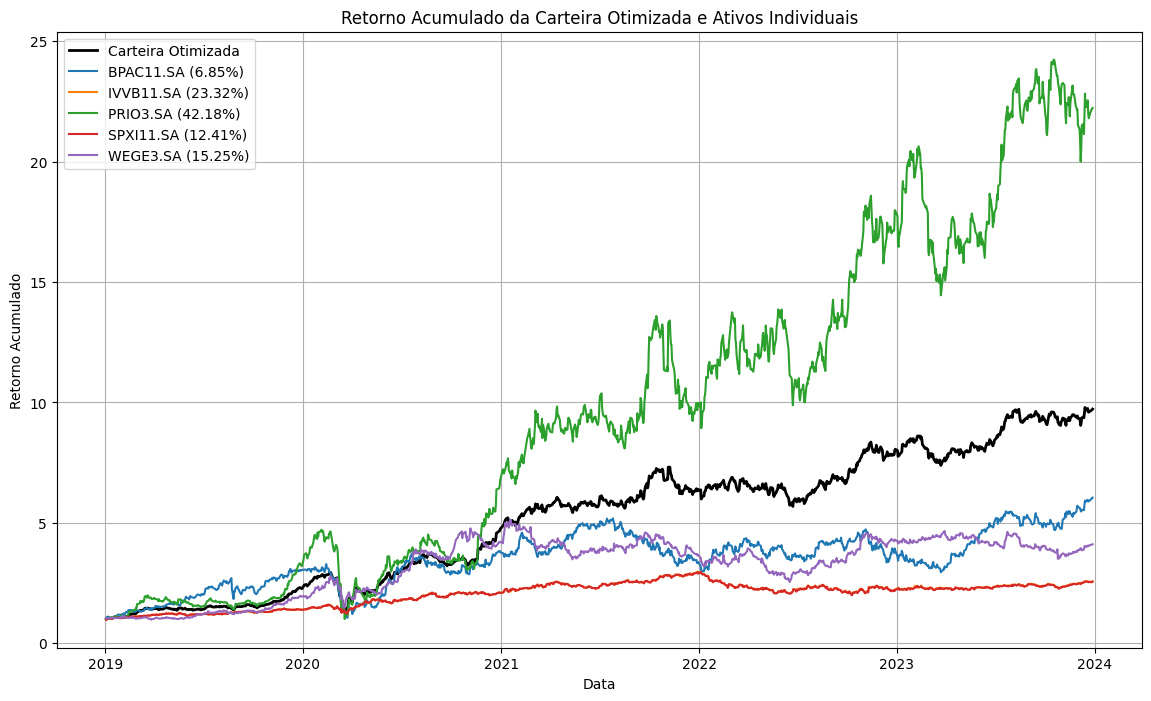

[**************************************170%****************************************]  512 of 302 completed

In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypfopt import expected_returns, risk_models, EfficientFrontier

# Parâmetros de período
# start_date = end_date.replace(year=end_date.year - 4)

# Baixar os dados históricos de fechamento
df_fechamento = yf.download(acoes_b3, start=start_date, end=end_date)['Close']
df_fechamento = df_fechamento.dropna(axis=1, thresh=int(0.8 * len(df_fechamento)))
df_fechamento = df_fechamento.fillna(method='ffill').fillna(method='bfill')

# Calcular retornos esperados e matriz de covariância
retornos_esperados = expected_returns.mean_historical_return(df_fechamento)
matriz_cov = risk_models.sample_cov(df_fechamento)

# Otimizar a carteira para maximizar o Sharpe Ratio
ef = EfficientFrontier(retornos_esperados, matriz_cov)
pesos_otimos = ef.max_sharpe(risk_free_rate=0.083)
limpando_pesos = ef.clean_weights()

# Calcular retorno diário do portfólio otimizado
pesos_array = np.array(list(limpando_pesos.values()))
retornos_diarios = df_fechamento.pct_change().dropna()
portfolio_retorno_diario = (retornos_diarios * pesos_array).sum(axis=1)

# Calcular retorno acumulado da carteira
retorno_acumulado_carteira = (1 + portfolio_retorno_diario).cumprod()

# Calcular retorno acumulado de cada ativo da carteira
retorno_acumulado_ativos = (1 + retornos_diarios).cumprod()

# Calcular retorno acumulado final da carteira e de cada ativo
retorno_final_carteira = retorno_acumulado_carteira.iloc[-1] - 1
print(f"Retorno Acumulado Final da Carteira: {retorno_final_carteira:.2%}")

retorno_final_ativos = retorno_acumulado_ativos.iloc[-1] - 1
print("Retorno Acumulado Final de Cada Ativo:")
for ticker, retorno in retorno_final_ativos.items():
    print(f"{ticker}: {retorno:.2%}")

# Plotar o retorno acumulado do portfólio otimizado e dos ativos
plt.figure(figsize=(14, 8))
plt.plot(retorno_acumulado_carteira, label='Carteira Otimizada', color='black', linewidth=2)
for ticker, peso in limpando_pesos.items():
    if peso > 0:
        plt.plot(retorno_acumulado_ativos[ticker], label=f'{ticker} ({peso:.2%})')

plt.title('Retorno Acumulado da Carteira Otimizada e Ativos Individuais')
plt.xlabel('Data')
plt.ylabel('Retorno Acumulado')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


Drawdown Máximo: -55.54%


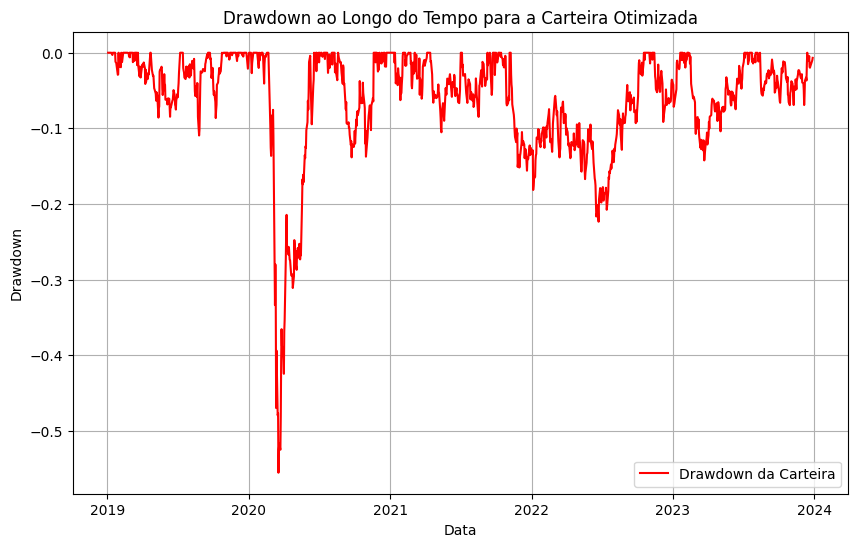

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Filtrando o DataFrame de fechamento apenas para os ativos da carteira otimizada
ativos_carteira = list(pesos_otimos.keys())  # Ativos da carteira otimizada
df_fechamento_carteira = df_fechamento[ativos_carteira]

# Calcular os retornos diários dos ativos da carteira otimizada
retornos_diarios = df_fechamento_carteira.pct_change(fill_method=None).dropna()

# Certifique-se de que 'pesos_otimos' está em um formato de array
pesos_array = np.array(list(pesos_otimos.values()))
# Calcular o retorno diário do portfólio com os pesos otimizados
portfolio_retorno_diario = (retornos_diarios * pesos_array).sum(axis=1)

# Calcular o Drawdown Máximo
retorno_acumulado = (1 + portfolio_retorno_diario).cumprod()
pico_acumulado = retorno_acumulado.cummax()
drawdown = (retorno_acumulado - pico_acumulado) / pico_acumulado
drawdown_maximo = drawdown.min()
print(f"Drawdown Máximo: {drawdown_maximo:.2%}")

# Exibir o gráfico de Drawdown ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(drawdown, label='Drawdown da Carteira', color='red')
plt.title('Drawdown ao Longo do Tempo para a Carteira Otimizada')
plt.xlabel('Data')
plt.ylabel('Drawdown')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
acumulado_portfolio = (1 + portfolio_retorno_diario).cumprod()
pico_portfolio = acumulado_portfolio.cummax()
drawdown = (acumulado_portfolio - pico_portfolio) / pico_portfolio
drawdown_maximo = drawdown.min()
print(f"Drawdown Máximo: {drawdown_maximo:.2%}")

Drawdown Máximo: -55.54%


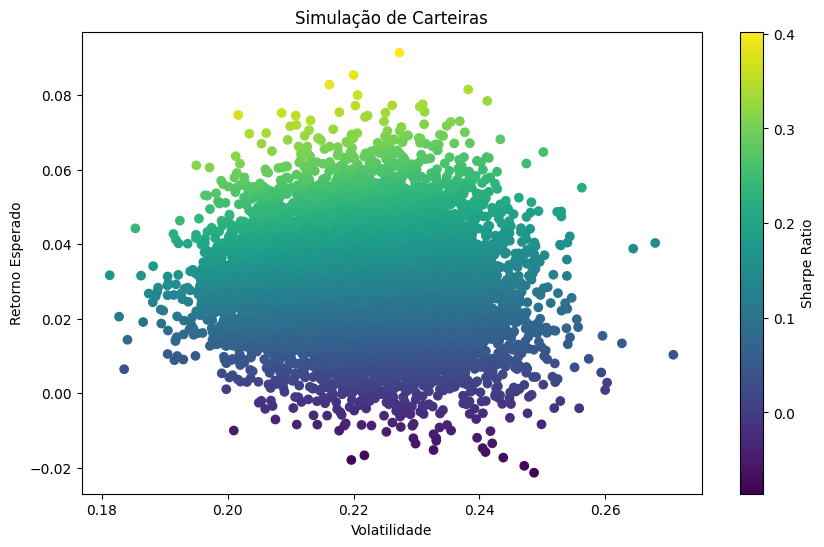

In [18]:
import numpy as np

# Simulação de Monte Carlo para retornos e volatilidade
sim_retornos = []
sim_volatilidades = []
for _ in range(10000):
    pesos_sim = np.random.dirichlet(np.ones(len(retornos_esperados)), size=1)[0]
    sim_retornos.append(np.dot(pesos_sim, retornos_esperados))
    sim_volatilidades.append(np.sqrt(np.dot(pesos_sim.T, np.dot(matriz_cov, pesos_sim))))

# Visualização dos pontos simulados
plt.figure(figsize=(10,6))
plt.scatter(sim_volatilidades, sim_retornos, c=np.array(sim_retornos)/np.array(sim_volatilidades), marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Esperado')
plt.title('Simulação de Carteiras')
plt.show()


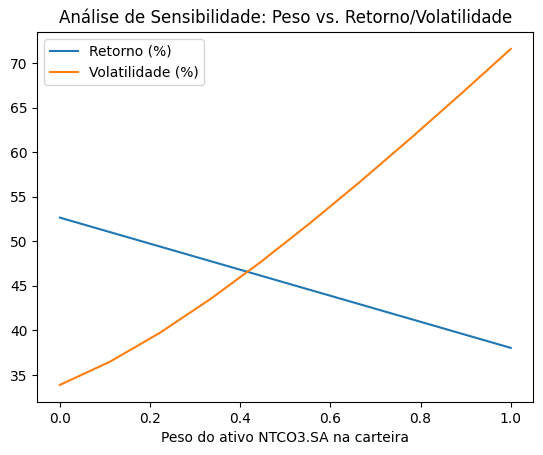

In [121]:
variacao_pesos = np.linspace(0, 1, 10)  # Variar peso de um ativo entre 0% e 100%
resultados = []

for peso_novo in variacao_pesos:
    pesos_alterados = pesos_otimos.copy()
    pesos_alterados['NTCO3.SA'] = peso_novo
    ef = EfficientFrontier(retornos_esperados, matriz_cov)
    ef.set_weights(pesos_alterados)
    retorno, volatilidade, _ = ef.portfolio_performance()
    resultados.append((peso_novo, retorno * 100, volatilidade * 100))

# Exibir gráfico da análise de sensibilidade
pesos, retornos, volatilidades = zip(*resultados)
plt.plot(pesos, retornos, label="Retorno (%)")
plt.plot(pesos, volatilidades, label="Volatilidade (%)")
plt.legend()
plt.xlabel("Peso do ativo NTCO3.SA na carteira")
plt.title("Análise de Sensibilidade: Peso vs. Retorno/Volatilidade")
plt.show()


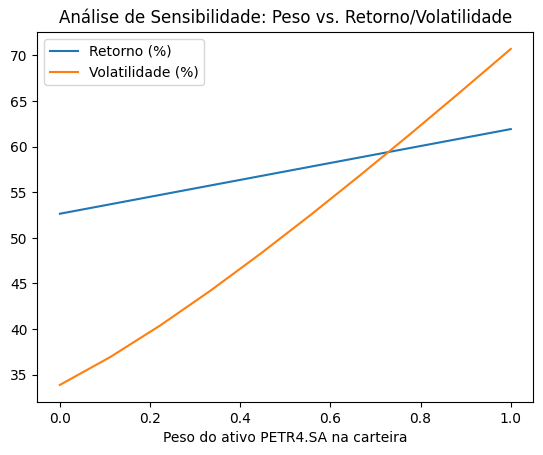

In [120]:
variacao_pesos = np.linspace(0, 1, 10)  # Variar peso de um ativo entre 0% e 100%
resultados = []

for peso_novo in variacao_pesos:
    pesos_alterados = pesos_otimos.copy()
    pesos_alterados['PETR4.SA'] = peso_novo
    ef = EfficientFrontier(retornos_esperados, matriz_cov)
    ef.set_weights(pesos_alterados)
    retorno, volatilidade, _ = ef.portfolio_performance()
    resultados.append((peso_novo, retorno * 100, volatilidade * 100))

# Exibir gráfico da análise de sensibilidade
pesos, retornos, volatilidades = zip(*resultados)
plt.plot(pesos, retornos, label="Retorno (%)")
plt.plot(pesos, volatilidades, label="Volatilidade (%)")
plt.legend()
plt.xlabel("Peso do ativo PETR4.SA na carteira")
plt.title("Análise de Sensibilidade: Peso vs. Retorno/Volatilidade")A
plt.show()


## Suporte ( calcula melhor portfólio - aux)

# Calcula RSI e SMA (ajustar output)

In [7]:
# Função para calcular o RSI
def calcular_rsi(df, window=14):
    delta = df.diff()
    ganho = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    perda = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = ganho / perda
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Aplicando RSI nas ações
rsi = calcular_rsi(df_fechamento['NTCO3.SA'], window=14)  # Exemplo com PETR4.SA
print("RSI de NTCO3.SA:\n", rsi.tail())  # Exibindo o RSI mais recente


# Função para calcular a Média Móvel Simples (SMA)
def calcular_sma(df, window=20):
    sma = df.rolling(window=window).mean()
    return sma

# Aplicando SMA nas ações
sma = calcular_sma(df_fechamento['NTCO3.SA'], window=20)  # Exemplo com PETR4.SA
print("")
print("SMA de NTCO3.SA:\n", sma.tail())  # Exibindo a SMA mais recente


RSI de NTCO3.SA:
 Date
2024-09-24 00:00:00+00:00    50.501668
2024-09-25 00:00:00+00:00    37.050366
2024-09-26 00:00:00+00:00    51.254475
2024-09-27 00:00:00+00:00    56.410252
2024-09-30 00:00:00+00:00    56.549520
Name: NTCO3.SA, dtype: float64

SMA de NTCO3.SA:
 Date
2024-09-24 00:00:00+00:00    13.8415
2024-09-25 00:00:00+00:00    13.8110
2024-09-26 00:00:00+00:00    13.7935
2024-09-27 00:00:00+00:00    13.8160
2024-09-30 00:00:00+00:00    13.8630
Name: NTCO3.SA, dtype: float64


# Matriz de correlação a partir de input do usuário

In [14]:
# Função para obter as cotações históricas
def obter_cotacoes(ações, start_date, end_date):
    dados_historicos = {}
    for acao in acoes:
        print(f"Baixando dados de {acao}...")
        dados_historicos[acao] = yf.download(acao, start=start_date, end=end_date)
    return pd.DataFrame({acao: dados['Close'] for acao, dados in dados_historicos.items()})


# Função para medir a correlação
def medir_correlacao(df):
    return df.corr()
    
# Função para encontrar as 10 maiores correlações
def maiores_correlações(corr_matrix, n=10):
    # Achata a matriz de correlação e remove a diagonal (correlações consigo mesmas)
    corr_flat = corr_matrix.where(corr_matrix != 1).unstack().dropna()
    
    # Organiza por ordem decrescente de correlação
    corr_sorted = corr_flat.sort_values(ascending=False)
    
    # Remove duplicatas de pares (como A-B e B-A, já que a correlação é simétrica)
    corr_sorted = corr_sorted.reset_index()
    corr_sorted.columns = ['Ação 1', 'Ação 2', 'Correlação']
    corr_sorted = corr_sorted.drop_duplicates(subset=['Correlação'])

    return corr_sorted.head(n)

# Solicitar ao usuário as ações e o período
acoes_input = input("Digite os tickers das ações que deseja (separados por vírgula, ex: PETR4.SA, VALE3.SA): ")
acoes = [acao.strip() + ".SA" for acao in acoes_input.split(",")]

data_inicio = input("Digite a data de início (formato YYYY-MM-DD): ")
data_fim = input("Digite a data de fim (formato YYYY-MM-DD): ")

# Obter as cotações históricas
df_fechamento = obter_cotacoes(acoes, data_inicio, data_fim)

# Converter o índice para o formato de data apenas
df_fechamento.index = pd.to_datetime(df_fechamento.index).date

# Exibir as primeiras linhas dos dados
print("\nCotações históricas:")
print(df_fechamento.head())

# Medir e exibir a correlação
correlacao = medir_correlacao(df_fechamento)
corr_matrix.where(corr_matrix != 1)

# Exibir as 10 maiores correlações
maiores_corr = maiores_correlações(correlacao)
print("\nAs 10 maiores correlações entre as ações são:")
print(maiores_corr)

print("\nMatriz de correlação das ações selecionadas: ")
print(correlacao)

Digite os tickers das ações que deseja (separados por vírgula, ex: PETR4.SA, VALE3.SA):  NTCO3, PETR4, VALE3
Digite a data de início (formato YYYY-MM-DD):  2021-01-01
Digite a data de fim (formato YYYY-MM-DD):  2023-01-01


Baixando dados de NTCO3.SA...


[*********************100%***********************]  1 of 1 completed


Baixando dados de PETR4.SA...


[*********************100%***********************]  1 of 1 completed


Baixando dados de VALE3.SA...


[*********************100%***********************]  1 of 1 completed


Cotações históricas:
             NTCO3.SA   PETR4.SA    VALE3.SA
2021-01-04  51.990002  28.910000   91.459999
2021-01-05  51.689999  30.040001   93.000000
2021-01-06  49.099998  30.100000   96.050003
2021-01-07  48.480000  31.000000  102.320000
2021-01-08  50.720001  31.120001  102.000000


NameError: name 'corr_matrix' is not defined

#

#

# Simula estratégia Buy and hold

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

acoes_b3 = [
    # 100 ações
    "PETR4.SA", "VALE3.SA", "ITUB4.SA", "BBDC4.SA", "BBAS3.SA", "ABEV3.SA",
    "WEGE3.SA", "MGLU3.SA", "B3SA3.SA", "RENT3.SA", "EQTL3.SA", "ITSA4.SA",
    "SUZB3.SA", "JBSS3.SA", "GGBR4.SA", "ELET3.SA", "BBDC3.SA", "CSNA3.SA",
    "UGPA3.SA", "ELET6.SA", "TAEE11.SA", "BRFS3.SA", "BRKM5.SA", "ENBR3.SA",
    "KLBN11.SA", "BBSE3.SA", "PRIO3.SA", "SBSP3.SA", "CSAN3.SA", "GOLL4.SA",
    "TOTS3.SA", "CPLE6.SA", "VIVT3.SA", "LREN3.SA", "EMBR3.SA", "CMIG4.SA",
    "MULT3.SA", "CCRO3.SA", "RAIL3.SA", "TIMS3.SA", "YDUQ3.SA", "AMER3.SA",
    "DXCO3.SA", "LWSA3.SA", "MRFG3.SA", "CVCB3.SA", "QUAL3.SA", "VBBR3.SA",
    "BRML3.SA", "POSI3.SA", "PETZ3.SA", "RAIZ4.SA", "ENGI11.SA", "ALPA4.SA",
    "CPFE3.SA", "SULA11.SA", "EZTC3.SA", "MEAL3.SA", "CYRE3.SA", "HAPV3.SA",
    "NTCO3.SA", "TRPL4.SA", "ARZZ3.SA", "CRFB3.SA", "GOAU4.SA", "SLCE3.SA",
    "SANB11.SA", "MRVE3.SA", "PCAR3.SA", "RECV3.SA", "STBP3.SA", "BPAC11.SA",
    "BEEF3.SA", "MOVI3.SA", "AESB3.SA", "TASA4.SA", "SEER3.SA", "NEOE3.SA",
    "LIGT3.SA", "VIIA3.SA", "AZUL4.SA", "RAPT4.SA", "POMO4.SA", "USIM5.SA",
    "ECOR3.SA", "MYPK3.SA", "SOMA3.SA", "BLAU3.SA", "RRRP3.SA", "CARD3.SA",
    "BRAP4.SA", "MRLN3.SA", "PARD3.SA", "JHSF3.SA", "SIMH3.SA", "CASH3.SA",
    "RDOR3.SA", "FLRY3.SA", "SMTO3.SA", "ROMI3.SA", "ENEV3.SA", "IGTI11.SA",
    "BRSR6.SA", "TIET11.SA", "CSMG3.SA"

    ,

    # 99 Fundos imobiliários
    "HGLG11.SA", "XPML11.SA", "KNRI11.SA", "VISC11.SA", "ABCP11.SA", 
    "MALL11.SA", "BBPO11.SA", "FIIP11.SA", "RBRP11.SA", "BRCR11.SA", 
    "CPTS11.SA", "TRXF11.SA", "HGRU11.SA", "SHUL11.SA", "FEXC11.SA", 
    "IRDM11.SA", "MFII11.SA", "RBRF11.SA", "JSRE11.SA", "PSI11.SA", 
    "MXRF11.SA", "VLOG11.SA", "RZAK11.SA", "HGBS11.SA", "XPCM11.SA", 
    "AIEC11.SA", "ALZR11.SA", "KNHY11.SA", "IRFI11.SA", "HGFII11.SA", 
    "KFOF11.SA", "CEAR11.SA", "SPTI11.SA", "DEVA11.SA", "TORD11.SA", 
    "ABFI11.SA", "MOAT11.SA", "VTLT11.SA", "FIIP11B.SA", "PLCR11.SA", 
    "HREN11.SA", "MALL11.SA", "RZAK11.SA", "RBRF11.SA", "JSRE11.SA", 
    "MOGL11.SA", "BCRI11.SA", "ALZR11.SA", "HGRU11.SA", "FIF.SA", 
    "RBCO11.SA", "FLMA11.SA", "CVBI11.SA", "VGHF11.SA", "EXPL11.SA", 
    "TEEB11.SA", "RCFF11.SA", "HGBS11.SA", "TGAR11.SA", "TRXX11.SA", 
    "VIBR11.SA", "MUNI11.SA", "VGRI11.SA", "XPLG11.SA", "GGFI11.SA", 
    "VAMC11.SA", "GOUV11.SA", "SBPR11.SA", "FAFF11.SA", "IRLM11.SA", 
    "KGLG11.SA", "FEXC11.SA", "VMCF11.SA", "HGGI11.SA", "MCLG11.SA", 
    "CPSO11.SA", "AGRO11.SA", "FVAU11.SA", "PNSH11.SA", "MPTI11.SA", 
    "RHDF11.SA", "TGPR11.SA", "WBFF11.SA", "FFCI11.SA", "HIRA11.SA", 
    "IRAC11.SA", "RBRX11.SA", "TAPO11.SA", "GTWL11.SA", "GGRI11.SA", 
    "FOFT11.SA", "HGLG11.SA", "FIDI11.SA", "VTIQ11.SA",
    "RBRP11.SA", "REIT11.SA", "HARR11.SA", "SHPF11.SA", "OMGI11.SA"

    ,

    "BOVA11.SA",  # ETF que replica o índice Bovespa
    "IVVB11.SA",  # ETF que replica o índice S&P 500
    "SMAL11.SA",  # ETF de small caps
    "BOVV11.SA",  # ETF de ações do IBOVESPA
    "DIVO11.SA",  # ETF de ações com pagamento de dividendos
    "GOVE11.SA",  # ETF de títulos públicos
    "RENT11.SA",  # FII Fundo de Investimento em Renda Fixa
    "RBRF11.SA",  # FII Fundo de Investimento Imobiliário
    "XPML11.SA",  # FII Fundo de Investimento Multimercado
    "ITAG11.SA",  # ETF de ações do índice IBrX-50
    "SPXI11.SA",  # ETF que replica o S&P 500
    "IMAB11.SA",  # ETF que replica o índice de renda fixa
    "IBOV11.SA",  # ETF que replica o IBOVESPA
    "BIDI11.SA",  # ETF de ações de dividendos
    "XFIX11.SA",  # ETF com foco em renda fixa
    "TSMT11.SA",  # Fundo de Investimento de Multimercado
    "PGBL11.SA",  # Fundo de Investimentos em Ações e Renda Fixa
    "SPXI11.SA",  # Fundo de Investimento em Ações
    "IVV11.SA",   # Fundo de Investimentos em Ações
    "MODF11.SA",  # Fundo de Investimentos em Fundos de Renda Fixa
    "LIMA11.SA",  # Fundo de Investimentos Multimercado
    "VGIA11.SA",  # Fundo de Investimentos em Fundos Imobiliários
    "VFIX11.SA",  # Fundo de Investimentos em Renda Fixa
    "FIXX11.SA",  # Fundo de Investimentos em Commodities
    "TISS11.SA",  # Fundo de Investimentos em Setores Emergentes
    "MAXF11.SA",  # Fundo de Investimentos de Ações
    "MDLA11.SA",  # Fundo de Investimentos em Ações e Renda Fixa
    "FISX11.SA",  # Fundo de Investimentos em Ações
    "RBGF11.SA",  # Fundo de Investimentos em Renda Fixa
    "BRCO11.SA",  # Fundo de Investimentos Imobiliários
    "SUGO11.SA",  # Fundo de Investimentos
    "AGLU11.SA",  # Fundo de Investimentos em Ações
    "RHGB11.SA",  # Fundo de Investimentos em Fundos Imobiliários
    "RHF11.SA",   # Fundo de Investimentos em Ações e Renda Fixa
    "MELI11.SA",  # Fundo de Investimentos em Ações
    "VTRA11.SA",  # Fundo de Investimentos de Tecnologia
    "VINC11.SA",  # Fundo de Investimentos de Índices
    "CAPI11.SA",  # Fundo de Investimentos
    "FEFI11.SA",  # Fundo de Investimentos em Renda Fixa
    "FIRE11.SA",  # Fundo de Investimentos Multimercado
    "PENS11.SA",  # Fundo de Investimentos
    "ATIVO11.SA", # Fundo de Investimentos em Ações
    "VITA11.SA",  # Fundo de Investimentos Multimercado
    "RVAL11.SA",  # Fundo de Investimentos em Ações
    "FOFF11.SA",  # Fundo de Investimentos em Fundos de Ações
    "LVRI11.SA",  # Fundo de Investimentos Multimercado
    "RUSO11.SA",  # Fundo de Investimentos em Setores Específicos
    "MOEM11.SA",  # Fundo de Investimentos em Multimercados
    "AFLA11.SA",  # Fundo de Investimentos Multimercado
    "FLID11.SA",  # Fundo de Investimentos de Renda Fixa
    "ABBA11.SA",  # Fundo de Investimentos
    "JUNO11.SA",  # Fundo de Investimentos de Ações
    "MPLF11.SA",  # Fundo de Investimentos Multimercado
    "BRAM11.SA",  # Fundo de Investimentos
    "RMRF11.SA",  # Fundo de Investimentos de Renda Fixa
    "MGLO11.SA",  # Fundo de Investimentos Multimercado
    "BMTL11.SA",  # Fundo de Investimentos em Fundos Imobiliários
    "POLO11.SA",  # Fundo de Investimentos Multimercado
    "FGTR11.SA",  # Fundo de Investimentos em Tecnologia
    "LIRR11.SA",  # Fundo de Investimentos em Renda Fixa
    "CONV11.SA",  # Fundo de Investimentos Multimercado
    "NOVA11.SA",  # Fundo de Investimentos Multimercado
    "SMART11.SA", # Fundo de Investimentos em Fundos de Ações
    "VITT11.SA",  # Fundo de Investimentos Multimercado
    "GOAL11.SA",  # Fundo de Investimentos de Renda Fixa
    "SIGA11.SA",  # Fundo de Investimentos em Fundos Imobiliários
    "PREM11.SA",  # Fundo de Investimentos em Multimercados
    "TESS11.SA",  # Fundo de Investimentos
    "DIAS11.SA",  # Fundo de Investimentos em Ações
    "BNDX11.SA",  # Fundo de Investimentos em Renda Fixa
    "TDFX11.SA",  # Fundo de Investimentos Multimercado
    "PEAX11.SA",  # Fundo de Investimentos em Ações
    "ITAU11.SA",  # Fundo de Investimentos
    "FAMA11.SA",  # Fundo de Investimentos Multimercado
    "TACO11.SA",  # Fundo de Investimentos Multimercado
    "BEST11.SA",  # Fundo de Investimentos
    "BOLE11.SA",  # Fundo de Investimentos em Ações
    "PEEL11.SA",  # Fundo de Investimentos em Ações
    "CITA11.SA",  # Fundo de Investimentos Multimercado
    "APEX11.SA"   # Fundo de Investimentos Multimercado

    ,


    "BTG11.SA",                # Debênture da empresa BTG Pactual
    "B3SA3.SA",                # Debênture da B3 (Bolsa de Valores)
    "VULC3.SA",                # Debênture da Vulcanização do Brasil
    "RAIZ3.SA",                # Debênture da Raiz Energias Renováveis
    "BBSE3.SA",                # Debênture do Banco do Brasil
    "MERC11.SA",               # Debênture do Mercado Livre
    "CEMIG3.SA",               # Debênture da CEMIG (Companhia Energética de Minas Gerais)
    "IFR3.SA",                 # Debênture do Intercement
    "BASF3.SA",                # Debênture da BASF
    "BBAS3.SA",                # Debênture do Banco do Brasil
    "GGBR4.SA",                # Debênture da Gerdau
    "CSNA3.SA",                # Debênture da Companhia Siderúrgica Nacional
    "VIVT3.SA",                # Debênture da Telefônica Vivo
    "KLBN11.SA",               # Debênture da Klabin
    "LREN3.SA",                # Debênture da Lojas Renner
    "PTBL11.SA",               # Debênture da Petrobras
    "ITUB4.SA",                # Debênture do Itaú Unibanco
    "BBPO11.SA",               # Debênture do Banco do Brasil
    "BRKM5.SA",                # Debênture do Braskem
    "COCA11.SA",               # Debênture da Coca-Cola
    "MGLU3.SA",                # Debênture da Magazine Luiza
    "LAME4.SA",                # Debênture do Grupo Lojas Americanas
    "HAPV3.SA",                # Debênture da Hapvida
    "CPLF11.SA",               # Debênture da Copel (Companhia Paranaense de Energia)
    "RCSA3.SA",                # Debênture da RCSA (Rede de Comércio e Serviços do Amazonas)
    "AGRO3.SA",                # Debênture da Agroterra
    "ALUP11.SA",               # Debênture da Alupar Investimentos
    "CESP6.SA",                # Debênture da CESP (Companhia Energética de São Paulo)
    "PGFN11.SA",               # Debênture do Governo Federal
    "ITSA4.SA",                # Debênture do Itaúsa
    "VIVT3.SA",                # Debênture da Telefônica Vivo
    "RSID3.SA",                # Debênture da Rumo S.A.
    "YDUQ3.SA",                # Debênture da Yduqs
    "AURA33.SA",               # Debênture da Aura Minerals
    "TIMP3.SA",                # Debênture da TIM Participações
    "OGXP3.SA",                # Debênture da OGX Petróleo e Gás
    "ELET6.SA",                # Debênture da Eletrobras
    "GRND3.SA",                # Debênture da Grendene
    "NATU3.SA",                # Debênture da Natura
    "FRTA3.SA",                # Debênture da Fras-le
    "BRML3.SA",                # Debênture da BR Malls
    "BBDC3.SA",                # Debênture do Banco Bradesco
    "TCSA3.SA",                # Debênture da Tenda
    "AZUL4.SA",                # Debênture da Azul Linhas Aéreas
    "POMO4.SA",                # Debênture da Pão de Açúcar
    "CLSC3.SA",                # Debênture da Cosan
    "ENAT3.SA",                # Debênture da Eneva
    "COPL3.SA",                # Debênture da Copersucar
    "RCSL3.SA",                # Debênture da Resende
    "SPLT11.SA",               # Debênture da Sprint Telecom
    "CSAN3.SA",                # Debênture da Cosan
    "RLOG3.SA",                # Debênture da Rumo Logística
    "CGAS5.SA"                 # Debênture da Comgás
]

# Baixar dados apenas uma vez
def obter_dados(acoes, start_date, end_date):
    # Inicialização dos contadores
    sucesso = 0
    erro = 0

    # Dicionário para armazenar os dados
    dados_historicos = {}

    for ativo in acoes:
        try:
            dados = yf.download(ativo, start=start_date, end=end_date)
            if not dados.empty:
                dados_historicos[ativo] = dados['Close']
                sucesso += 1
                print(f"Sucesso ao processar {ativo}")
            else:
                erro += 1
                print(f"Erro: {ativo} não retornou dados.")
        except Exception as e:
            erro += 1
            print(f"Erro ao processar {ativo}: {e}")

    # Criar DataFrame com os dados de fechamento
    df_fechamento = pd.DataFrame(dados_historicos)

    # Preencher valores ausentes
    df_fechamento.fillna(method='ffill', inplace=True)


# Obter as cotações históricas (apenas uma vez)
df_fechamento = obter_dados(acoes_b3, start_date, end_date)

# Pesos iguais para cada ativo na estratégia Buy and Hold
n_ativos = len(acoes_b3)
pesos_bh = [1/n_ativos] * n_ativos  # Pesos distribuídos igualmente

# Calcular retornos diários (df_fechamento deve ser um DataFrame com os preços de fechamento das ações)
retornos_bh = df_fechamento.pct_change().fillna(0)

# Verificar se o DataFrame de retornos tem o mesmo número de colunas que os pesos
if retornos_bh.shape[1] != len(pesos_bh):
    raise ValueError(f"Erro: O número de ações ({n_ativos}) e o número de colunas no DataFrame ({retornos_bh.shape[1]}) não coincidem.")
else:
    # Multiplicar cada coluna pelos pesos e somar ao longo do eixo 1 (linhas) para calcular o retorno acumulado da carteira
    retorno_acumulado_bh = (1 + (retornos_bh * pesos_bh).sum(axis=1)).cumprod()

    # Calcular o retorno final da carteira Buy and Hold
    retorno_final_carteira = retorno_acumulado_bh.iloc[-1] - 1
    print(f"Retorno Buy and Hold ao final do período: {retorno_final_carteira:.2%}")

    # Calcular o retorno final de cada ativo
    retorno_final_ativos = (1 + retornos_bh).cumprod().iloc[-1] - 1

    # Exibir o retorno acumulado final de cada ativo
    print("Retorno Acumulado ao final do período (ativos):")
    for ticker, retorno in retorno_final_ativos.items():
        print(f"{ticker}: {retorno:.2%}")

    # Selecionar os 10 ativos com os maiores retornos finais
    melhores_ativos = retorno_final_ativos.nlargest(10).index.tolist()

    # Visualização gráfica dos retornos acumulados dos melhores ativos e da carteira
    plt.figure(figsize=(12, 6))
    
    # Adicionar gráfico para os melhores ativos
    for ticker in melhores_ativos:
        plt.plot((1 + retornos_bh[ticker]).cumprod(), label=ticker)

    # Adicionar gráfico da carteira
    plt.plot(retorno_acumulado_bh, label='Carteira Buy and Hold', color='black', linewidth=2)

    # Customizações do gráfico
    plt.title('Retorno Acumulado dos 10 Melhores Ativos e da Carteira Buy and Hold')
    plt.xlabel('Data')
    plt.ylabel('Retorno Acumulado')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar PETR4.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Sucesso ao processar VALE3.SA
Sucesso ao processar ITUB4.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BBDC4.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BBAS3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar ABEV3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar WEGE3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar MGLU3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar B3SA3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar RENT3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar EQTL3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar ITSA4.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar SUZB3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar JBSS3.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Sucesso ao processar GGBR4.SA
Sucesso ao processar ELET3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BBDC3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar CSNA3.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Sucesso ao processar UGPA3.SA
Sucesso ao processar ELET6.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Sucesso ao processar TAEE11.SA



[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BRFS3.SA
Sucesso ao processar BRKM5.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ENBR3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: ENBR3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar KLBN11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BBSE3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar PRIO3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar SBSP3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar CSAN3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar GOLL4.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar TOTS3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar CPLE6.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar VIVT3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar LREN3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar EMBR3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar CMIG4.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar MULT3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar CCRO3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar RAIL3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar TIMS3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar YDUQ3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar AMER3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar DXCO3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar LWSA3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar MRFG3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar CVCB3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar QUAL3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar VBBR3.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BRML3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: BRML3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Sucesso ao processar POSI3.SA



[*********************100%***********************]  1 of 1 completed

Sucesso ao processar PETZ3.SA


Sucesso ao processar RAIZ4.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Sucesso ao processar ENGI11.SA
Sucesso ao processar ALPA4.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SULA11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Sucesso ao processar CPFE3.SA
Erro: SULA11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar EZTC3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar MEAL3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar CYRE3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar HAPV3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar NTCO3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar TRPL4.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ARZZ3.SA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2019-01-01 -> 2024-01-01) (Yahoo error = "No data found, symbol may be delisted")')


Erro: ARZZ3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar CRFB3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar GOAU4.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar SLCE3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar SANB11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar MRVE3.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Sucesso ao processar PCAR3.SA


Sucesso ao processar RECV3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar STBP3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BPAC11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BEEF3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar MOVI3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar AESB3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar TASA4.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Sucesso ao processar SEER3.SA


Sucesso ao processar NEOE3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar LIGT3.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['VIIA3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: VIIA3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar AZUL4.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar RAPT4.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar POMO4.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar USIM5.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar ECOR3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar MYPK3.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SOMA3.SA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2019-01-01 -> 2024-01-01) (Yahoo error = "No data found, symbol may be delisted")')


Erro: SOMA3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BLAU3.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['RRRP3.SA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2019-01-01 -> 2024-01-01) (Yahoo error = "No data found, symbol may be delisted")')


Erro: RRRP3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['CARD3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: CARD3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BRAP4.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MRLN3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: MRLN3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['PARD3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: PARD3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar JHSF3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar SIMH3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar CASH3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar RDOR3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar FLRY3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar SMTO3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar ROMI3.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Sucesso ao processar ENEV3.SA


Sucesso ao processar IGTI11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BRSR6.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['TIET11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: TIET11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar CSMG3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar HGLG11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar XPML11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar KNRI11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar VISC11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar ABCP11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar MALL11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BBPO11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar FIIP11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar RBRP11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BRCR11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar CPTS11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar TRXF11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar HGRU11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SHUL11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: SHUL11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FEXC11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: FEXC11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar IRDM11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar MFII11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar RBRF11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar JSRE11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['PSI11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: PSI11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar MXRF11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['VLOG11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: VLOG11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar RZAK11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar HGBS11.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Sucesso ao processar XPCM11.SA


Sucesso ao processar AIEC11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar ALZR11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar KNHY11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['IRFI11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: IRFI11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['HGFII11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: HGFII11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar KFOF11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['CEAR11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: CEAR11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SPTI11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed

Erro: SPTI11.SA não retornou dados.



[*********************100%***********************]  1 of 1 completed

Sucesso ao processar DEVA11.SA


Sucesso ao processar TORD11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ABFI11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: ABFI11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MOAT11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: MOAT11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar VTLT11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FIIP11B.SA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2019-01-01 -> 2024-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1546308000, endDate = 1704078000")')


Erro: FIIP11B.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar PLCR11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['HREN11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Erro: HREN11.SA não retornou dados.
Sucesso ao processar MALL11.SA
Sucesso ao processar RZAK11.SA
Sucesso ao processar RBRF11.SA
Sucesso ao processar JSRE11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MOGL11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: MOGL11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BCRI11.SA
Sucesso ao processar ALZR11.SA
Sucesso ao processar HGRU11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FIF.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: FIF.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar RBCO11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar FLMA11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar CVBI11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar VGHF11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['EXPL11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: EXPL11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['TEEB11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: TEEB11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['RCFF11.SA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2019-01-01 -> 2024-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1546308000, endDate = 1704078000")')
[*********************100%***********************]  1 of 1 completed


Erro: RCFF11.SA não retornou dados.
Sucesso ao processar HGBS11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar TGAR11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['TRXX11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: TRXX11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['VIBR11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: VIBR11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MUNI11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: MUNI11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['VGRI11.SA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2019-01-01 -> 2024-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1546308000, endDate = 1704078000")')


Erro: VGRI11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar XPLG11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['GGFI11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: GGFI11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['VAMC11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: VAMC11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['GOUV11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: GOUV11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SBPR11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: SBPR11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FAFF11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: FAFF11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['IRLM11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: IRLM11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['KGLG11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FEXC11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: KGLG11.SA não retornou dados.
Erro: FEXC11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['VMCF11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: VMCF11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['HGGI11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: HGGI11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MCLG11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: MCLG11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['CPSO11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: CPSO11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AGRO11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: AGRO11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FVAU11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: FVAU11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['PNSH11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: PNSH11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MPTI11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: MPTI11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['RHDF11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: RHDF11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['TGPR11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: TGPR11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['WBFF11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: WBFF11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar FFCI11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['HIRA11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: HIRA11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['IRAC11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: IRAC11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar RBRX11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['TAPO11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: TAPO11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['GTWL11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: GTWL11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['GGRI11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed

Erro: GGRI11.SA não retornou dados.


Sucesso ao processar FOFT11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar HGLG11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FIDI11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: FIDI11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['VTIQ11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: VTIQ11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar RBRP11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar REIT11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['HARR11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: HARR11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SHPF11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: SHPF11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['OMGI11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: OMGI11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BOVA11.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Sucesso ao processar IVVB11.SA



[*********************100%***********************]  1 of 1 completed

Sucesso ao processar SMAL11.SA


Sucesso ao processar BOVV11.SA


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Sucesso ao processar DIVO11.SA


Sucesso ao processar GOVE11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['RENT11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Erro: RENT11.SA não retornou dados.
Sucesso ao processar RBRF11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar XPML11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ITAG11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: ITAG11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Sucesso ao processar SPXI11.SA



[*********************100%***********************]  1 of 1 completed

1 Failed download:
['IBOV11.SA']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2019-01-01 -> 2024-01-01)')


Sucesso ao processar IMAB11.SA
Erro: IBOV11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BIDI11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: BIDI11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar XFIX11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['TSMT11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: TSMT11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['PGBL11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed


Erro: PGBL11.SA não retornou dados.
Sucesso ao processar SPXI11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['IVV11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: IVV11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MODF11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: MODF11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['LIMA11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: LIMA11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar VGIA11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['VFIX11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: VFIX11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar FIXX11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['TISS11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: TISS11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MAXF11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: MAXF11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MDLA11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: MDLA11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FISX11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: FISX11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['RBGF11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: RBGF11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BRCO11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SUGO11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: SUGO11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AGLU11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: AGLU11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['RHGB11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: RHGB11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['RHF11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: RHF11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MELI11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: MELI11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['VTRA11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: VTRA11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['VINC11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: VINC11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['CAPI11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: CAPI11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FEFI11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: FEFI11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FIRE11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: FIRE11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['PENS11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: PENS11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ATIVO11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: ATIVO11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['VITA11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: VITA11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['RVAL11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: RVAL11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FOFF11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: FOFF11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['LVRI11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: LVRI11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['RUSO11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: RUSO11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MOEM11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: MOEM11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AFLA11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: AFLA11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FLID11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: FLID11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ABBA11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: ABBA11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['JUNO11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: JUNO11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MPLF11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: MPLF11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BRAM11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: BRAM11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['RMRF11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: RMRF11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MGLO11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: MGLO11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BMTL11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: BMTL11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['POLO11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: POLO11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FGTR11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: FGTR11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['LIRR11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: LIRR11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['CONV11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: CONV11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['NOVA11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: NOVA11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SMART11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: SMART11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['VITT11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: VITT11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['GOAL11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: GOAL11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SIGA11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: SIGA11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['PREM11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: PREM11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['TESS11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: TESS11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['DIAS11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed

Erro: DIAS11.SA não retornou dados.


Sucesso ao processar BNDX11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['TDFX11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: TDFX11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['PEAX11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: PEAX11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ITAU11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: ITAU11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FAMA11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: FAMA11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['TACO11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: TACO11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BEST11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: BEST11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BOLE11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: BOLE11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['PEEL11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: PEEL11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['CITA11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: CITA11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['APEX11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: APEX11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BTG11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: BTG11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar B3SA3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar VULC3.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['RAIZ3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: RAIZ3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BBSE3.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['MERC11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: MERC11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['CEMIG3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: CEMIG3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['IFR3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: IFR3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BASF3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: BASF3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BBAS3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar GGBR4.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar CSNA3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar VIVT3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar KLBN11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar LREN3.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['PTBL11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: PTBL11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar ITUB4.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BBPO11.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BRKM5.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['COCA11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: COCA11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar MGLU3.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['LAME4.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: LAME4.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar HAPV3.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['CPLF11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: CPLF11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['RCSA3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: RCSA3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar AGRO3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar ALUP11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['CESP6.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: CESP6.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['PGFN11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: PGFN11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Sucesso ao processar ITSA4.SA
Sucesso ao processar VIVT3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar RSID3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar YDUQ3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar AURA33.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['TIMP3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed

Erro: TIMP3.SA não retornou dados.


Sucesso ao processar OGXP3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar ELET6.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar GRND3.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['NATU3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: NATU3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FRTA3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: FRTA3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BRML3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: BRML3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar BBDC3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar TCSA3.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar AZUL4.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar POMO4.SA


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar CLSC3.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['ENAT3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: ENAT3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['COPL3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: COPL3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar RCSL3.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SPLT11.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: SPLT11.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed


Sucesso ao processar CSAN3.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['RLOG3.SA']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


Erro: RLOG3.SA não retornou dados.


[*********************100%***********************]  1 of 1 completed

Sucesso ao processar CGAS5.SA



C:\Users\User\AppData\Local\Temp\ipykernel_9848\3635537652.py:218: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fechamento.fillna(method='ffill', inplace=True)


AttributeError: 'NoneType' object has no attribute 'pct_change'

$ENBR3.SA: possibly delisted; no timezone found


Dados não disponíveis para ENBR3.SA


$BRML3.SA: possibly delisted; no timezone found


Dados não disponíveis para BRML3.SA


$SULA11.SA: possibly delisted; no timezone found


Dados não disponíveis para SULA11.SA


$ARZZ3.SA: possibly delisted; no price data found  (1d 2020-01-01 -> 2024-10-01) (Yahoo error = "No data found, symbol may be delisted")


Dados não disponíveis para ARZZ3.SA


$VIIA3.SA: possibly delisted; no timezone found


Dados não disponíveis para VIIA3.SA


$CARD3.SA: possibly delisted; no timezone found
$SOMA3.SA: possibly delisted; no price data found  (1d 2020-01-01 -> 2024-10-01) (Yahoo error = "No data found, symbol may be delisted")


Dados não disponíveis para CARD3.SA
Dados não disponíveis para SOMA3.SA


$PARD3.SA: possibly delisted; no timezone found
$MRLN3.SA: possibly delisted; no timezone found


Dados não disponíveis para PARD3.SA
Dados não disponíveis para MRLN3.SA


$TIET11.SA: possibly delisted; no timezone found


Dados não disponíveis para TIET11.SA


C:\Users\User\AppData\Local\Temp\ipykernel_7448\987548085.py:53: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  retornos_bh = df_bh.pct_change().fillna(0)


Retorno Buy and Hold para cada ativo (%):
 PETR4.SA     239.031229
VALE3.SA      80.785466
ITUB4.SA      16.756474
BBDC4.SA     -35.287740
BBAS3.SA      38.454618
                ...    
ENEV3.SA      27.405381
IGTI11.SA     10.180136
BRSR6.SA     -26.497212
TIET11.SA      0.000000
CSMG3.SA      73.595276
Name: 2024-09-30 00:00:00-03:00, Length: 105, dtype: float64
Principais retornos(%): 
 PRIO3.SA    506.478449
PETR4.SA    239.031229
WEGE3.SA    230.910350
CMIG4.SA    179.090442
EMBR3.SA    137.475245
Name: 2024-09-30 00:00:00-03:00, dtype: float64


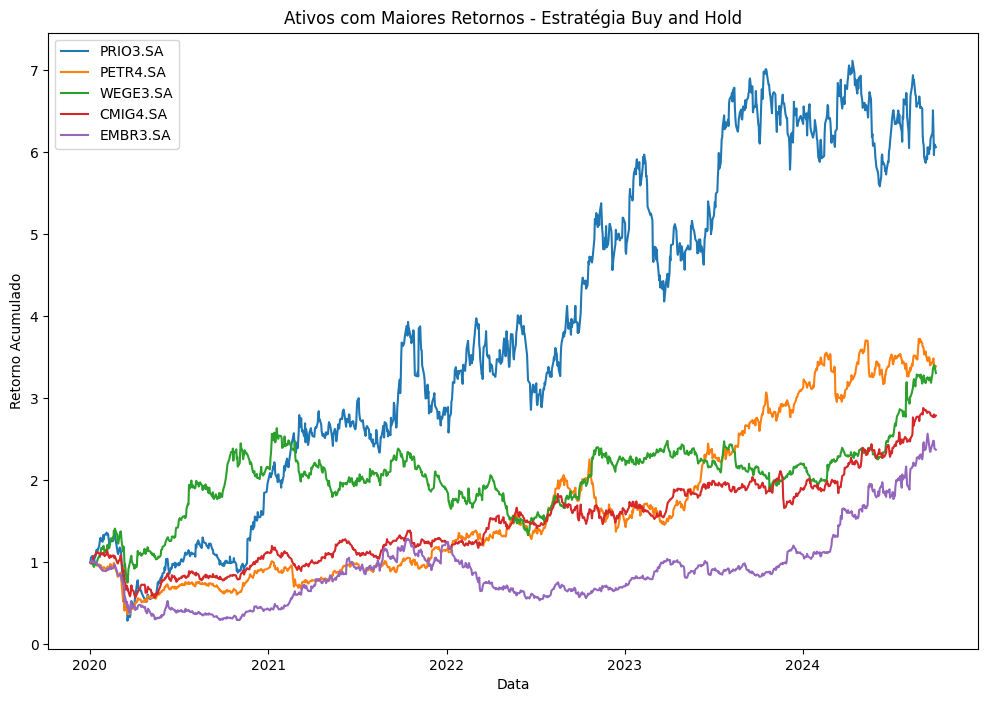

In [9]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor

# Função para buscar os dados de um ativo
def baixar_dados(ticker, start_date, end_date):
    try:
        ativo = yf.Ticker(ticker)
        historico = ativo.history(start=start_date, end=end_date)['Close']
        if historico.empty:
            print(f"Dados não disponíveis para {ticker}")
        return historico
    except Exception as e:
        print(f"Erro ao baixar dados para {ticker}: {e}")
        return pd.Series()

# Simulação de estratégia Buy and Hold
ativos_bh = [
    # 100 ações
    "PETR4.SA", "VALE3.SA", "ITUB4.SA", "BBDC4.SA", "BBAS3.SA", "ABEV3.SA",
    "WEGE3.SA", "MGLU3.SA", "B3SA3.SA", "RENT3.SA", "EQTL3.SA", "ITSA4.SA",
    "SUZB3.SA", "JBSS3.SA", "GGBR4.SA", "ELET3.SA", "BBDC3.SA", "CSNA3.SA",
    "UGPA3.SA", "ELET6.SA", "TAEE11.SA", "BRFS3.SA", "BRKM5.SA", "ENBR3.SA",
    "KLBN11.SA", "BBSE3.SA", "PRIO3.SA", "SBSP3.SA", "CSAN3.SA", "GOLL4.SA",
    "TOTS3.SA", "CPLE6.SA", "VIVT3.SA", "LREN3.SA", "EMBR3.SA", "CMIG4.SA",
    "MULT3.SA", "CCRO3.SA", "RAIL3.SA", "TIMS3.SA", "YDUQ3.SA", "AMER3.SA",
    "DXCO3.SA", "LWSA3.SA", "MRFG3.SA", "CVCB3.SA", "QUAL3.SA", "VBBR3.SA",
    "BRML3.SA", "POSI3.SA", "PETZ3.SA", "RAIZ4.SA", "ENGI11.SA", "ALPA4.SA",
    "CPFE3.SA", "SULA11.SA", "EZTC3.SA", "MEAL3.SA", "CYRE3.SA", "HAPV3.SA",
    "NTCO3.SA", "TRPL4.SA", "ARZZ3.SA", "CRFB3.SA", "GOAU4.SA", "SLCE3.SA",
    "SANB11.SA", "MRVE3.SA", "PCAR3.SA", "RECV3.SA", "STBP3.SA", "BPAC11.SA",
    "BEEF3.SA", "MOVI3.SA", "AESB3.SA", "TASA4.SA", "SEER3.SA", "NEOE3.SA",
    "LIGT3.SA", "VIIA3.SA", "AZUL4.SA", "RAPT4.SA", "POMO4.SA", "USIM5.SA",
    "ECOR3.SA", "MYPK3.SA", "SOMA3.SA", "BLAU3.SA", "RRRP3.SA", "CARD3.SA",
    "BRAP4.SA", "MRLN3.SA", "PARD3.SA", "JHSF3.SA", "SIMH3.SA", "CASH3.SA",
    "RDOR3.SA", "FLRY3.SA", "SMTO3.SA", "ROMI3.SA", "ENEV3.SA", "IGTI11.SA",
    "BRSR6.SA", "TIET11.SA", "CSMG3.SA"

    ,

    # 99 Fundos imobiliários
    "HGLG11.SA", "XPML11.SA", "KNRI11.SA", "VISC11.SA", "ABCP11.SA", 
    "MALL11.SA", "BBPO11.SA", "FIIP11.SA", "RBRP11.SA", "BRCR11.SA", 
    "CPTS11.SA", "TRXF11.SA", "HGRU11.SA", "SHUL11.SA", "FEXC11.SA", 
    "IRDM11.SA", "MFII11.SA", "RBRF11.SA", "JSRE11.SA", "PSI11.SA", 
    "MXRF11.SA", "VLOG11.SA", "RZAK11.SA", "HGBS11.SA", "XPCM11.SA", 
    "AIEC11.SA", "ALZR11.SA", "KNHY11.SA", "IRFI11.SA", "HGFII11.SA", 
    "KFOF11.SA", "CEAR11.SA", "SPTI11.SA", "DEVA11.SA", "TORD11.SA", 
    "ABFI11.SA", "MOAT11.SA", "VTLT11.SA", "FIIP11B.SA", "PLCR11.SA", 
    "HREN11.SA", "MALL11.SA", "RZAK11.SA", "RBRF11.SA", "JSRE11.SA", 
    "MOGL11.SA", "BCRI11.SA", "ALZR11.SA", "HGRU11.SA", "FIF.SA", 
    "RBCO11.SA", "FLMA11.SA", "CVBI11.SA", "VGHF11.SA", "EXPL11.SA", 
    "TEEB11.SA", "RCFF11.SA", "HGBS11.SA", "TGAR11.SA", "TRXX11.SA", 
    "VIBR11.SA", "MUNI11.SA", "VGRI11.SA", "XPLG11.SA", "GGFI11.SA", 
    "VAMC11.SA", "GOUV11.SA", "SBPR11.SA", "FAFF11.SA", "IRLM11.SA", 
    "KGLG11.SA", "FEXC11.SA", "VMCF11.SA", "HGGI11.SA", "MCLG11.SA", 
    "CPSO11.SA", "AGRO11.SA", "FVAU11.SA", "PNSH11.SA", "MPTI11.SA", 
    "RHDF11.SA", "TGPR11.SA", "WBFF11.SA", "FFCI11.SA", "HIRA11.SA", 
    "IRAC11.SA", "RBRX11.SA", "TAPO11.SA", "GTWL11.SA", "GGRI11.SA", 
    "FOFT11.SA", "HGLG11.SA", "FIDI11.SA", "VTIQ11.SA",
    "RBRP11.SA", "REIT11.SA", "HARR11.SA", "SHPF11.SA", "OMGI11.SA"

    ,

    "BOVA11.SA",  # ETF que replica o índice Bovespa
    "IVVB11.SA",  # ETF que replica o índice S&P 500
    "SMAL11.SA",  # ETF de small caps
    "BOVV11.SA",  # ETF de ações do IBOVESPA
    "DIVO11.SA",  # ETF de ações com pagamento de dividendos
    "GOVE11.SA",  # ETF de títulos públicos
    "RENT11.SA",  # FII Fundo de Investimento em Renda Fixa
    "RBRF11.SA",  # FII Fundo de Investimento Imobiliário
    "XPML11.SA",  # FII Fundo de Investimento Multimercado
    "ITAG11.SA",  # ETF de ações do índice IBrX-50
    "SPXI11.SA",  # ETF que replica o S&P 500
    "IMAB11.SA",  # ETF que replica o índice de renda fixa
    "IBOV11.SA",  # ETF que replica o IBOVESPA
    "BIDI11.SA",  # ETF de ações de dividendos
    "XFIX11.SA",  # ETF com foco em renda fixa
    "TSMT11.SA",  # Fundo de Investimento de Multimercado
    "PGBL11.SA",  # Fundo de Investimentos em Ações e Renda Fixa
    "SPXI11.SA",  # Fundo de Investimento em Ações
    "IVV11.SA",   # Fundo de Investimentos em Ações
    "MODF11.SA",  # Fundo de Investimentos em Fundos de Renda Fixa
    "LIMA11.SA",  # Fundo de Investimentos Multimercado
    "VGIA11.SA",  # Fundo de Investimentos em Fundos Imobiliários
    "VFIX11.SA",  # Fundo de Investimentos em Renda Fixa
    "FIXX11.SA",  # Fundo de Investimentos em Commodities
    "TISS11.SA",  # Fundo de Investimentos em Setores Emergentes
    "MAXF11.SA",  # Fundo de Investimentos de Ações
    "MDLA11.SA",  # Fundo de Investimentos em Ações e Renda Fixa
    "FISX11.SA",  # Fundo de Investimentos em Ações
    "RBGF11.SA",  # Fundo de Investimentos em Renda Fixa
    "BRCO11.SA",  # Fundo de Investimentos Imobiliários
    "SUGO11.SA",  # Fundo de Investimentos
    "AGLU11.SA",  # Fundo de Investimentos em Ações
    "RHGB11.SA",  # Fundo de Investimentos em Fundos Imobiliários
    "RHF11.SA",   # Fundo de Investimentos em Ações e Renda Fixa
    "MELI11.SA",  # Fundo de Investimentos em Ações
    "VTRA11.SA",  # Fundo de Investimentos de Tecnologia
    "VINC11.SA",  # Fundo de Investimentos de Índices
    "CAPI11.SA",  # Fundo de Investimentos
    "FEFI11.SA",  # Fundo de Investimentos em Renda Fixa
    "FIRE11.SA",  # Fundo de Investimentos Multimercado
    "PENS11.SA",  # Fundo de Investimentos
    "ATIVO11.SA", # Fundo de Investimentos em Ações
    "VITA11.SA",  # Fundo de Investimentos Multimercado
    "RVAL11.SA",  # Fundo de Investimentos em Ações
    "FOFF11.SA",  # Fundo de Investimentos em Fundos de Ações
    "LVRI11.SA",  # Fundo de Investimentos Multimercado
    "RUSO11.SA",  # Fundo de Investimentos em Setores Específicos
    "MOEM11.SA",  # Fundo de Investimentos em Multimercados
    "AFLA11.SA",  # Fundo de Investimentos Multimercado
    "FLID11.SA",  # Fundo de Investimentos de Renda Fixa
    "ABBA11.SA",  # Fundo de Investimentos
    "JUNO11.SA",  # Fundo de Investimentos de Ações
    "MPLF11.SA",  # Fundo de Investimentos Multimercado
    "BRAM11.SA",  # Fundo de Investimentos
    "RMRF11.SA",  # Fundo de Investimentos de Renda Fixa
    "MGLO11.SA",  # Fundo de Investimentos Multimercado
    "BMTL11.SA",  # Fundo de Investimentos em Fundos Imobiliários
    "POLO11.SA",  # Fundo de Investimentos Multimercado
    "FGTR11.SA",  # Fundo de Investimentos em Tecnologia
    "LIRR11.SA",  # Fundo de Investimentos em Renda Fixa
    "CONV11.SA",  # Fundo de Investimentos Multimercado
    "NOVA11.SA",  # Fundo de Investimentos Multimercado
    "SMART11.SA", # Fundo de Investimentos em Fundos de Ações
    "VITT11.SA",  # Fundo de Investimentos Multimercado
    "GOAL11.SA",  # Fundo de Investimentos de Renda Fixa
    "SIGA11.SA",  # Fundo de Investimentos em Fundos Imobiliários
    "PREM11.SA",  # Fundo de Investimentos em Multimercados
    "TESS11.SA",  # Fundo de Investimentos
    "DIAS11.SA",  # Fundo de Investimentos em Ações
    "BNDX11.SA",  # Fundo de Investimentos em Renda Fixa
    "TDFX11.SA",  # Fundo de Investimentos Multimercado
    "PEAX11.SA",  # Fundo de Investimentos em Ações
    "ITAU11.SA",  # Fundo de Investimentos
    "FAMA11.SA",  # Fundo de Investimentos Multimercado
    "TACO11.SA",  # Fundo de Investimentos Multimercado
    "BEST11.SA",  # Fundo de Investimentos
    "BOLE11.SA",  # Fundo de Investimentos em Ações
    "PEEL11.SA",  # Fundo de Investimentos em Ações
    "CITA11.SA",  # Fundo de Investimentos Multimercado
    "APEX11.SA"   # Fundo de Investimentos Multimercado

    ,


    "BTG11.SA",                # Debênture da empresa BTG Pactual
    "B3SA3.SA",                # Debênture da B3 (Bolsa de Valores)
    "VULC3.SA",                # Debênture da Vulcanização do Brasil
    "RAIZ3.SA",                # Debênture da Raiz Energias Renováveis
    "BBSE3.SA",                # Debênture do Banco do Brasil
    "MERC11.SA",               # Debênture do Mercado Livre
    "CEMIG3.SA",               # Debênture da CEMIG (Companhia Energética de Minas Gerais)
    "IFR3.SA",                 # Debênture do Intercement
    "BASF3.SA",                # Debênture da BASF
    "BBAS3.SA",                # Debênture do Banco do Brasil
    "GGBR4.SA",                # Debênture da Gerdau
    "CSNA3.SA",                # Debênture da Companhia Siderúrgica Nacional
    "VIVT3.SA",                # Debênture da Telefônica Vivo
    "KLBN11.SA",               # Debênture da Klabin
    "LREN3.SA",                # Debênture da Lojas Renner
    "PTBL11.SA",               # Debênture da Petrobras
    "ITUB4.SA",                # Debênture do Itaú Unibanco
    "BBPO11.SA",               # Debênture do Banco do Brasil
    "BRKM5.SA",                # Debênture do Braskem
    "COCA11.SA",               # Debênture da Coca-Cola
    "MGLU3.SA",                # Debênture da Magazine Luiza
    "LAME4.SA",                # Debênture do Grupo Lojas Americanas
    "HAPV3.SA",                # Debênture da Hapvida
    "CPLF11.SA",               # Debênture da Copel (Companhia Paranaense de Energia)
    "RCSA3.SA",                # Debênture da RCSA (Rede de Comércio e Serviços do Amazonas)
    "AGRO3.SA",                # Debênture da Agroterra
    "ALUP11.SA",               # Debênture da Alupar Investimentos
    "CESP6.SA",                # Debênture da CESP (Companhia Energética de São Paulo)
    "PGFN11.SA",               # Debênture do Governo Federal
    "ITSA4.SA",                # Debênture do Itaúsa
    "VIVT3.SA",                # Debênture da Telefônica Vivo
    "RSID3.SA",                # Debênture da Rumo S.A.
    "YDUQ3.SA",                # Debênture da Yduqs
    "AURA33.SA",               # Debênture da Aura Minerals
    "TIMP3.SA",                # Debênture da TIM Participações
    "OGXP3.SA",                # Debênture da OGX Petróleo e Gás
    "ELET6.SA",                # Debênture da Eletrobras
    "GRND3.SA",                # Debênture da Grendene
    "NATU3.SA",                # Debênture da Natura
    "FRTA3.SA",                # Debênture da Fras-le
    "BRML3.SA",                # Debênture da BR Malls
    "BBDC3.SA",                # Debênture do Banco Bradesco
    "TCSA3.SA",                # Debênture da Tenda
    "AZUL4.SA",                # Debênture da Azul Linhas Aéreas
    "POMO4.SA",                # Debênture da Pão de Açúcar
    "CLSC3.SA",                # Debênture da Cosan
    "ENAT3.SA",                # Debênture da Eneva
    "COPL3.SA",                # Debênture da Copersucar
    "RCSL3.SA",                # Debênture da Resende
    "SPLT11.SA",               # Debênture da Sprint Telecom
    "CSAN3.SA",                # Debênture da Cosan
    "RLOG3.SA",                # Debênture da Rumo Logística
    "CGAS5.SA"                 # Debênture da Comgás
]

# Usar ThreadPoolExecutor para baixar os dados em paralelo (melhora a velocidade)
with ThreadPoolExecutor() as executor:
    resultados = list(executor.map(lambda ticker: baixar_dados(ticker, start_date, end_date), ativos_bh))

# Unir os dados em um DataFrame
df_bh = pd.concat(resultados, axis=1)
df_bh.columns = ativos_bh  # Nomear as colunas com os tickers

# Verificar se o DataFrame contém dados
if df_bh.empty:
    print("Erro: Nenhum dado foi retornado para os ativos e datas fornecidos.")
else:
    # Calcular retornos diários
    retornos_bh = df_bh.pct_change().fillna(0)

    # Calcular retornos acumulados (Buy and Hold)
    retorno_acumulado_bh = (1 + retornos_bh).cumprod()

    # Cálculo do Retorno Final
    retorno_final_bh = retorno_acumulado_bh.iloc[-1] - 1

    # Exibir os retornos finais em porcentagem
    retorno_final_bh_percent = retorno_final_bh * 100
    print("Retorno Buy and Hold para cada ativo (%):\n", retorno_final_bh_percent)
    
    # Selecionar os 5 principais retornos
    principais_retorno_bh = retorno_final_bh_percent.nlargest(5)
    print("Principais retornos(%): \n", principais_retorno_bh)

    # Plotar retornos acumulados dos principais ativos
    plt.figure(figsize=(12, 8))
    for ticker in principais_retorno_bh.index:
        plt.plot(retorno_acumulado_bh[ticker], label=ticker)
    plt.title('Ativos com Maiores Retornos - Estratégia Buy and Hold')
    plt.xlabel('Data')
    plt.ylabel('Retorno Acumulado')
    plt.legend(loc="upper left")
    plt.show()


#

# Simula estratégia Equal-Weigth

C:\Users\User\AppData\Local\Temp\ipykernel_9848\4247708567.py:192: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fechamento = df_fechamento.fillna(method='ffill')
C:\Users\User\AppData\Local\Temp\ipykernel_9848\4247708567.py:199: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  retornos_ew = df_fechamento.pct_change()


Retorno Equal-Weight ao final do período: 21.72%
Retorno Acumulado ao final do período (ativos):
ABBA11.SA: nan%
ABCP11.SA: -20.13%
ABEV3.SA: -14.98%
ABFI11.SA: nan%
AESB3.SA: -25.13%
AFLA11.SA: nan%
AGLU11.SA: nan%
AGRO11.SA: nan%
AGRO3.SA: 67.46%
AIEC11.SA: -24.59%
ALPA4.SA: -27.66%
ALUP11.SA: 75.52%
ALZR11.SA: 24.91%
AMER3.SA: -97.84%
APEX11.SA: nan%
ARZZ3.SA: nan%
ATIVO11.SA: nan%
AURA33.SA: -31.80%
AZUL4.SA: -55.93%
B3SA3.SA: 57.07%
BASF3.SA: nan%
BBAS3.SA: 13.97%
BBDC3.SA: -31.77%
BBDC4.SA: -32.42%
BBPO11.SA: -30.61%
BBSE3.SA: 18.82%
BCRI11.SA: -31.78%
BEEF3.SA: 49.55%
BEST11.SA: nan%
BIDI11.SA: nan%
BLAU3.SA: -60.07%
BMTL11.SA: nan%
BNDX11.SA: -9.66%
BOLE11.SA: nan%
BOVA11.SA: 48.34%
BOVV11.SA: 49.37%
BPAC11.SA: 504.18%
BRAM11.SA: nan%
BRAP4.SA: 79.04%
BRCO11.SA: 10.17%
BRCR11.SA: -42.44%
BRFS3.SA: -35.18%
BRKM5.SA: -54.75%
BRML3.SA: nan%
BRSR6.SA: -41.68%
BTG11.SA: nan%
CAPI11.SA: nan%
CARD3.SA: nan%
CASH3.SA: -49.74%
CCRO3.SA: 18.17%
CEAR11.SA: nan%
CEMIG3.SA: nan%
CESP6.SA: n

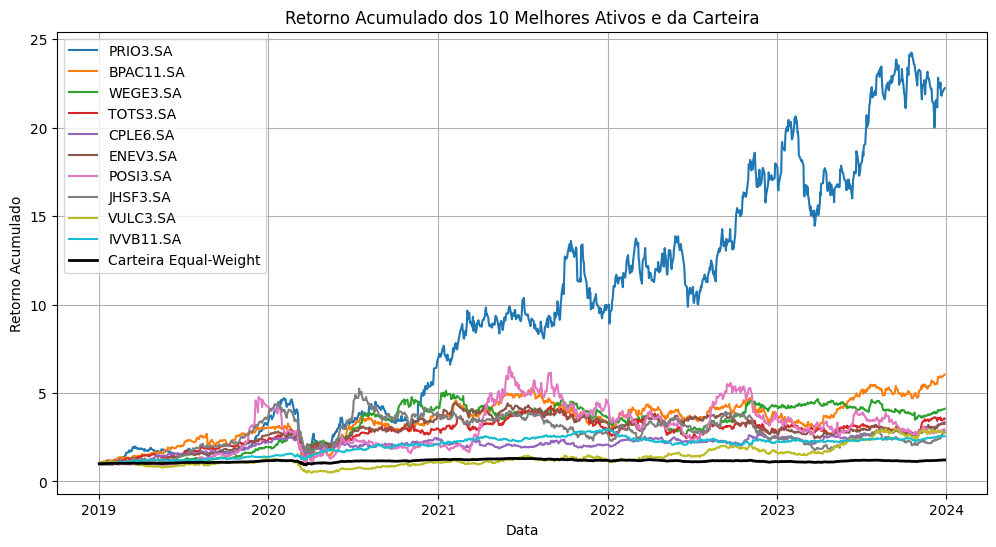

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Simulação de estratégia Buy and Hold
acoes_b3 = [
    # 100 ações
    "PETR4.SA", "VALE3.SA", "ITUB4.SA", "BBDC4.SA", "BBAS3.SA", "ABEV3.SA",
    "WEGE3.SA", "MGLU3.SA", "B3SA3.SA", "RENT3.SA", "EQTL3.SA", "ITSA4.SA",
    "SUZB3.SA", "JBSS3.SA", "GGBR4.SA", "ELET3.SA", "BBDC3.SA", "CSNA3.SA",
    "UGPA3.SA", "ELET6.SA", "TAEE11.SA", "BRFS3.SA", "BRKM5.SA", "ENBR3.SA",
    "KLBN11.SA", "BBSE3.SA", "PRIO3.SA", "SBSP3.SA", "CSAN3.SA", "GOLL4.SA",
    "TOTS3.SA", "CPLE6.SA", "VIVT3.SA", "LREN3.SA", "EMBR3.SA", "CMIG4.SA",
    "MULT3.SA", "CCRO3.SA", "RAIL3.SA", "TIMS3.SA", "YDUQ3.SA", "AMER3.SA",
    "DXCO3.SA", "LWSA3.SA", "MRFG3.SA", "CVCB3.SA", "QUAL3.SA", "VBBR3.SA",
    "BRML3.SA", "POSI3.SA", "PETZ3.SA", "RAIZ4.SA", "ENGI11.SA", "ALPA4.SA",
    "CPFE3.SA", "SULA11.SA", "EZTC3.SA", "MEAL3.SA", "CYRE3.SA", "HAPV3.SA",
    "NTCO3.SA", "TRPL4.SA", "ARZZ3.SA", "CRFB3.SA", "GOAU4.SA", "SLCE3.SA",
    "SANB11.SA", "MRVE3.SA", "PCAR3.SA", "RECV3.SA", "STBP3.SA", "BPAC11.SA",
    "BEEF3.SA", "MOVI3.SA", "AESB3.SA", "TASA4.SA", "SEER3.SA", "NEOE3.SA",
    "LIGT3.SA", "VIIA3.SA", "AZUL4.SA", "RAPT4.SA", "POMO4.SA", "USIM5.SA",
    "ECOR3.SA", "MYPK3.SA", "SOMA3.SA", "BLAU3.SA", "RRRP3.SA", "CARD3.SA",
    "BRAP4.SA", "MRLN3.SA", "PARD3.SA", "JHSF3.SA", "SIMH3.SA", "CASH3.SA",
    "RDOR3.SA", "FLRY3.SA", "SMTO3.SA", "ROMI3.SA", "ENEV3.SA", "IGTI11.SA",
    "BRSR6.SA", "TIET11.SA", "CSMG3.SA"

    ,

    # 99 Fundos imobiliários
    "HGLG11.SA", "XPML11.SA", "KNRI11.SA", "VISC11.SA", "ABCP11.SA", 
    "MALL11.SA", "BBPO11.SA", "FIIP11.SA", "RBRP11.SA", "BRCR11.SA", 
    "CPTS11.SA", "TRXF11.SA", "HGRU11.SA", "SHUL11.SA", "FEXC11.SA", 
    "IRDM11.SA", "MFII11.SA", "RBRF11.SA", "JSRE11.SA", "PSI11.SA", 
    "MXRF11.SA", "VLOG11.SA", "RZAK11.SA", "HGBS11.SA", "XPCM11.SA", 
    "AIEC11.SA", "ALZR11.SA", "KNHY11.SA", "IRFI11.SA", "HGFII11.SA", 
    "KFOF11.SA", "CEAR11.SA", "SPTI11.SA", "DEVA11.SA", "TORD11.SA", 
    "ABFI11.SA", "MOAT11.SA", "VTLT11.SA", "FIIP11B.SA", "PLCR11.SA", 
    "HREN11.SA", "MALL11.SA", "RZAK11.SA", "RBRF11.SA", "JSRE11.SA", 
    "MOGL11.SA", "BCRI11.SA", "ALZR11.SA", "HGRU11.SA", "FIF.SA", 
    "RBCO11.SA", "FLMA11.SA", "CVBI11.SA", "VGHF11.SA", "EXPL11.SA", 
    "TEEB11.SA", "RCFF11.SA", "HGBS11.SA", "TGAR11.SA", "TRXX11.SA", 
    "VIBR11.SA", "MUNI11.SA", "VGRI11.SA", "XPLG11.SA", "GGFI11.SA", 
    "VAMC11.SA", "GOUV11.SA", "SBPR11.SA", "FAFF11.SA", "IRLM11.SA", 
    "KGLG11.SA", "FEXC11.SA", "VMCF11.SA", "HGGI11.SA", "MCLG11.SA", 
    "CPSO11.SA", "AGRO11.SA", "FVAU11.SA", "PNSH11.SA", "MPTI11.SA", 
    "RHDF11.SA", "TGPR11.SA", "WBFF11.SA", "FFCI11.SA", "HIRA11.SA", 
    "IRAC11.SA", "RBRX11.SA", "TAPO11.SA", "GTWL11.SA", "GGRI11.SA", 
    "FOFT11.SA", "HGLG11.SA", "FIDI11.SA", "VTIQ11.SA",
    "RBRP11.SA", "REIT11.SA", "HARR11.SA", "SHPF11.SA", "OMGI11.SA"

    ,

    "BOVA11.SA",  # ETF que replica o índice Bovespa
    "IVVB11.SA",  # ETF que replica o índice S&P 500
    "SMAL11.SA",  # ETF de small caps
    "BOVV11.SA",  # ETF de ações do IBOVESPA
    "DIVO11.SA",  # ETF de ações com pagamento de dividendos
    "GOVE11.SA",  # ETF de títulos públicos
    "RENT11.SA",  # FII Fundo de Investimento em Renda Fixa
    "RBRF11.SA",  # FII Fundo de Investimento Imobiliário
    "XPML11.SA",  # FII Fundo de Investimento Multimercado
    "ITAG11.SA",  # ETF de ações do índice IBrX-50
    "SPXI11.SA",  # ETF que replica o S&P 500
    "IMAB11.SA",  # ETF que replica o índice de renda fixa
    "IBOV11.SA",  # ETF que replica o IBOVESPA
    "BIDI11.SA",  # ETF de ações de dividendos
    "XFIX11.SA",  # ETF com foco em renda fixa
    "TSMT11.SA",  # Fundo de Investimento de Multimercado
    "PGBL11.SA",  # Fundo de Investimentos em Ações e Renda Fixa
    "SPXI11.SA",  # Fundo de Investimento em Ações
    "IVV11.SA",   # Fundo de Investimentos em Ações
    "MODF11.SA",  # Fundo de Investimentos em Fundos de Renda Fixa
    "LIMA11.SA",  # Fundo de Investimentos Multimercado
    "VGIA11.SA",  # Fundo de Investimentos em Fundos Imobiliários
    "VFIX11.SA",  # Fundo de Investimentos em Renda Fixa
    "FIXX11.SA",  # Fundo de Investimentos em Commodities
    "TISS11.SA",  # Fundo de Investimentos em Setores Emergentes
    "MAXF11.SA",  # Fundo de Investimentos de Ações
    "MDLA11.SA",  # Fundo de Investimentos em Ações e Renda Fixa
    "FISX11.SA",  # Fundo de Investimentos em Ações
    "RBGF11.SA",  # Fundo de Investimentos em Renda Fixa
    "BRCO11.SA",  # Fundo de Investimentos Imobiliários
    "SUGO11.SA",  # Fundo de Investimentos
    "AGLU11.SA",  # Fundo de Investimentos em Ações
    "RHGB11.SA",  # Fundo de Investimentos em Fundos Imobiliários
    "RHF11.SA",   # Fundo de Investimentos em Ações e Renda Fixa
    "MELI11.SA",  # Fundo de Investimentos em Ações
    "VTRA11.SA",  # Fundo de Investimentos de Tecnologia
    "VINC11.SA",  # Fundo de Investimentos de Índices
    "CAPI11.SA",  # Fundo de Investimentos
    "FEFI11.SA",  # Fundo de Investimentos em Renda Fixa
    "FIRE11.SA",  # Fundo de Investimentos Multimercado
    "PENS11.SA",  # Fundo de Investimentos
    "ATIVO11.SA", # Fundo de Investimentos em Ações
    "VITA11.SA",  # Fundo de Investimentos Multimercado
    "RVAL11.SA",  # Fundo de Investimentos em Ações
    "FOFF11.SA",  # Fundo de Investimentos em Fundos de Ações
    "LVRI11.SA",  # Fundo de Investimentos Multimercado
    "RUSO11.SA",  # Fundo de Investimentos em Setores Específicos
    "MOEM11.SA",  # Fundo de Investimentos em Multimercados
    "AFLA11.SA",  # Fundo de Investimentos Multimercado
    "FLID11.SA",  # Fundo de Investimentos de Renda Fixa
    "ABBA11.SA",  # Fundo de Investimentos
    "JUNO11.SA",  # Fundo de Investimentos de Ações
    "MPLF11.SA",  # Fundo de Investimentos Multimercado
    "BRAM11.SA",  # Fundo de Investimentos
    "RMRF11.SA",  # Fundo de Investimentos de Renda Fixa
    "MGLO11.SA",  # Fundo de Investimentos Multimercado
    "BMTL11.SA",  # Fundo de Investimentos em Fundos Imobiliários
    "POLO11.SA",  # Fundo de Investimentos Multimercado
    "FGTR11.SA",  # Fundo de Investimentos em Tecnologia
    "LIRR11.SA",  # Fundo de Investimentos em Renda Fixa
    "CONV11.SA",  # Fundo de Investimentos Multimercado
    "NOVA11.SA",  # Fundo de Investimentos Multimercado
    "SMART11.SA", # Fundo de Investimentos em Fundos de Ações
    "VITT11.SA",  # Fundo de Investimentos Multimercado
    "GOAL11.SA",  # Fundo de Investimentos de Renda Fixa
    "SIGA11.SA",  # Fundo de Investimentos em Fundos Imobiliários
    "PREM11.SA",  # Fundo de Investimentos em Multimercados
    "TESS11.SA",  # Fundo de Investimentos
    "DIAS11.SA",  # Fundo de Investimentos em Ações
    "BNDX11.SA",  # Fundo de Investimentos em Renda Fixa
    "TDFX11.SA",  # Fundo de Investimentos Multimercado
    "PEAX11.SA",  # Fundo de Investimentos em Ações
    "ITAU11.SA",  # Fundo de Investimentos
    "FAMA11.SA",  # Fundo de Investimentos Multimercado
    "TACO11.SA",  # Fundo de Investimentos Multimercado
    "BEST11.SA",  # Fundo de Investimentos
    "BOLE11.SA",  # Fundo de Investimentos em Ações
    "PEEL11.SA",  # Fundo de Investimentos em Ações
    "CITA11.SA",  # Fundo de Investimentos Multimercado
    "APEX11.SA"   # Fundo de Investimentos Multimercado

    ,


    "BTG11.SA",                # Debênture da empresa BTG Pactual
    "B3SA3.SA",                # Debênture da B3 (Bolsa de Valores)
    "VULC3.SA",                # Debênture da Vulcanização do Brasil
    "RAIZ3.SA",                # Debênture da Raiz Energias Renováveis
    "BBSE3.SA",                # Debênture do Banco do Brasil
    "MERC11.SA",               # Debênture do Mercado Livre
    "CEMIG3.SA",               # Debênture da CEMIG (Companhia Energética de Minas Gerais)
    "IFR3.SA",                 # Debênture do Intercement
    "BASF3.SA",                # Debênture da BASF
    "BBAS3.SA",                # Debênture do Banco do Brasil
    "GGBR4.SA",                # Debênture da Gerdau
    "CSNA3.SA",                # Debênture da Companhia Siderúrgica Nacional
    "VIVT3.SA",                # Debênture da Telefônica Vivo
    "KLBN11.SA",               # Debênture da Klabin
    "LREN3.SA",                # Debênture da Lojas Renner
    "PTBL11.SA",               # Debênture da Petrobras
    "ITUB4.SA",                # Debênture do Itaú Unibanco
    "BBPO11.SA",               # Debênture do Banco do Brasil
    "BRKM5.SA",                # Debênture do Braskem
    "COCA11.SA",               # Debênture da Coca-Cola
    "MGLU3.SA",                # Debênture da Magazine Luiza
    "LAME4.SA",                # Debênture do Grupo Lojas Americanas
    "HAPV3.SA",                # Debênture da Hapvida
    "CPLF11.SA",               # Debênture da Copel (Companhia Paranaense de Energia)
    "RCSA3.SA",                # Debênture da RCSA (Rede de Comércio e Serviços do Amazonas)
    "AGRO3.SA",                # Debênture da Agroterra
    "ALUP11.SA",               # Debênture da Alupar Investimentos
    "CESP6.SA",                # Debênture da CESP (Companhia Energética de São Paulo)
    "PGFN11.SA",               # Debênture do Governo Federal
    "ITSA4.SA",                # Debênture do Itaúsa
    "VIVT3.SA",                # Debênture da Telefônica Vivo
    "RSID3.SA",                # Debênture da Rumo S.A.
    "YDUQ3.SA",                # Debênture da Yduqs
    "AURA33.SA",               # Debênture da Aura Minerals
    "TIMP3.SA",                # Debênture da TIM Participações
    "OGXP3.SA",                # Debênture da OGX Petróleo e Gás
    "ELET6.SA",                # Debênture da Eletrobras
    "GRND3.SA",                # Debênture da Grendene
    "NATU3.SA",                # Debênture da Natura
    "FRTA3.SA",                # Debênture da Fras-le
    "BRML3.SA",                # Debênture da BR Malls
    "BBDC3.SA",                # Debênture do Banco Bradesco
    "TCSA3.SA",                # Debênture da Tenda
    "AZUL4.SA",                # Debênture da Azul Linhas Aéreas
    "POMO4.SA",                # Debênture da Pão de Açúcar
    "CLSC3.SA",                # Debênture da Cosan
    "ENAT3.SA",                # Debênture da Eneva
    "COPL3.SA",                # Debênture da Copersucar
    "RCSL3.SA",                # Debênture da Resende
    "SPLT11.SA",               # Debênture da Sprint Telecom
    "CSAN3.SA",                # Debênture da Cosan
    "RLOG3.SA",                # Debênture da Rumo Logística
    "CGAS5.SA"                 # Debênture da Comgás
]

# Preencher valores ausentes com o método ffill (pode ser ajustado conforme sua necessidade)
df_fechamento = df_fechamento.fillna(method='ffill')

# Pesos iguais para cada ativo, normalizando para somar exatamente 1
n_ativos = len(df_fechamento.columns)
pesos_equal = [1/n_ativos] * n_ativos  # Pesos distribuídos igualmente

# Calcular retornos diários (df_fechamento deve ser um DataFrame com os preços de fechamento das ações)
retornos_ew = df_fechamento.pct_change()

# Verificar se o DataFrame de retornos tem o mesmo número de colunas que os pesos
if retornos_ew.shape[1] != len(pesos_equal):
    raise ValueError(f"Erro: O número de ações ({n_ativos}) e o número de colunas no DataFrame ({retornos_ew.shape[1]}) não coincidem.")
else:
    # Multiplicar cada coluna pelos pesos e somar ao longo do eixo 1 (linhas)
    retorno_acumulado_ew = (1 + (retornos_ew * pesos_equal).sum(axis=1)).cumprod()

    # Calcular o retorno final da carteira
    retorno_final_carteira = retorno_acumulado_ew.iloc[-1] - 1
    print(f"Retorno Equal-Weight ao final do período: {retorno_final_carteira:.2%}")

    # Calcular o retorno final de cada ativo
    retorno_final_ativos = (1 + retornos_ew).cumprod().iloc[-1] - 1

    # Exibir o retorno acumulado final de cada ativo
    print("Retorno Acumulado ao final do período (ativos):")
    for ticker, retorno in retorno_final_ativos.items():
        print(f"{ticker}: {retorno:.2%}")

    # Selecionar os 10 ativos com os maiores retornos finais
    melhores_ativos = retorno_final_ativos.nlargest(10).index.tolist()

    # Visualização gráfica dos retornos acumulados dos melhores ativos e da carteira
    plt.figure(figsize=(12, 6))
    
    # Adicionar gráfico para os melhores ativos
    for ticker in melhores_ativos:
        plt.plot((1 + retornos_ew[ticker]).cumprod(), label=ticker)

    # Adicionar gráfico da carteira
    plt.plot(retorno_acumulado_ew, label='Carteira Equal-Weight', color='black', linewidth=2)

    # Customizações do gráfico
    plt.title('Retorno Acumulado dos 10 Melhores Ativos e da Carteira')
    plt.xlabel('Data')
    plt.ylabel('Retorno Acumulado')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()


[*********************100%***********************]  302 of 302 completed

144 Failed downloads:
['ENBR3.SA', 'PGFN11.SA', 'IFR3.SA', 'COCA11.SA', 'AFLA11.SA', 'LVRI11.SA', 'IRLM11.SA', 'PEEL11.SA', 'FAMA11.SA', 'RLOG3.SA', 'MCLG11.SA', 'MRLN3.SA', 'GTWL11.SA', 'MAXF11.SA', 'ABBA11.SA', 'VTRA11.SA', 'NATU3.SA', 'WBFF11.SA', 'MOGL11.SA', 'TISS11.SA', 'CPLF11.SA', 'OMGI11.SA', 'SHPF11.SA', 'FOFF11.SA', 'SIGA11.SA', 'VAMC11.SA', 'CESP6.SA', 'VITT11.SA', 'SBPR11.SA', 'RBGF11.SA', 'TGPR11.SA', 'PARD3.SA', 'SMART11.SA', 'KGLG11.SA', 'FGTR11.SA', 'RVAL11.SA', 'TEEB11.SA', 'TIET11.SA', 'LIRR11.SA', 'PNSH11.SA', 'GOAL11.SA', 'LAME4.SA', 'HIRA11.SA', 'JUNO11.SA', 'BRML3.SA', 'SUGO11.SA', 'SPTI11.SA', 'AGLU11.SA', 'SHUL11.SA', 'RMRF11.SA', 'IRAC11.SA', 'MOEM11.SA', 'FLID11.SA', 'FRTA3.SA', 'RAIZ3.SA', 'TSMT11.SA', 'PTBL11.SA', 'ATIVO11.SA', 'CEAR11.SA', 'VIIA3.SA', 'RUSO11.SA', 'HREN11.SA', 'TDFX11.SA', 'VFIX11.SA', 'GOUV11.SA', 'MDLA11.SA', 'FIDI11.SA', 'GGFI11.SA', 'RHDF11.SA', 'CPSO11.SA', 'VIN

Retorno Equal-Weight ao final do período: 21.72%
Volatilidade da Carteira Equal-Weight: nan%
Retorno Acumulado ao final do período (ativos):
ABBA11.SA: nan%
ABCP11.SA: -20.13%
ABEV3.SA: -14.98%
ABFI11.SA: nan%
AESB3.SA: -25.13%
AFLA11.SA: nan%
AGLU11.SA: nan%
AGRO11.SA: nan%
AGRO3.SA: 67.46%
AIEC11.SA: -24.59%
ALPA4.SA: -27.66%
ALUP11.SA: 75.52%
ALZR11.SA: 24.91%
AMER3.SA: -97.84%
APEX11.SA: nan%
ARZZ3.SA: nan%
ATIVO11.SA: nan%
AURA33.SA: -31.80%
AZUL4.SA: -55.93%
B3SA3.SA: 57.07%
BASF3.SA: nan%
BBAS3.SA: 13.97%
BBDC3.SA: -31.77%
BBDC4.SA: -32.42%
BBPO11.SA: -30.61%
BBSE3.SA: 18.82%
BCRI11.SA: -31.78%
BEEF3.SA: 49.55%
BEST11.SA: nan%
BIDI11.SA: nan%
BLAU3.SA: -60.07%
BMTL11.SA: nan%
BNDX11.SA: -9.66%
BOLE11.SA: nan%
BOVA11.SA: 48.34%
BOVV11.SA: 49.37%
BPAC11.SA: 504.18%
BRAM11.SA: nan%
BRAP4.SA: 79.04%
BRCO11.SA: 10.17%
BRCR11.SA: -42.44%
BRFS3.SA: -35.18%
BRKM5.SA: -54.75%
BRML3.SA: nan%
BRSR6.SA: -41.68%
BTG11.SA: nan%
CAPI11.SA: nan%
CARD3.SA: nan%
CASH3.SA: -49.74%
CCRO3.SA: 18.17%

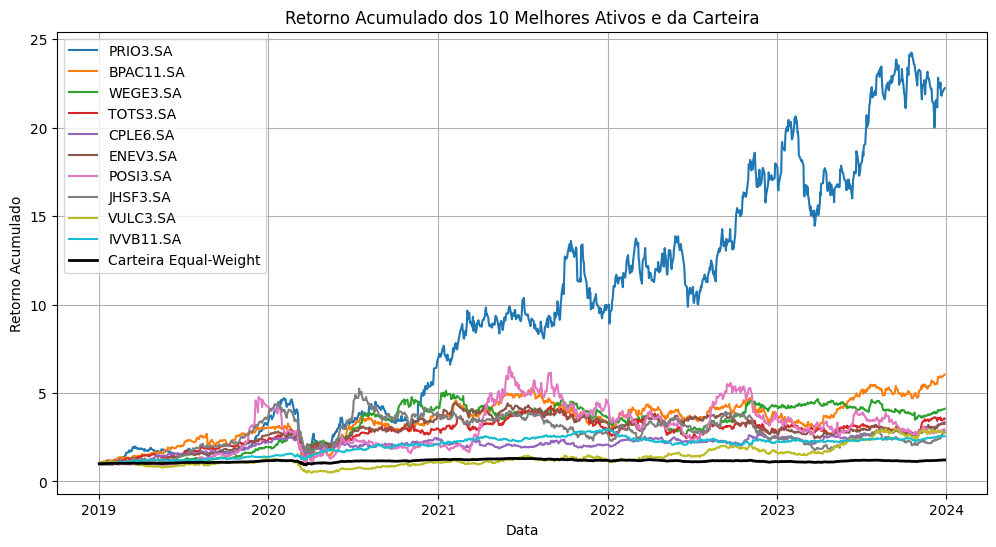

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Definir a lista de ações (do seu código original)
acoes_b3 = [
    "PETR4.SA", "VALE3.SA", "ITUB4.SA", "BBDC4.SA", "BBAS3.SA", "ABEV3.SA",
    "WEGE3.SA", "MGLU3.SA", "B3SA3.SA", "RENT3.SA", "EQTL3.SA", "ITSA4.SA",
    "SUZB3.SA", "JBSS3.SA", "GGBR4.SA", "ELET3.SA", "BBDC3.SA", "CSNA3.SA",
    "UGPA3.SA", "ELET6.SA", "TAEE11.SA", "BRFS3.SA", "BRKM5.SA", "ENBR3.SA",
    "KLBN11.SA", "BBSE3.SA", "PRIO3.SA", "SBSP3.SA", "CSAN3.SA", "GOLL4.SA",
    "TOTS3.SA", "CPLE6.SA", "VIVT3.SA", "LREN3.SA", "EMBR3.SA", "CMIG4.SA",
    "MULT3.SA", "CCRO3.SA", "RAIL3.SA", "TIMS3.SA", "YDUQ3.SA", "AMER3.SA",
    "DXCO3.SA", "LWSA3.SA", "MRFG3.SA", "CVCB3.SA", "QUAL3.SA", "VBBR3.SA",
    "BRML3.SA", "POSI3.SA", "PETZ3.SA", "RAIZ4.SA", "ENGI11.SA", "ALPA4.SA",
    "CPFE3.SA", "SULA11.SA", "EZTC3.SA", "MEAL3.SA", "CYRE3.SA", "HAPV3.SA",
    "NTCO3.SA", "TRPL4.SA", "ARZZ3.SA", "CRFB3.SA", "GOAU4.SA", "SLCE3.SA",
    "SANB11.SA", "MRVE3.SA", "PCAR3.SA", "RECV3.SA", "STBP3.SA", "BPAC11.SA",
    "BEEF3.SA", "MOVI3.SA", "AESB3.SA", "TASA4.SA", "SEER3.SA", "NEOE3.SA",
    "LIGT3.SA", "VIIA3.SA", "AZUL4.SA", "RAPT4.SA", "POMO4.SA", "USIM5.SA",
    "ECOR3.SA", "MYPK3.SA", "SOMA3.SA", "BLAU3.SA", "RRRP3.SA", "CARD3.SA",
    "BRAP4.SA", "MRLN3.SA", "PARD3.SA", "JHSF3.SA", "SIMH3.SA", "CASH3.SA",
    "RDOR3.SA", "FLRY3.SA", "SMTO3.SA", "ROMI3.SA", "ENEV3.SA", "IGTI11.SA",
    "BRSR6.SA", "TIET11.SA", "CSMG3.SA"

    ,

    # 99 Fundos imobiliários
    "HGLG11.SA", "XPML11.SA", "KNRI11.SA", "VISC11.SA", "ABCP11.SA", 
    "MALL11.SA", "BBPO11.SA", "FIIP11.SA", "RBRP11.SA", "BRCR11.SA", 
    "CPTS11.SA", "TRXF11.SA", "HGRU11.SA", "SHUL11.SA", "FEXC11.SA", 
    "IRDM11.SA", "MFII11.SA", "RBRF11.SA", "JSRE11.SA", "PSI11.SA", 
    "MXRF11.SA", "VLOG11.SA", "RZAK11.SA", "HGBS11.SA", "XPCM11.SA", 
    "AIEC11.SA", "ALZR11.SA", "KNHY11.SA", "IRFI11.SA", "HGFII11.SA", 
    "KFOF11.SA", "CEAR11.SA", "SPTI11.SA", "DEVA11.SA", "TORD11.SA", 
    "ABFI11.SA", "MOAT11.SA", "VTLT11.SA", "FIIP11B.SA", "PLCR11.SA", 
    "HREN11.SA", "MALL11.SA", "RZAK11.SA", "RBRF11.SA", "JSRE11.SA", 
    "MOGL11.SA", "BCRI11.SA", "ALZR11.SA", "HGRU11.SA", "FIF.SA", 
    "RBCO11.SA", "FLMA11.SA", "CVBI11.SA", "VGHF11.SA", "EXPL11.SA", 
    "TEEB11.SA", "RCFF11.SA", "HGBS11.SA", "TGAR11.SA", "TRXX11.SA", 
    "VIBR11.SA", "MUNI11.SA", "VGRI11.SA", "XPLG11.SA", "GGFI11.SA", 
    "VAMC11.SA", "GOUV11.SA", "SBPR11.SA", "FAFF11.SA", "IRLM11.SA", 
    "KGLG11.SA", "FEXC11.SA", "VMCF11.SA", "HGGI11.SA", "MCLG11.SA", 
    "CPSO11.SA", "AGRO11.SA", "FVAU11.SA", "PNSH11.SA", "MPTI11.SA", 
    "RHDF11.SA", "TGPR11.SA", "WBFF11.SA", "FFCI11.SA", "HIRA11.SA", 
    "IRAC11.SA", "RBRX11.SA", "TAPO11.SA", "GTWL11.SA", "GGRI11.SA", 
    "FOFT11.SA", "HGLG11.SA", "FIDI11.SA", "VTIQ11.SA",
    "RBRP11.SA", "REIT11.SA", "HARR11.SA", "SHPF11.SA", "OMGI11.SA"

    ,

    "BOVA11.SA",  # ETF que replica o índice Bovespa
    "IVVB11.SA",  # ETF que replica o índice S&P 500
    "SMAL11.SA",  # ETF de small caps
    "BOVV11.SA",  # ETF de ações do IBOVESPA
    "DIVO11.SA",  # ETF de ações com pagamento de dividendos
    "GOVE11.SA",  # ETF de títulos públicos
    "RENT11.SA",  # FII Fundo de Investimento em Renda Fixa
    "RBRF11.SA",  # FII Fundo de Investimento Imobiliário
    "XPML11.SA",  # FII Fundo de Investimento Multimercado
    "ITAG11.SA",  # ETF de ações do índice IBrX-50
    "SPXI11.SA",  # ETF que replica o S&P 500
    "IMAB11.SA",  # ETF que replica o índice de renda fixa
    "IBOV11.SA",  # ETF que replica o IBOVESPA
    "BIDI11.SA",  # ETF de ações de dividendos
    "XFIX11.SA",  # ETF com foco em renda fixa
    "TSMT11.SA",  # Fundo de Investimento de Multimercado
    "PGBL11.SA",  # Fundo de Investimentos em Ações e Renda Fixa
    "SPXI11.SA",  # Fundo de Investimento em Ações
    "IVV11.SA",   # Fundo de Investimentos em Ações
    "MODF11.SA",  # Fundo de Investimentos em Fundos de Renda Fixa
    "LIMA11.SA",  # Fundo de Investimentos Multimercado
    "VGIA11.SA",  # Fundo de Investimentos em Fundos Imobiliários
    "VFIX11.SA",  # Fundo de Investimentos em Renda Fixa
    "FIXX11.SA",  # Fundo de Investimentos em Commodities
    "TISS11.SA",  # Fundo de Investimentos em Setores Emergentes
    "MAXF11.SA",  # Fundo de Investimentos de Ações
    "MDLA11.SA",  # Fundo de Investimentos em Ações e Renda Fixa
    "FISX11.SA",  # Fundo de Investimentos em Ações
    "RBGF11.SA",  # Fundo de Investimentos em Renda Fixa
    "BRCO11.SA",  # Fundo de Investimentos Imobiliários
    "SUGO11.SA",  # Fundo de Investimentos
    "AGLU11.SA",  # Fundo de Investimentos em Ações
    "RHGB11.SA",  # Fundo de Investimentos em Fundos Imobiliários
    "RHF11.SA",   # Fundo de Investimentos em Ações e Renda Fixa
    "MELI11.SA",  # Fundo de Investimentos em Ações
    "VTRA11.SA",  # Fundo de Investimentos de Tecnologia
    "VINC11.SA",  # Fundo de Investimentos de Índices
    "CAPI11.SA",  # Fundo de Investimentos
    "FEFI11.SA",  # Fundo de Investimentos em Renda Fixa
    "FIRE11.SA",  # Fundo de Investimentos Multimercado
    "PENS11.SA",  # Fundo de Investimentos
    "ATIVO11.SA", # Fundo de Investimentos em Ações
    "VITA11.SA",  # Fundo de Investimentos Multimercado
    "RVAL11.SA",  # Fundo de Investimentos em Ações
    "FOFF11.SA",  # Fundo de Investimentos em Fundos de Ações
    "LVRI11.SA",  # Fundo de Investimentos Multimercado
    "RUSO11.SA",  # Fundo de Investimentos em Setores Específicos
    "MOEM11.SA",  # Fundo de Investimentos em Multimercados
    "AFLA11.SA",  # Fundo de Investimentos Multimercado
    "FLID11.SA",  # Fundo de Investimentos de Renda Fixa
    "ABBA11.SA",  # Fundo de Investimentos
    "JUNO11.SA",  # Fundo de Investimentos de Ações
    "MPLF11.SA",  # Fundo de Investimentos Multimercado
    "BRAM11.SA",  # Fundo de Investimentos
    "RMRF11.SA",  # Fundo de Investimentos de Renda Fixa
    "MGLO11.SA",  # Fundo de Investimentos Multimercado
    "BMTL11.SA",  # Fundo de Investimentos em Fundos Imobiliários
    "POLO11.SA",  # Fundo de Investimentos Multimercado
    "FGTR11.SA",  # Fundo de Investimentos em Tecnologia
    "LIRR11.SA",  # Fundo de Investimentos em Renda Fixa
    "CONV11.SA",  # Fundo de Investimentos Multimercado
    "NOVA11.SA",  # Fundo de Investimentos Multimercado
    "SMART11.SA", # Fundo de Investimentos em Fundos de Ações
    "VITT11.SA",  # Fundo de Investimentos Multimercado
    "GOAL11.SA",  # Fundo de Investimentos de Renda Fixa
    "SIGA11.SA",  # Fundo de Investimentos em Fundos Imobiliários
    "PREM11.SA",  # Fundo de Investimentos em Multimercados
    "TESS11.SA",  # Fundo de Investimentos
    "DIAS11.SA",  # Fundo de Investimentos em Ações
    "BNDX11.SA",  # Fundo de Investimentos em Renda Fixa
    "TDFX11.SA",  # Fundo de Investimentos Multimercado
    "PEAX11.SA",  # Fundo de Investimentos em Ações
    "ITAU11.SA",  # Fundo de Investimentos
    "FAMA11.SA",  # Fundo de Investimentos Multimercado
    "TACO11.SA",  # Fundo de Investimentos Multimercado
    "BEST11.SA",  # Fundo de Investimentos
    "BOLE11.SA",  # Fundo de Investimentos em Ações
    "PEEL11.SA",  # Fundo de Investimentos em Ações
    "CITA11.SA",  # Fundo de Investimentos Multimercado
    "APEX11.SA"   # Fundo de Investimentos Multimercado

    ,


    "BTG11.SA",                # Debênture da empresa BTG Pactual
    "B3SA3.SA",                # Debênture da B3 (Bolsa de Valores)
    "VULC3.SA",                # Debênture da Vulcanização do Brasil
    "RAIZ3.SA",                # Debênture da Raiz Energias Renováveis
    "BBSE3.SA",                # Debênture do Banco do Brasil
    "MERC11.SA",               # Debênture do Mercado Livre
    "CEMIG3.SA",               # Debênture da CEMIG (Companhia Energética de Minas Gerais)
    "IFR3.SA",                 # Debênture do Intercement
    "BASF3.SA",                # Debênture da BASF
    "BBAS3.SA",                # Debênture do Banco do Brasil
    "GGBR4.SA",                # Debênture da Gerdau
    "CSNA3.SA",                # Debênture da Companhia Siderúrgica Nacional
    "VIVT3.SA",                # Debênture da Telefônica Vivo
    "KLBN11.SA",               # Debênture da Klabin
    "LREN3.SA",                # Debênture da Lojas Renner
    "PTBL11.SA",               # Debênture da Petrobras
    "ITUB4.SA",                # Debênture do Itaú Unibanco
    "BBPO11.SA",               # Debênture do Banco do Brasil
    "BRKM5.SA",                # Debênture do Braskem
    "COCA11.SA",               # Debênture da Coca-Cola
    "MGLU3.SA",                # Debênture da Magazine Luiza
    "LAME4.SA",                # Debênture do Grupo Lojas Americanas
    "HAPV3.SA",                # Debênture da Hapvida
    "CPLF11.SA",               # Debênture da Copel (Companhia Paranaense de Energia)
    "RCSA3.SA",                # Debênture da RCSA (Rede de Comércio e Serviços do Amazonas)
    "AGRO3.SA",                # Debênture da Agroterra
    "ALUP11.SA",               # Debênture da Alupar Investimentos
    "CESP6.SA",                # Debênture da CESP (Companhia Energética de São Paulo)
    "PGFN11.SA",               # Debênture do Governo Federal
    "ITSA4.SA",                # Debênture do Itaúsa
    "VIVT3.SA",                # Debênture da Telefônica Vivo
    "RSID3.SA",                # Debênture da Rumo S.A.
    "YDUQ3.SA",                # Debênture da Yduqs
    "AURA33.SA",               # Debênture da Aura Minerals
    "TIMP3.SA",                # Debênture da TIM Participações
    "OGXP3.SA",                # Debênture da OGX Petróleo e Gás
    "ELET6.SA",                # Debênture da Eletrobras
    "GRND3.SA",                # Debênture da Grendene
    "NATU3.SA",                # Debênture da Natura
    "FRTA3.SA",                # Debênture da Fras-le
    "BRML3.SA",                # Debênture da BR Malls
    "BBDC3.SA",                # Debênture do Banco Bradesco
    "TCSA3.SA",                # Debênture da Tenda
    "AZUL4.SA",                # Debênture da Azul Linhas Aéreas
    "POMO4.SA",                # Debênture da Pão de Açúcar
    "CLSC3.SA",                # Debênture da Cosan
    "ENAT3.SA",                # Debênture da Eneva
    "COPL3.SA",                # Debênture da Copersucar
    "RCSL3.SA",                # Debênture da Resende
    "SPLT11.SA",               # Debênture da Sprint Telecom
    "CSAN3.SA",                # Debênture da Cosan
    "RLOG3.SA",                # Debênture da Rumo Logística
    "CGAS5.SA"                 # Debênture da Comgás
]
# Filtrar o DataFrame de fechamento para incluir apenas as ações presentes na lista acoes_b3
# df_fechamento = df_fechamento[ [ticker for ticker in acoes_b3 if ticker in df_fechamento.columns] ]

# Baixar os dados históricos de fechamento
df_fechamento = yf.download(acoes_b3, start_date, end_date)['Close']

# Preencher valores ausentes com o método ffill
df_fechamento = df_fechamento.fillna(method='ffill')

# Pesos iguais para cada ativo, normalizando para somar exatamente 1
# n_ativos = len(acoes_b3)
n_ativos = len(df_fechamento.columns)
pesos_equal = [1 / n_ativos] * n_ativos  # Pesos distribuídos igualmente

# Calcular retornos diários
retornos_ew = df_fechamento.pct_change()

# Verificar se o número de colunas no DataFrame de retornos corresponde ao número de ativos
if retornos_ew.shape[1] != len(pesos_equal):
    raise ValueError(f"Erro: O número de ações ({n_ativos}) e o número de colunas no DataFrame ({retornos_ew.shape[1]}) não coincidem.")
else:
    # Multiplicar cada coluna pelos pesos e somar ao longo do eixo 1 (linhas)
    retorno_acumulado_ew = (1 + (retornos_ew * pesos_equal).sum(axis=1)).cumprod()

    # Calcular o retorno final da carteira
    retorno_final_carteira = retorno_acumulado_ew.iloc[-1] - 1
    print(f"Retorno Equal-Weight ao final do período: {retorno_final_carteira:.2%}")

    # Calcular o retorno final de cada ativo
    retorno_final_ativos = (1 + retornos_ew).cumprod().iloc[-1] - 1

    # Calcular a volatilidade (desvio padrão) da carteira
    volatilidade_ew = retornos_ew.dot(pesos_equal).std() * np.sqrt(252)  # Considerando 252 pregões anuais
    print(f"Volatilidade da Carteira Equal-Weight: {volatilidade_ew:.2%}")


    # Exibir o retorno acumulado final de cada ativo
    print("Retorno Acumulado ao final do período (ativos):")
    for ticker, retorno in retorno_final_ativos.items():
        print(f"{ticker}: {retorno:.2%}")

    # Selecionar os 10 ativos com os maiores retornos finais
    melhores_ativos = retorno_final_ativos.nlargest(10).index.tolist()

    # Visualização gráfica dos retornos acumulados dos melhores ativos e da carteira
    plt.figure(figsize=(12, 6))
    
    # Adicionar gráfico para os melhores ativos
    for ticker in melhores_ativos:
        plt.plot((1 + retornos_ew[ticker]).cumprod(), label=ticker)

    # Adicionar gráfico da carteira
    plt.plot(retorno_acumulado_ew, label='Carteira Equal-Weight', color='black', linewidth=2)

    # Customizações do gráfico
    plt.title('Retorno Acumulado dos 10 Melhores Ativos e da Carteira')
    plt.xlabel('Data')
    plt.ylabel('Retorno Acumulado')
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()


#

# Simula carteira de dividendos

[*********************100%***********************]  302 of 302 completed

144 Failed downloads:
['PGFN11.SA', 'ENBR3.SA', 'IFR3.SA', 'COCA11.SA', 'AFLA11.SA', 'IRLM11.SA', 'LVRI11.SA', 'PEEL11.SA', 'FAMA11.SA', 'RLOG3.SA', 'MCLG11.SA', 'MRLN3.SA', 'GTWL11.SA', 'ABBA11.SA', 'MAXF11.SA', 'VTRA11.SA', 'NATU3.SA', 'WBFF11.SA', 'TISS11.SA', 'MOGL11.SA', 'CPLF11.SA', 'SHPF11.SA', 'FOFF11.SA', 'OMGI11.SA', 'VAMC11.SA', 'SIGA11.SA', 'CESP6.SA', 'SBPR11.SA', 'RBGF11.SA', 'VITT11.SA', 'PARD3.SA', 'TGPR11.SA', 'KGLG11.SA', 'SMART11.SA', 'FGTR11.SA', 'RVAL11.SA', 'TIET11.SA', 'TEEB11.SA', 'PNSH11.SA', 'LIRR11.SA', 'GOAL11.SA', 'LAME4.SA', 'HIRA11.SA', 'JUNO11.SA', 'SUGO11.SA', 'BRML3.SA', 'AGLU11.SA', 'SPTI11.SA', 'SHUL11.SA', 'RMRF11.SA', 'IRAC11.SA', 'MOEM11.SA', 'FLID11.SA', 'FRTA3.SA', 'RAIZ3.SA', 'TSMT11.SA', 'PTBL11.SA', 'ATIVO11.SA', 'CEAR11.SA', 'VIIA3.SA', 'HREN11.SA', 'RUSO11.SA', 'TDFX11.SA', 'GOUV11.SA', 'VFIX11.SA', 'MDLA11.SA', 'GGFI11.SA', 'FIDI11.SA', 'RHDF11.SA', 'FEFI11.SA', 'CPS

Sem dividendos no período para BRFS3.SA


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual


Ticker ENBR3.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\U

Sem dividendos no período para GOLL4.SA


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\U

Sem dividendos no período para EMBR3.SA


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\U

Ticker LWSA3.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\U

Ticker BRML3.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual


Ticker PETZ3.SA não está presente nos dados de fechamento. Ignorando.
Ticker RAIZ4.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\U

Ticker SULA11.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\U

Ticker ARZZ3.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\U

Ticker RECV3.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\U

Ticker AESB3.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\U

Ticker VIIA3.SA não está presente nos dados de fechamento. Ignorando.
Sem dividendos para AZUL4.SA


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\U

Ticker SOMA3.SA não está presente nos dados de fechamento. Ignorando.
Ticker BLAU3.SA não está presente nos dados de fechamento. Ignorando.
Ticker RRRP3.SA não está presente nos dados de fechamento. Ignorando.
Ticker CARD3.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual


Ticker MRLN3.SA não está presente nos dados de fechamento. Ignorando.
Ticker PARD3.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual


Ticker SIMH3.SA não está presente nos dados de fechamento. Ignorando.
Ticker CASH3.SA não está presente nos dados de fechamento. Ignorando.
Ticker RDOR3.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\U

Sem dividendos no período para ENEV3.SA
Ticker IGTI11.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual


Ticker TIET11.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual


Ticker XPML11.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\U

Ticker TRXF11.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual


Ticker SHUL11.SA não está presente nos dados de fechamento. Ignorando.
Ticker FEXC11.SA não está presente nos dados de fechamento. Ignorando.
Ticker IRDM11.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\U

Ticker PSI11.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual


Ticker VLOG11.SA não está presente nos dados de fechamento. Ignorando.
Ticker RZAK11.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual


Ticker AIEC11.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual


Ticker IRFI11.SA não está presente nos dados de fechamento. Ignorando.
Ticker HGFII11.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual


Ticker CEAR11.SA não está presente nos dados de fechamento. Ignorando.
Ticker SPTI11.SA não está presente nos dados de fechamento. Ignorando.
Ticker DEVA11.SA não está presente nos dados de fechamento. Ignorando.
Ticker TORD11.SA não está presente nos dados de fechamento. Ignorando.
Ticker ABFI11.SA não está presente nos dados de fechamento. Ignorando.
Ticker MOAT11.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual


Ticker FIIP11B.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual


Ticker HREN11.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual


Ticker RZAK11.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual


Ticker MOGL11.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\U

Ticker FIF.SA não está presente nos dados de fechamento. Ignorando.
Ticker RBCO11.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual


Ticker VGHF11.SA não está presente nos dados de fechamento. Ignorando.
Ticker EXPL11.SA não está presente nos dados de fechamento. Ignorando.
Ticker TEEB11.SA não está presente nos dados de fechamento. Ignorando.
Ticker RCFF11.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual


Ticker TRXX11.SA não está presente nos dados de fechamento. Ignorando.
Ticker VIBR11.SA não está presente nos dados de fechamento. Ignorando.
Ticker MUNI11.SA não está presente nos dados de fechamento. Ignorando.
Ticker VGRI11.SA não está presente nos dados de fechamento. Ignorando.
Ticker XPLG11.SA não está presente nos dados de fechamento. Ignorando.
Ticker GGFI11.SA não está presente nos dados de fechamento. Ignorando.
Ticker VAMC11.SA não está presente nos dados de fechamento. Ignorando.
Ticker GOUV11.SA não está presente nos dados de fechamento. Ignorando.
Ticker SBPR11.SA não está presente nos dados de fechamento. Ignorando.
Ticker FAFF11.SA não está presente nos dados de fechamento. Ignorando.
Ticker IRLM11.SA não está presente nos dados de fechamento. Ignorando.
Ticker KGLG11.SA não está presente nos dados de fechamento. Ignorando.
Ticker FEXC11.SA não está presente nos dados de fechamento. Ignorando.
Ticker VMCF11.SA não está presente nos dados de fechamento. Ignorando.
Ticker

C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual


Ticker FIDI11.SA não está presente nos dados de fechamento. Ignorando.
Ticker VTIQ11.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual


Ticker HARR11.SA não está presente nos dados de fechamento. Ignorando.
Ticker SHPF11.SA não está presente nos dados de fechamento. Ignorando.
Ticker OMGI11.SA não está presente nos dados de fechamento. Ignorando.
Sem dividendos para BOVA11.SA
Sem dividendos para IVVB11.SA
Sem dividendos para SMAL11.SA
Sem dividendos para BOVV11.SA
Sem dividendos para DIVO11.SA
Sem dividendos para GOVE11.SA
Ticker RENT11.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual


Ticker XPML11.SA não está presente nos dados de fechamento. Ignorando.
Ticker ITAG11.SA não está presente nos dados de fechamento. Ignorando.
Sem dividendos para SPXI11.SA
Sem dividendos para IMAB11.SA
Ticker IBOV11.SA não está presente nos dados de fechamento. Ignorando.
Ticker BIDI11.SA não está presente nos dados de fechamento. Ignorando.
Ticker XFIX11.SA não está presente nos dados de fechamento. Ignorando.
Ticker TSMT11.SA não está presente nos dados de fechamento. Ignorando.
Ticker PGBL11.SA não está presente nos dados de fechamento. Ignorando.
Sem dividendos para SPXI11.SA
Ticker IVV11.SA não está presente nos dados de fechamento. Ignorando.
Ticker MODF11.SA não está presente nos dados de fechamento. Ignorando.
Ticker LIMA11.SA não está presente nos dados de fechamento. Ignorando.
Ticker VGIA11.SA não está presente nos dados de fechamento. Ignorando.
Ticker VFIX11.SA não está presente nos dados de fechamento. Ignorando.
Sem dividendos no período para FIXX11.SA
Ticker TISS11.SA n

C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual


Ticker SUGO11.SA não está presente nos dados de fechamento. Ignorando.
Ticker AGLU11.SA não está presente nos dados de fechamento. Ignorando.
Ticker RHGB11.SA não está presente nos dados de fechamento. Ignorando.
Ticker RHF11.SA não está presente nos dados de fechamento. Ignorando.
Ticker MELI11.SA não está presente nos dados de fechamento. Ignorando.
Ticker VTRA11.SA não está presente nos dados de fechamento. Ignorando.
Ticker VINC11.SA não está presente nos dados de fechamento. Ignorando.
Ticker CAPI11.SA não está presente nos dados de fechamento. Ignorando.
Ticker FEFI11.SA não está presente nos dados de fechamento. Ignorando.
Ticker FIRE11.SA não está presente nos dados de fechamento. Ignorando.
Ticker PENS11.SA não está presente nos dados de fechamento. Ignorando.
Ticker ATIVO11.SA não está presente nos dados de fechamento. Ignorando.
Ticker VITA11.SA não está presente nos dados de fechamento. Ignorando.
Ticker RVAL11.SA não está presente nos dados de fechamento. Ignorando.
Ticker

C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual


Ticker RAIZ3.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual


Ticker MERC11.SA não está presente nos dados de fechamento. Ignorando.
Ticker CEMIG3.SA não está presente nos dados de fechamento. Ignorando.
Ticker IFR3.SA não está presente nos dados de fechamento. Ignorando.
Ticker BASF3.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\U

Ticker PTBL11.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\U

Ticker COCA11.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual


Ticker LAME4.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual


Ticker CPLF11.SA não está presente nos dados de fechamento. Ignorando.
Ticker RCSA3.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual


Ticker CESP6.SA não está presente nos dados de fechamento. Ignorando.
Ticker PGFN11.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual


Sem dividendos no período para RSID3.SA


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual


Ticker AURA33.SA não está presente nos dados de fechamento. Ignorando.
Ticker TIMP3.SA não está presente nos dados de fechamento. Ignorando.
Ticker OGXP3.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual


Ticker NATU3.SA não está presente nos dados de fechamento. Ignorando.
Ticker FRTA3.SA não está presente nos dados de fechamento. Ignorando.
Ticker BRML3.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual


Sem dividendos no período para TCSA3.SA
Sem dividendos para AZUL4.SA


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual


Ticker ENAT3.SA não está presente nos dados de fechamento. Ignorando.
Ticker COPL3.SA não está presente nos dados de fechamento. Ignorando.
Sem dividendos para RCSL3.SA
Ticker SPLT11.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual


Ticker RLOG3.SA não está presente nos dados de fechamento. Ignorando.


C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:38: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
C:\Users\User\AppData\Local\Temp\ipykernel_9848\2294655098.py:39: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual


Dividend Yield Real das Ações Selecionadas:
                PETR4.SA  VALE3.SA  ITUB4.SA  BBDC4.SA  BBAS3.SA  ABEV3.SA  \
Dividend Yield       NaN       NaN       NaN       NaN       NaN       NaN   

                WEGE3.SA  MGLU3.SA  B3SA3.SA  RENT3.SA  ...  CVBI11.SA  \
Dividend Yield       NaN       NaN       NaN       NaN  ...        NaN   

                TGAR11.SA  REIT11.SA  BRCO11.SA  VULC3.SA  AGRO3.SA  \
Dividend Yield        NaN        NaN        NaN       NaN       NaN   

                ALUP11.SA  GRND3.SA  CLSC3.SA  CGAS5.SA  
Dividend Yield        NaN       NaN       NaN       NaN  

[1 rows x 113 columns]
Retorno Acumulado Final da Carteira de Dividendos: 56.38%
Retorno Acumulado Final de Cada Ativo na Carteira de Dividendos:
PETR4.SA: 54.78%
VALE3.SA: 51.11%
ITUB4.SA: -8.19%
BBDC4.SA: -32.42%
BBAS3.SA: 13.97%
ABEV3.SA: -14.98%
WEGE3.SA: 310.57%
MGLU3.SA: -62.84%
B3SA3.SA: 57.07%
RENT3.SA: 117.35%


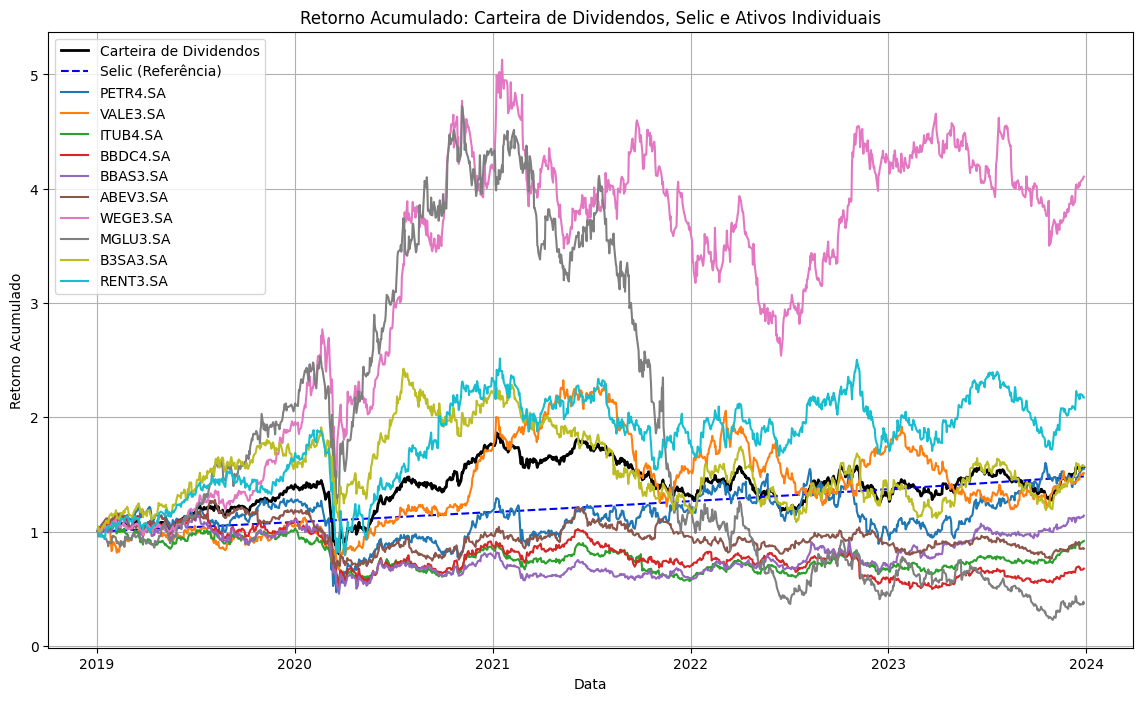

In [70]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

end_date = '2024-01-01'
start_date = '2019-01-01'


# Baixar os dados históricos de fechamento
df_fechamento = yf.download(acoes_b3, start=start_date, end=end_date)['Close']
df_fechamento = df_fechamento.dropna(axis=1, thresh=int(0.8 * len(df_fechamento)))
df_fechamento = df_fechamento.fillna(method='ffill').fillna(method='bfill')

# Obter Dividend Yield (DY) real de cada ação
dividend_yield_real = {}

for ticker in acoes_b3:
    # Verificar se o ticker está presente nos dados de fechamento
    if ticker not in df_fechamento.columns:
        print(f"Ticker {ticker} não está presente nos dados de fechamento. Ignorando.")
        continue

    # Baixar os dados de dividendos pagos pela ação
    stock = yf.Ticker(ticker)
    dividendos = stock.dividends

    # Verificar se dividendos estão disponíveis
    if not dividendos.empty:
        # Garantir que o índice de dividendos seja do tipo datetime
        dividendos.index = pd.to_datetime(dividendos.index)
        
        # Filtrar dividendos para o intervalo de datas
        dividendos = dividendos.loc[start_date:end_date]

        if not dividendos.empty:  # Verificar se há dividendos no período filtrado
            # Calcular o Dividend Yield: dividendo total por preço médio no período
            dividendos_anuais = dividendos.resample('Y').sum()  # Total de dividendos por ano
            preco_medio_ano = df_fechamento[ticker].resample('Y').mean()  # Preço médio anual

            # Calcular o Dividend Yield anual
            dividend_yield = dividendos_anuais / preco_medio_ano
            dividend_yield_real[ticker] = dividend_yield.mean()  # Média do Dividend Yield ao longo dos anos
        else:
            print(f"Sem dividendos no período para {ticker}")
    else:
        print(f"Sem dividendos para {ticker}")

# Exibir os Dividend Yields reais
dividend_yield_real_df = pd.DataFrame(dividend_yield_real, index=['Dividend Yield'])
print("Dividend Yield Real das Ações Selecionadas:")
print(dividend_yield_real_df)

# Selecionar as 10 ações com maior Dividend Yield
dividend_yield_simulado = pd.Series(dividend_yield_real).sort_values(ascending=False)
top_dividend_tickers = dividend_yield_simulado.head(10).index
pesos_dividendos = [1 / len(top_dividend_tickers)] * len(top_dividend_tickers)  # Pesos iguais

# Calcular retorno diário das ações selecionadas
retornos_diarios = df_fechamento[top_dividend_tickers].pct_change().dropna()
portfolio_retorno_diario = (retornos_diarios * pesos_dividendos).sum(axis=1)

# Calcular retorno acumulado da carteira de dividendos
retorno_acumulado_carteira = (1 + portfolio_retorno_diario).cumprod()

# Calcular retorno acumulado de cada ativo
retorno_acumulado_ativos = (1 + retornos_diarios).cumprod()

# Simular a Selic
selic_anual = 0.0832  # 8,32% ao ano
dias_uteis = 252  # Aproximadamente o número de dias úteis em um ano
selic_diaria = (1 + selic_anual) ** (1 / dias_uteis) - 1

# Criar uma série de retornos diários da Selic
datas = df_fechamento.index
retorno_diario_selic = pd.Series(selic_diaria, index=datas)

# Calcular retorno acumulado da Selic
retorno_acumulado_selic = (1 + retorno_diario_selic).cumprod()

# Calcular retorno acumulado final da carteira e de cada ativo
retorno_final_carteira = retorno_acumulado_carteira.iloc[-1] - 1
print(f"Retorno Acumulado Final da Carteira de Dividendos: {retorno_final_carteira:.2%}")

retorno_final_ativos = retorno_acumulado_ativos.iloc[-1] - 1
print("Retorno Acumulado Final de Cada Ativo na Carteira de Dividendos:")
for ticker, retorno in retorno_final_ativos.items():
    print(f"{ticker}: {retorno:.2%}")

# Plotar o retorno acumulado da carteira de dividendos, Selic e dos ativos
plt.figure(figsize=(14, 8))
plt.plot(retorno_acumulado_carteira, label='Carteira de Dividendos', color='black', linewidth=2)
plt.plot(retorno_acumulado_selic, label='Selic (Referência)', color='blue', linestyle='--')
for ticker in top_dividend_tickers:
    plt.plot(retorno_acumulado_ativos[ticker], label=f'{ticker}')

plt.title('Retorno Acumulado: Carteira de Dividendos, Selic e Ativos Individuais')
plt.xlabel('Data')
plt.ylabel('Retorno Acumulado')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


[*********************100%***********************]  301 of 302 completed

144 Failed downloads:
[*********************100%***********************]  301 of 302 completed['ENBR3.SA', 'PGFN11.SA', 'IFR3.SA', 'COCA11.SA', 'AFLA11.SA', 'IRLM11.SA', 'LVRI11.SA', 'PEEL11.SA', 'FAMA11.SA', 'RLOG3.SA', 'MCLG11.SA', 'MRLN3.SA', 'GTWL11.SA', 'ABBA11.SA', 'MAXF11.SA', 'VTRA11.SA', 'NATU3.SA', 'WBFF11.SA', 'TISS11.SA', 'MOGL11.SA', 'SHPF11.SA', 'CPLF11.SA', 'FOFF11.SA', 'OMGI11.SA', 'VAMC11.SA', 'SIGA11.SA', 'CESP6.SA', 'SBPR11.SA', 'RBGF11.SA', 'VITT11.SA', 'TGPR11.SA', 'PARD3.SA', 'SMART11.SA', 'KGLG11.SA', 'FGTR11.SA', 'RVAL11.SA', 'TIET11.SA', 'TEEB11.SA', 'PNSH11.SA', 'LIRR11.SA', 'GOAL11.SA', 'LAME4.SA', 'JUNO11.SA', 'HIRA11.SA', 'BRML3.SA', 'SUGO11.SA', 'AGLU11.SA', 'SPTI11.SA', 'SHUL11.SA', 'RMRF11.SA', 'IRAC11.SA', 'FLID11.SA', 'MOEM11.SA', 'FRTA3.SA', 'RAIZ3.SA', 'TSMT11.SA', 'PTBL11.SA', 'ATIVO11.SA', 'VIIA3.SA', 'CEAR11.SA', 'RUSO11.SA', 'HREN11.SA', 'GOUV11.SA', 'TDFX11.SA', 'VFIX11.SA

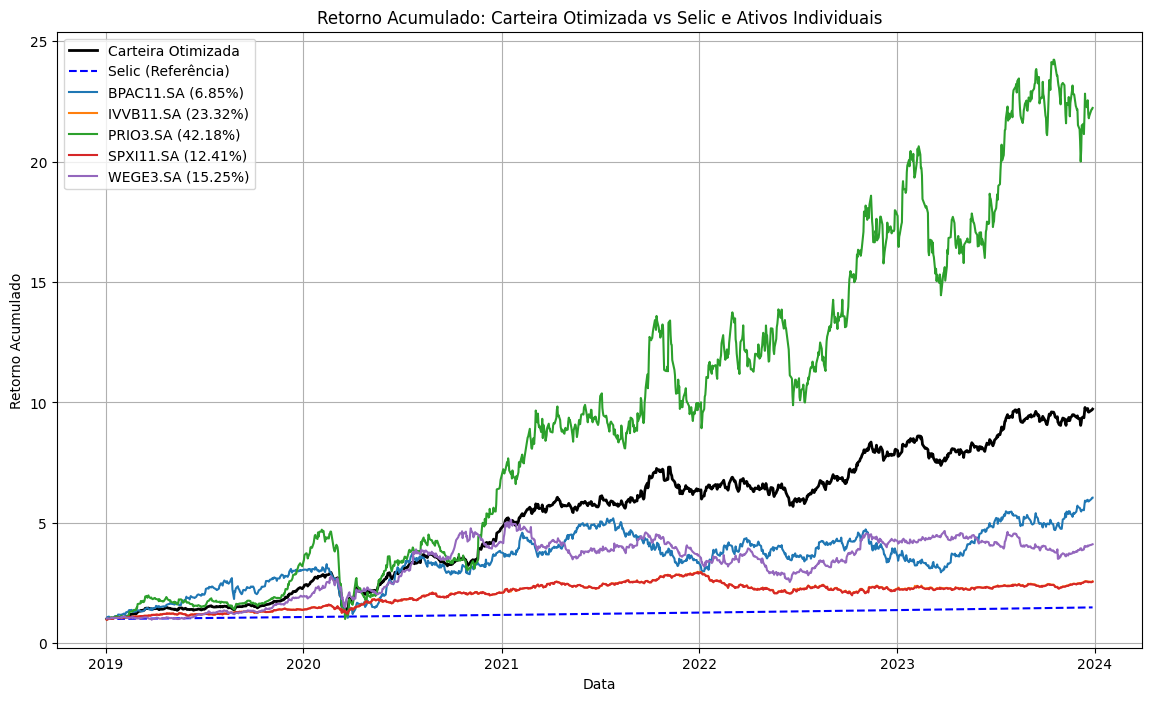

Retorno Acumulado Final da Carteira: 872.24%
Retorno Acumulado Final da Selic: 48.23%


In [30]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypfopt import expected_returns, risk_models, EfficientFrontier

# Parâmetros de período
# Supomos que `acoes_b3`, `start_date` e `end_date` já estão definidos

# Baixar os dados históricos de fechamento
df_fechamento = yf.download(acoes_b3, start=start_date, end=end_date)['Close']
df_fechamento = df_fechamento.dropna(axis=1, thresh=int(0.8 * len(df_fechamento)))
df_fechamento = df_fechamento.fillna(method='ffill').fillna(method='bfill')

# Calcular retornos esperados e matriz de covariância
retornos_esperados = expected_returns.mean_historical_return(df_fechamento)
matriz_cov = risk_models.sample_cov(df_fechamento)

# Otimizar a carteira para maximizar o Sharpe Ratio
ef = EfficientFrontier(retornos_esperados, matriz_cov)
pesos_otimos = ef.max_sharpe(risk_free_rate=0.083)  # Exemplo: 8,3% ao ano como taxa livre de risco
limpando_pesos = ef.clean_weights()

# Calcular retorno diário do portfólio otimizado
pesos_array = np.array(list(limpando_pesos.values()))
retornos_diarios = df_fechamento.pct_change().dropna()
portfolio_retorno_diario = (retornos_diarios * pesos_array).sum(axis=1)

# Calcular retorno acumulado da carteira
retorno_acumulado_carteira = (1 + portfolio_retorno_diario).cumprod()

# Adicionar Selic como benchmark
selic_anual = 0.0832  
dias_uteis = 252
selic_diaria = (1 + selic_anual) ** (1 / dias_uteis) - 1

# Criar uma série de retornos diários da Selic
datas = df_fechamento.index
retorno_diario_selic = pd.Series(selic_diaria, index=datas)

# Calcular retorno acumulado da Selic
retorno_acumulado_selic = (1 + retorno_diario_selic).cumprod()

# Calcular retorno acumulado de cada ativo da carteira
retorno_acumulado_ativos = (1 + retornos_diarios).cumprod()

# Plotar comparações
plt.figure(figsize=(14, 8))
plt.plot(retorno_acumulado_carteira, label='Carteira Otimizada', color='black', linewidth=2)
plt.plot(retorno_acumulado_selic, label='Selic (Referência)', color='blue', linestyle='--')
for ticker, peso in limpando_pesos.items():
    if peso > 0:
        plt.plot(retorno_acumulado_ativos[ticker], label=f'{ticker} ({peso:.2%})')

plt.title('Retorno Acumulado: Carteira Otimizada vs Selic e Ativos Individuais')
plt.xlabel('Data')
plt.ylabel('Retorno Acumulado')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# Calcular retorno final acumulado
retorno_final_carteira = retorno_acumulado_carteira.iloc[-1] - 1
retorno_final_selic = retorno_acumulado_selic.iloc[-1] - 1

print(f"Retorno Acumulado Final da Carteira: {retorno_final_carteira:.2%}")
print(f"Retorno Acumulado Final da Selic: {retorno_final_selic:.2%}")


[*********************100%***********************]  301 of 302 completed

144 Failed downloads:
['ENBR3.SA', 'PGFN11.SA', 'IFR3.SA', 'COCA11.SA', 'AFLA11.SA', 'LVRI11.SA', 'IRLM11.SA', 'PEEL11.SA', 'FAMA11.SA', 'RLOG3.SA', 'MCLG11.SA', 'MRLN3.SA', 'MAXF11.SA', 'GTWL11.SA', 'ABBA11.SA', 'VTRA11.SA', 'NATU3.SA', 'WBFF11.SA', 'MOGL11.SA', 'CPLF11.SA', 'TISS11.SA', 'SHPF11.SA', 'FOFF11.SA', 'OMGI11.SA', 'SIGA11.SA', 'VAMC11.SA', 'CESP6.SA', 'SBPR11.SA', 'VITT11.SA', 'RBGF11.SA', 'TGPR11.SA', 'PARD3.SA', 'SMART11.SA', 'KGLG11.SA', 'FGTR11.SA', 'RVAL11.SA', 'TEEB11.SA', 'TIET11.SA', 'LIRR11.SA', 'GOAL11.SA', 'PNSH11.SA', 'LAME4.SA', 'JUNO11.SA', 'HIRA11.SA', 'BRML3.SA', 'SUGO11.SA', 'SHUL11.SA', 'AGLU11.SA', 'SPTI11.SA', 'IRAC11.SA', 'RMRF11.SA', 'MOEM11.SA', 'FLID11.SA', 'FRTA3.SA', 'RAIZ3.SA', 'TSMT11.SA', 'PTBL11.SA', 'ATIVO11.SA', 'VIIA3.SA', 'CEAR11.SA', 'RUSO11.SA', 'HREN11.SA', 'TDFX11.SA', 'GOUV11.SA', 'VFIX11.SA', 'MDLA11.SA', 'GGFI11.SA', 'FIDI11.SA', 'CPSO11.SA', 'RHDF11.SA', 'VIN

Retorno Acumulado Final da Carteira de Momentum: 88.02%
Retorno Acumulado Final de Cada Ativo na Carteira de Momentum:
SEER3.SA: -51.18%
BRFS3.SA: -35.18%
CSNA3.SA: 113.46%
JBSS3.SA: 106.89%
UGPA3.SA: 111.78%
ECOR3.SA: -1.88%
MRFG3.SA: 72.66%
SBSP3.SA: 119.29%
POMO4.SA: 66.27%
VBBR3.SA: -12.46%


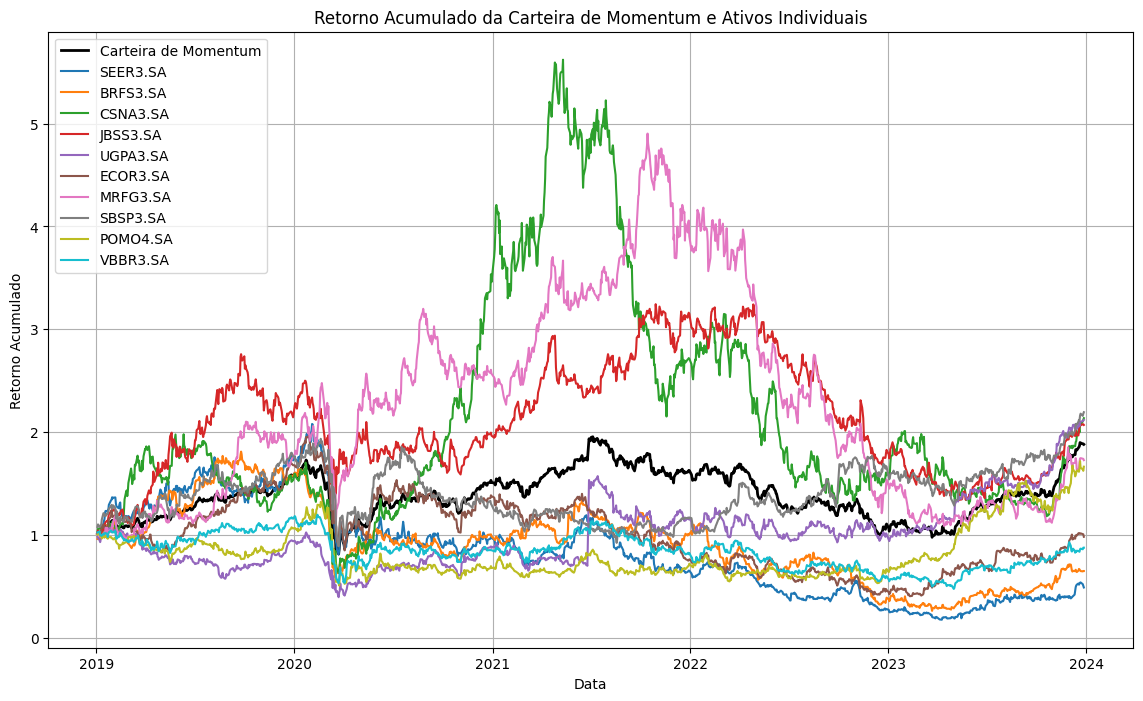

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Baixar os dados históricos de fechamento
df_fechamento = yf.download(acoes_b3, start=start_date, end=end_date)['Close']
df_fechamento = df_fechamento.dropna(axis=1, thresh=int(0.8 * len(df_fechamento)))
df_fechamento = df_fechamento.fillna(method='ffill').fillna(method='bfill')

# Calcular retornos acumulados de 6 meses (126 dias úteis) para a estratégia de momentum
retorno_6m = df_fechamento.pct_change(126).iloc[126:]  # Retornos acumulados de 6 meses
momentum_scores = retorno_6m.iloc[-1].sort_values(ascending=False)

# Selecionar as 10 ações com melhor desempenho em termos de momentum
top_momentum_tickers = momentum_scores.head(10).index
pesos_momentum = [1 / len(top_momentum_tickers)] * len(top_momentum_tickers)  # Pesos iguais

# Calcular retorno diário das ações selecionadas
retornos_diarios = df_fechamento[top_momentum_tickers].pct_change().dropna()
portfolio_retorno_diario = (retornos_diarios * pesos_momentum).sum(axis=1)

# Calcular retorno acumulado da carteira de momentum
retorno_acumulado_carteira = (1 + portfolio_retorno_diario).cumprod()

# Calcular retorno acumulado de cada ativo
retorno_acumulado_ativos = (1 + retornos_diarios).cumprod()

# Calcular retorno acumulado final da carteira e de cada ativo
retorno_final_carteira = retorno_acumulado_carteira.iloc[-1] - 1
print(f"Retorno Acumulado Final da Carteira de Momentum: {retorno_final_carteira:.2%}")

retorno_final_ativos = retorno_acumulado_ativos.iloc[-1] - 1
print("Retorno Acumulado Final de Cada Ativo na Carteira de Momentum:")
for ticker, retorno in retorno_final_ativos.items():
    print(f"{ticker}: {retorno:.2%}")

# Plotar o retorno acumulado da carteira de momentum e dos ativos
plt.figure(figsize=(14, 8))
plt.plot(retorno_acumulado_carteira, label='Carteira de Momentum', color='black', linewidth=2)
for ticker in top_momentum_tickers:
    plt.plot(retorno_acumulado_ativos[ticker], label=f'{ticker}')

plt.title('Retorno Acumulado da Carteira de Momentum e Ativos Individuais')
plt.xlabel('Data')
plt.ylabel('Retorno Acumulado')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


[*********************100%***********************]  301 of 302 completed

144 Failed downloads:
['PGFN11.SA', 'IFR3.SA', 'COCA11.SA', 'ENBR3.SA', 'AFLA11.SA', 'LVRI11.SA', 'IRLM11.SA', 'RLOG3.SA', 'PEEL11.SA', 'FAMA11.SA', 'MCLG11.SA', 'MRLN3.SA', 'GTWL11.SA', 'MAXF11.SA', 'ABBA11.SA', 'NATU3.SA', 'VTRA11.SA', 'WBFF11.SA', 'MOGL11.SA', 'TISS11.SA', 'CPLF11.SA', 'SHPF11.SA', 'FOFF11.SA', 'OMGI11.SA', 'VAMC11.SA', 'SIGA11.SA', 'CESP6.SA', 'SBPR11.SA', 'VITT11.SA', 'RBGF11.SA', 'PARD3.SA', 'TGPR11.SA', 'SMART11.SA', 'KGLG11.SA', 'FGTR11.SA', 'RVAL11.SA', 'TEEB11.SA', 'TIET11.SA', 'PNSH11.SA', 'LIRR11.SA', 'GOAL11.SA', 'LAME4.SA', 'HIRA11.SA', 'JUNO11.SA', 'SUGO11.SA', 'BRML3.SA', 'AGLU11.SA', 'SPTI11.SA', 'SHUL11.SA', 'RMRF11.SA', 'IRAC11.SA', 'MOEM11.SA', 'FLID11.SA', 'FRTA3.SA', 'RAIZ3.SA', 'TSMT11.SA', 'PTBL11.SA', 'ATIVO11.SA', 'VIIA3.SA', 'CEAR11.SA', 'RUSO11.SA', 'HREN11.SA', 'TDFX11.SA', 'GOUV11.SA', 'VFIX11.SA', 'MDLA11.SA', 'FIDI11.SA', 'GGFI11.SA', 'RHDF11.SA', 'VINC11.SA', 'CPS

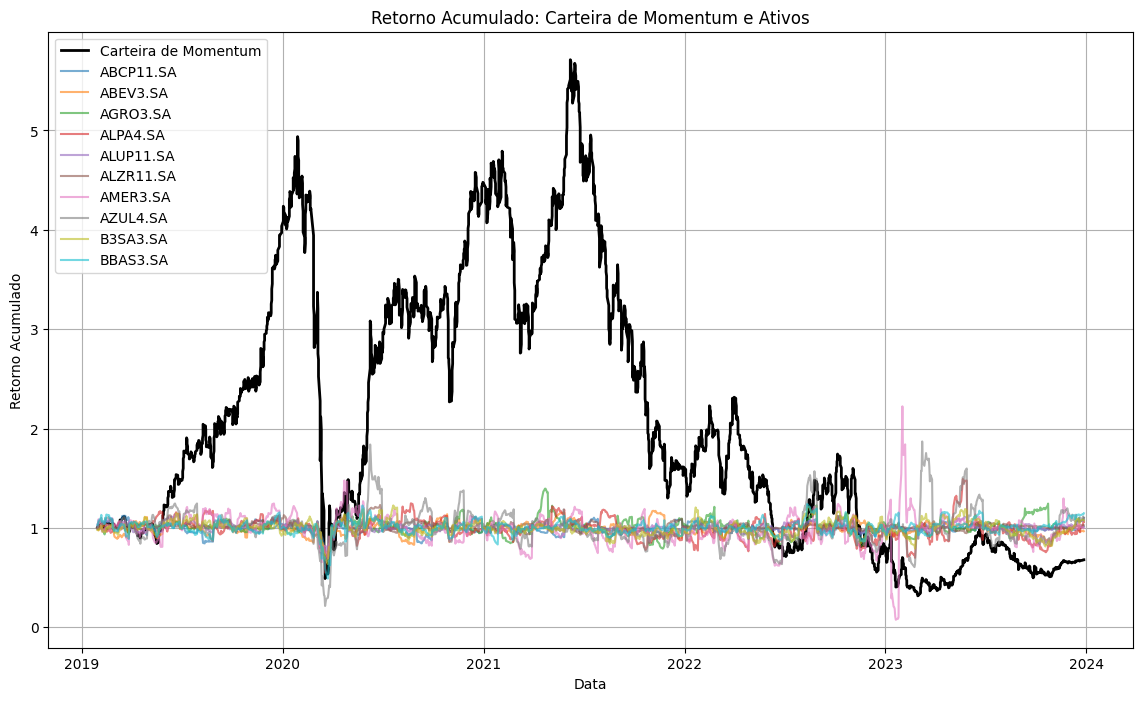

In [79]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Baixar os dados históricos de fechamento
df_fechamento = yf.download(acoes_b3, start=start_date, end=end_date)['Close']
df_fechamento = df_fechamento.dropna(axis=1, thresh=int(0.8 * len(df_fechamento)))
df_fechamento = df_fechamento.fillna(method='ffill').fillna(method='bfill')

# Tornar o índice timezone-naive
df_fechamento.index = df_fechamento.index.tz_localize(None)

# Período de rebalanceamento (mensal, trimestral, etc.)
rebalanceamento_mensal = pd.date_range(start=start_date, end=end_date, freq='M')

# Inicializar variáveis para rebalanceamento
retornos_carteira = []
retornos_ativos = pd.DataFrame(index=df_fechamento.index, columns=df_fechamento.columns)

# Loop de rebalanceamento
for data in rebalanceamento_mensal:
    # Selecionar as 10 ações com melhor desempenho em termos de momentum
    data_inicio = data - pd.DateOffset(days=126)  # 126 dias úteis = 6 meses
    if data_inicio < df_fechamento.index[0]:
        continue  # Pular se o início estiver fora do range dos dados

    # Calcular o momentum do período
    momento_periodo = df_fechamento.loc[data_inicio:data].pct_change(126).iloc[-1]
    momento_periodo = momento_periodo.sort_values(ascending=False).head(10)

    # Selecionar tickers de maior momentum
    top_momentum_tickers = momento_periodo.index

    # Pesos iguais para os ativos selecionados
    pesos_momentum = [1 / len(top_momentum_tickers)] * len(top_momentum_tickers)

    # Calcular retorno diário da carteira para o período atual
    retornos_diarios = df_fechamento[top_momentum_tickers].loc[data_inicio:data].pct_change().dropna()
    retorno_portfolio = (retornos_diarios * pesos_momentum).sum(axis=1)

    # Registrar o retorno acumulado dos ativos selecionados
    for ticker in top_momentum_tickers:
        retornos_ativos[ticker].loc[retornos_diarios.index] = (1 + retornos_diarios[ticker]).cumprod()

    retornos_carteira.append(retorno_portfolio)

# Concatenar todos os retornos dos períodos
retorno_diario_total = pd.concat(retornos_carteira).sort_index()

# Retorno acumulado da carteira
retorno_acumulado_carteira = (1 + retorno_diario_total).cumprod()

# Plotar o retorno acumulado da carteira e dos ativos
plt.figure(figsize=(14, 8))
plt.plot(retorno_acumulado_carteira, label='Carteira de Momentum', color='black', linewidth=2)
for ticker in retornos_ativos.columns:
    if retornos_ativos[ticker].notna().sum() > 0:  # Somente plotar se o ativo participou da carteira
        plt.plot(retornos_ativos[ticker], label=ticker, alpha=0.6)
plt.title('Retorno Acumulado: Carteira de Momentum e Ativos')
plt.xlabel('Data')
plt.ylabel('Retorno Acumulado')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


[*********************100%***********************]  301 of 302 completed

144 Failed downloads:
[*********************100%***********************]  301 of 302 completed['PGFN11.SA', 'ENBR3.SA', 'IFR3.SA', 'COCA11.SA', 'AFLA11.SA', 'LVRI11.SA', 'IRLM11.SA', 'FAMA11.SA', 'PEEL11.SA', 'RLOG3.SA', 'MCLG11.SA', 'MRLN3.SA', 'GTWL11.SA', 'MAXF11.SA', 'ABBA11.SA', 'VTRA11.SA', 'NATU3.SA', 'WBFF11.SA', 'MOGL11.SA', 'TISS11.SA', 'CPLF11.SA', 'SHPF11.SA', 'FOFF11.SA', 'OMGI11.SA', 'VAMC11.SA', 'SIGA11.SA', 'CESP6.SA', 'SBPR11.SA', 'RBGF11.SA', 'VITT11.SA', 'TGPR11.SA', 'PARD3.SA', 'KGLG11.SA', 'SMART11.SA', 'FGTR11.SA', 'TEEB11.SA', 'RVAL11.SA', 'TIET11.SA', 'PNSH11.SA', 'GOAL11.SA', 'LIRR11.SA', 'LAME4.SA', 'HIRA11.SA', 'JUNO11.SA', 'BRML3.SA', 'SUGO11.SA', 'AGLU11.SA', 'SPTI11.SA', 'SHUL11.SA', 'RMRF11.SA', 'IRAC11.SA', 'FLID11.SA', 'MOEM11.SA', 'FRTA3.SA', 'RAIZ3.SA', 'TSMT11.SA', 'PTBL11.SA', 'ATIVO11.SA', 'CEAR11.SA', 'VIIA3.SA', 'HREN11.SA', 'TDFX11.SA', 'RUSO11.SA', 'GOUV11.SA', 'MDLA11.SA

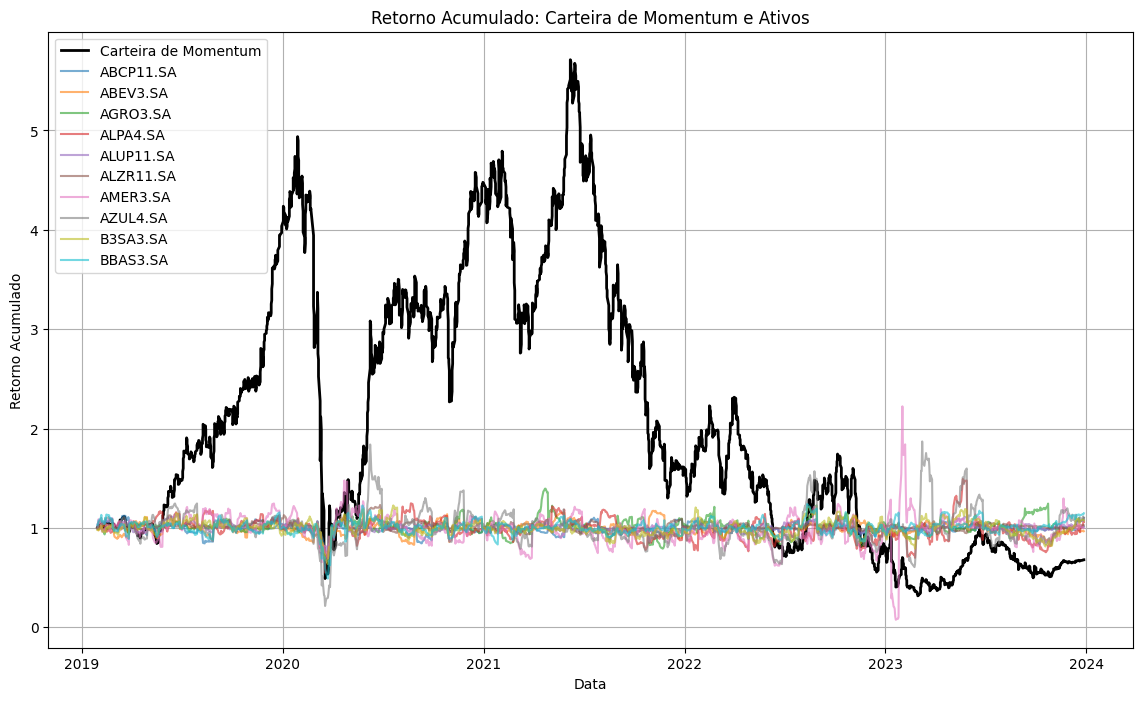

In [87]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Baixar os dados históricos de fechamento
df_fechamento = yf.download(acoes_b3, start=start_date, end=end_date)['Close']
df_fechamento = df_fechamento.dropna(axis=1, thresh=int(0.8 * len(df_fechamento)))
df_fechamento = df_fechamento.fillna(method='ffill').fillna(method='bfill')

# Tornar o índice timezone-naive
df_fechamento.index = df_fechamento.index.tz_localize(None)

# Período de rebalanceamento (mensal, trimestral, etc.)
rebalanceamento_mensal = pd.date_range(start=start_date, end=end_date, freq='M')

# Inicializar variáveis para rebalanceamento
retornos_carteira = []
retornos_ativos = pd.DataFrame(index=df_fechamento.index, columns=df_fechamento.columns)

# Loop de rebalanceamento
for data in rebalanceamento_mensal:
    # Selecionar as 10 ações com melhor desempenho em termos de momentum
    data_inicio = data - pd.DateOffset(days=126)  # 126 dias úteis = 6 meses
    if data_inicio < df_fechamento.index[0]:
        continue  # Pular se o início estiver fora do range dos dados

    # Calcular o momentum do período
    momento_periodo = df_fechamento.loc[data_inicio:data].pct_change(126).iloc[-1]
    momento_periodo = momento_periodo.head(10)

    # Selecionar tickers de maior momentum
    top_momentum_tickers = momento_periodo.index

    # Pesos iguais para os ativos selecionados
    pesos_momentum = [1 / len(top_momentum_tickers)] * len(top_momentum_tickers)

    # Calcular retorno diário da carteira para o período atual
    retornos_diarios = df_fechamento[top_momentum_tickers].loc[data_inicio:data].pct_change().dropna()
    retorno_portfolio = (retornos_diarios * pesos_momentum).sum(axis=1)

    # Registrar o retorno acumulado dos ativos selecionados
    for ticker in top_momentum_tickers:
        retornos_ativos[ticker].loc[retornos_diarios.index] = (1 + retornos_diarios[ticker]).cumprod()

    retornos_carteira.append(retorno_portfolio)

# Concatenar todos os retornos dos períodos
retorno_diario_total = pd.concat(retornos_carteira).sort_index()

# Retorno acumulado da carteira
retorno_acumulado_carteira = (1 + retorno_diario_total).cumprod()

# Plotar o retorno acumulado da carteira e dos ativos
plt.figure(figsize=(14, 8))
plt.plot(retorno_acumulado_carteira, label='Carteira de Momentum', color='black', linewidth=2)
for ticker in retornos_ativos.columns:
    if retornos_ativos[ticker].notna().sum() > 0:  # Somente plotar se o ativo participou da carteira
        plt.plot(retornos_ativos[ticker], label=ticker, alpha=0.6)
plt.title('Retorno Acumulado: Carteira de Momentum e Ativos')
plt.xlabel('Data')
plt.ylabel('Retorno Acumulado')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


[*********************100%***********************]  302 of 302 completed

145 Failed downloads:
['PGFN11.SA', 'ENBR3.SA', 'IFR3.SA', 'COCA11.SA', 'AFLA11.SA', 'IRLM11.SA', 'LVRI11.SA', 'FAMA11.SA', 'PEEL11.SA', 'RLOG3.SA', 'MCLG11.SA', 'MRLN3.SA', 'GTWL11.SA', 'MAXF11.SA', 'ABBA11.SA', 'VTRA11.SA', 'NATU3.SA', 'WBFF11.SA', 'MOGL11.SA', 'TISS11.SA', 'CPLF11.SA', 'SHPF11.SA', 'FOFF11.SA', 'OMGI11.SA', 'VAMC11.SA', 'SIGA11.SA', 'CESP6.SA', 'RBGF11.SA', 'SBPR11.SA', 'VITT11.SA', 'PARD3.SA', 'TGPR11.SA', 'KGLG11.SA', 'SMART11.SA', 'FGTR11.SA', 'TEEB11.SA', 'RVAL11.SA', 'TIET11.SA', 'PNSH11.SA', 'LIRR11.SA', 'GOAL11.SA', 'LAME4.SA', 'HIRA11.SA', 'JUNO11.SA', 'BRML3.SA', 'SUGO11.SA', 'AGLU11.SA', 'SPTI11.SA', 'SHUL11.SA', 'IRAC11.SA', 'RMRF11.SA', 'MOEM11.SA', 'FLID11.SA', 'FRTA3.SA', 'RAIZ3.SA', 'TSMT11.SA', 'PTBL11.SA', 'ATIVO11.SA', 'VIIA3.SA', 'CEAR11.SA', 'RUSO11.SA', 'HREN11.SA', 'TDFX11.SA', 'VFIX11.SA', 'GOUV11.SA', 'MDLA11.SA', 'FIDI11.SA', 'GGFI11.SA', 'CPSO11.SA', 'RHDF11.SA', 'VIN

Retorno acumulado da Carteira Momentum: -32.05%


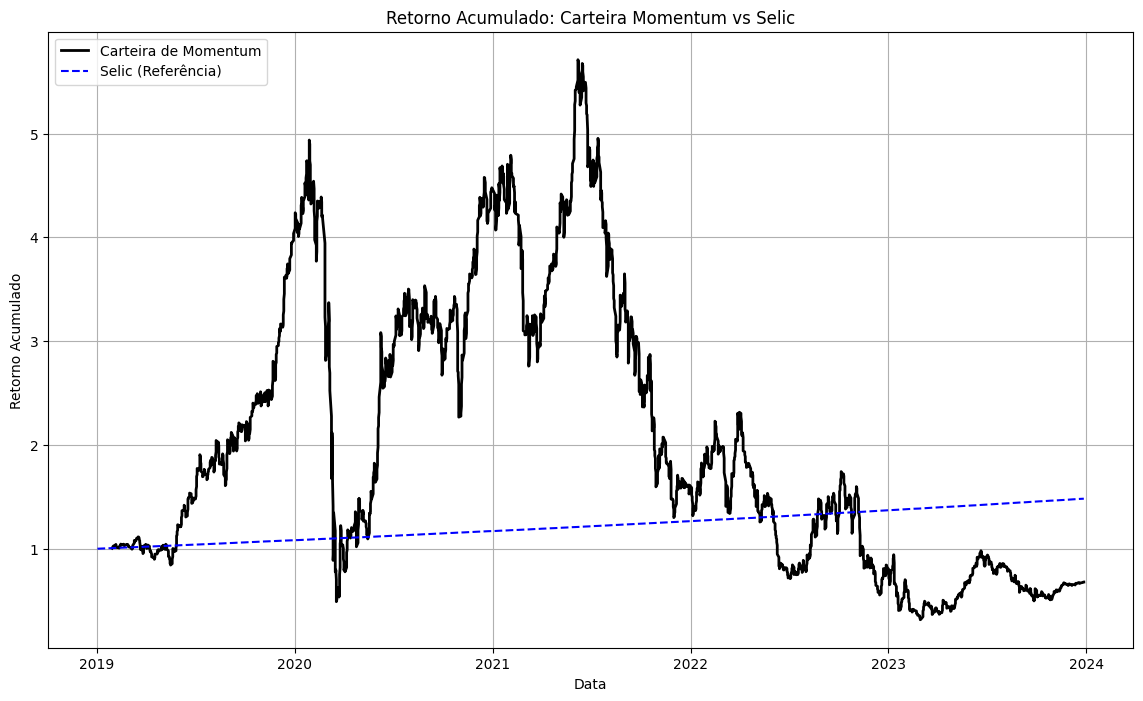

Retorno Acumulado Final da Carteira: -32.05%
Retorno Acumulado Final da Selic: 48.23%


In [116]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Baixar os dados históricos de fechamento
df_fechamento = yf.download(acoes_b3, start=start_date, end=end_date)['Close']
df_fechamento = df_fechamento.dropna(axis=1, thresh=int(0.8 * len(df_fechamento)))
df_fechamento = df_fechamento.fillna(method='ffill').fillna(method='bfill')

# Tornar o índice timezone-naive
df_fechamento.index = df_fechamento.index.tz_localize(None)

# Período de rebalanceamento (mensal)
rebalanceamento_mensal = pd.date_range(start=start_date, end=end_date, freq='M')

# Inicializar variáveis para rebalanceamento
retornos_carteira = []

# Loop de rebalanceamento
for data in rebalanceamento_mensal:
    # Selecionar as 10 ações com melhor desempenho em termos de momentum
    data_inicio = data - pd.DateOffset(days=126)  # 126 dias úteis = 6 meses
    if data_inicio < df_fechamento.index[0]:
        continue  # Pular se o início estiver fora do range dos dados

    # Calcular o momentum do período
    momento_periodo = df_fechamento.loc[data_inicio:data].pct_change(126).iloc[-1]
    momento_periodo = momento_periodo.sort_values(ascending=False).head(10)

    # Selecionar tickers de maior momentum
    top_momentum_tickers = momento_periodo.index

    # Pesos iguais para os ativos selecionados
    pesos_momentum = [1 / len(top_momentum_tickers)] * len(top_momentum_tickers)

    # Calcular retorno diário da carteira para o período atual
    retornos_diarios = df_fechamento[top_momentum_tickers].loc[data_inicio:data].pct_change().dropna()
    retorno_portfolio = (retornos_diarios * pesos_momentum).sum(axis=1)

    retornos_carteira.append(retorno_portfolio)

# Concatenar todos os retornos dos períodos
retorno_diario_total = pd.concat(retornos_carteira).sort_index()

# Retorno acumulado da carteira
retorno_acumulado_carteira = (1 + retorno_diario_total).cumprod()

# Adicionar Selic como benchmark
selic_anual = 0.0832  # Taxa Selic anual de exemplo
dias_uteis = 252  # Número de dias úteis por ano
selic_diaria = (1 + selic_anual) ** (1 / dias_uteis) - 1  # Taxa diária da Selic

# Criar uma série de retornos diários da Selic
datas = df_fechamento.index
retorno_diario_selic = pd.Series(selic_diaria, index=datas)

# Calcular retorno acumulado da Selic
retorno_acumulado_selic = (1 + retorno_diario_selic).cumprod()

# Exibir o retorno acumulado em porcentagem da carteira
print(f"Retorno acumulado da Carteira Momentum: {((retorno_acumulado_carteira[-1] - 1) * 100):.2f}%")

# Plotar o retorno acumulado da carteira e da Selic
plt.figure(figsize=(14, 8))
plt.plot(retorno_acumulado_carteira, label='Carteira de Momentum', color='black', linewidth=2)
plt.plot(retorno_acumulado_selic, label='Selic (Referência)', color='blue', linestyle='--')

# Adicionar título, rótulos e legenda
plt.title('Retorno Acumulado: Carteira Momentum vs Selic')
plt.xlabel('Data')
plt.ylabel('Retorno Acumulado')
plt.legend(loc='upper left')
plt.grid(True)

# Mostrar o gráfico
plt.show()

# Calcular retorno final acumulado
retorno_final_carteira = retorno_acumulado_carteira.iloc[-1] - 1
retorno_final_selic = retorno_acumulado_selic.iloc[-1] - 1

# Exibir os retornos finais
print(f"Retorno Acumulado Final da Carteira: {retorno_final_carteira:.2%}")
print(f"Retorno Acumulado Final da Selic: {retorno_final_selic:.2%}")


[*********************100%***********************]  301 of 302 completed

144 Failed downloads:
[*********************100%***********************]  301 of 302 completed['ENBR3.SA', 'PGFN11.SA', 'IFR3.SA', 'COCA11.SA', 'AFLA11.SA', 'LVRI11.SA', 'IRLM11.SA', 'FAMA11.SA', 'PEEL11.SA', 'RLOG3.SA', 'MCLG11.SA', 'MRLN3.SA', 'GTWL11.SA', 'ABBA11.SA', 'MAXF11.SA', 'VTRA11.SA', 'NATU3.SA', 'WBFF11.SA', 'MOGL11.SA', 'CPLF11.SA', 'TISS11.SA', 'FOFF11.SA', 'SHPF11.SA', 'OMGI11.SA', 'VAMC11.SA', 'SIGA11.SA', 'CESP6.SA', 'RBGF11.SA', 'VITT11.SA', 'SBPR11.SA', 'TGPR11.SA', 'PARD3.SA', 'KGLG11.SA', 'SMART11.SA', 'FGTR11.SA', 'RVAL11.SA', 'TIET11.SA', 'TEEB11.SA', 'LIRR11.SA', 'PNSH11.SA', 'GOAL11.SA', 'LAME4.SA', 'HIRA11.SA', 'JUNO11.SA', 'BRML3.SA', 'SUGO11.SA', 'AGLU11.SA', 'SHUL11.SA', 'SPTI11.SA', 'RMRF11.SA', 'IRAC11.SA', 'FLID11.SA', 'MOEM11.SA', 'FRTA3.SA', 'RAIZ3.SA', 'TSMT11.SA', 'PTBL11.SA', 'ATIVO11.SA', 'VIIA3.SA', 'CEAR11.SA', 'RUSO11.SA', 'HREN11.SA', 'TDFX11.SA', 'GOUV11.SA', 'VFIX11.SA

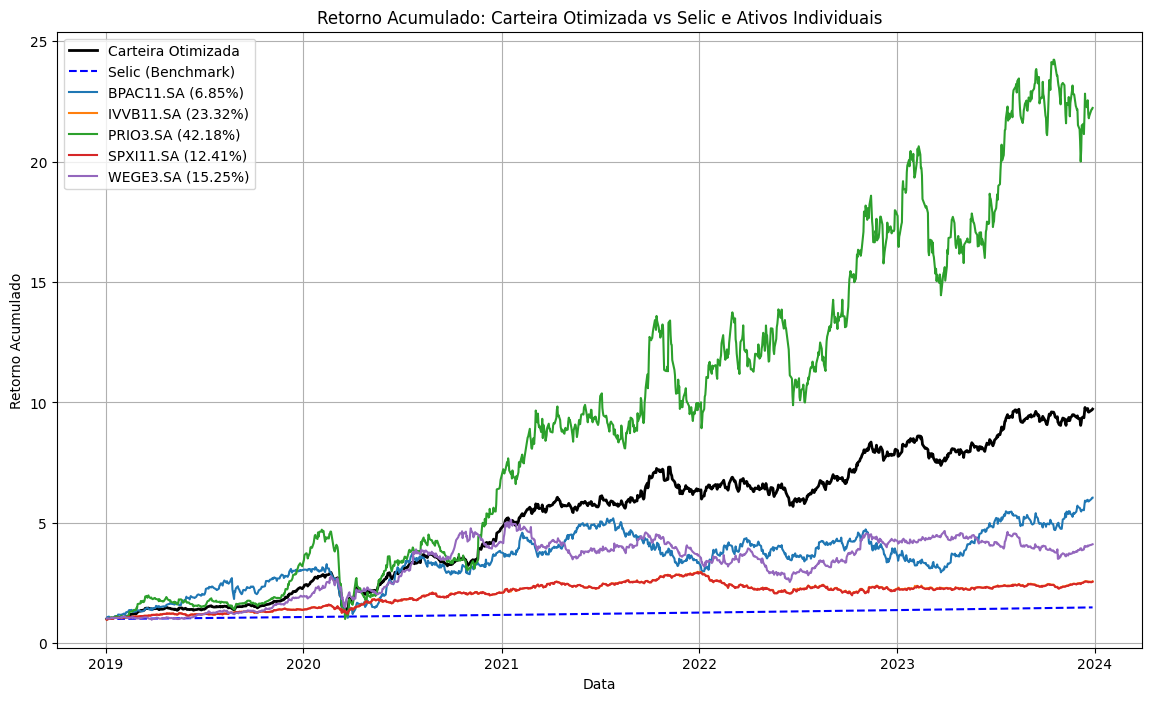

Retorno Acumulado Final da Carteira: 872.24%
Retorno Acumulado Final da Selic: 48.23%


In [114]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pypfopt import expected_returns, risk_models, EfficientFrontier

# Baixar os dados históricos de fechamento
df_fechamento = yf.download(acoes_b3, start=start_date, end=end_date)['Close']
df_fechamento = df_fechamento.dropna(axis=1, thresh=int(0.8 * len(df_fechamento)))
df_fechamento = df_fechamento.fillna(method='ffill').fillna(method='bfill')

# Calcular retornos esperados e matriz de covariância
retornos_esperados = expected_returns.mean_historical_return(df_fechamento)
matriz_cov = risk_models.sample_cov(df_fechamento)

# Otimizar a carteira para maximizar o Sharpe Ratio
ef = EfficientFrontier(retornos_esperados, matriz_cov)
pesos_otimos = ef.max_sharpe(risk_free_rate=0.083)  # Exemplo: 8,3% ao ano como taxa livre de risco
limpando_pesos = ef.clean_weights()

# Calcular retorno diário do portfólio otimizado
pesos_array = np.array(list(limpando_pesos.values()))
retornos_diarios = df_fechamento.pct_change().dropna()
portfolio_retorno_diario = (retornos_diarios * pesos_array).sum(axis=1)

# Calcular retorno acumulado da carteira
retorno_acumulado_carteira = (1 + portfolio_retorno_diario).cumprod()

# Adicionar Selic como benchmark
selic_anual = 0.0832  # Taxa Selic anual de exemplo
dias_uteis = 252  # Número de dias úteis por ano
selic_diaria = (1 + selic_anual) ** (1 / dias_uteis) - 1  # Taxa diária da Selic

# Criar uma série de retornos diários da Selic
datas = df_fechamento.index
retorno_diario_selic = pd.Series(selic_diaria, index=datas)

# Calcular retorno acumulado da Selic
retorno_acumulado_selic = (1 + retorno_diario_selic).cumprod()

# Calcular retorno acumulado de cada ativo da carteira
retorno_acumulado_ativos = (1 + retornos_diarios).cumprod()

# Plotar comparações
plt.figure(figsize=(14, 8))

# Plotar a linha da carteira otimizada
plt.plot(retorno_acumulado_carteira, label='Carteira Otimizada', color='black', linewidth=2)

# Plotar a linha da SELIC
plt.plot(retorno_acumulado_selic, label='Selic (Benchmark)', color='blue', linestyle='--')

# Plotar o retorno acumulado de cada ativo com seu peso na carteira
for ticker, peso in limpando_pesos.items():
    if peso > 0:
        plt.plot(retorno_acumulado_ativos[ticker], label=f'{ticker} ({peso:.2%})')

# Adicionar título, rótulos e legenda
plt.title('Retorno Acumulado: Carteira Otimizada vs Selic e Ativos Individuais')
plt.xlabel('Data')
plt.ylabel('Retorno Acumulado')
plt.legend(loc='upper left')
plt.grid(True)

# Mostrar o gráfico
plt.show()

# Calcular retorno final acumulado
retorno_final_carteira = retorno_acumulado_carteira.iloc[-1] - 1
retorno_final_selic = retorno_acumulado_selic.iloc[-1] - 1

# Exibir os retornos finais
print(f"Retorno Acumulado Final da Carteira: {retorno_final_carteira:.2%}")
print(f"Retorno Acumulado Final da Selic: {retorno_final_selic:.2%}")


C:\Users\User\AppData\Local\Temp\ipykernel_4792\1808563668.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fechamento = df_fechamento.fillna(method='ffill')
C:\Users\User\AppData\Local\Temp\ipykernel_4792\1808563668.py:13: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  retornos = df_fechamento.pct_change().fillna(0)
C:\Users\User\AppData\Local\Temp\ipykernel_4792\1808563668.py:24: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return pesos_dinamicos.ffill().fillna(0)  # Preen

Retorno TAA ao final do período: 68.05%


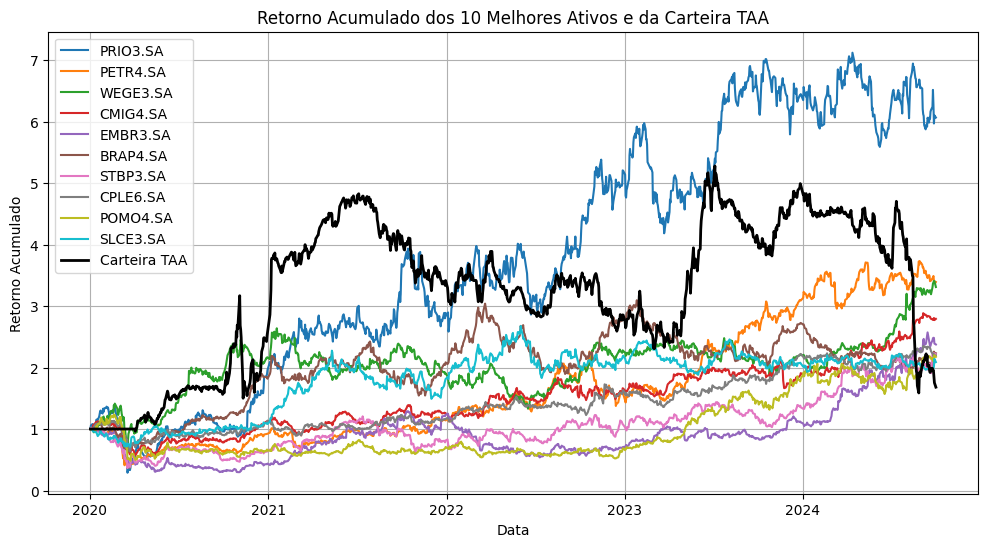

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Parâmetros
janela = 63  # Período de rebalanceamento, aqui definido como 63 dias úteis (~3 meses)
n_top_ativos = 10  # Número de ativos de melhor desempenho a serem plotados

# Preenchendo valores ausentes (para evitar NaNs no cálculo)
df_fechamento = df_fechamento.fillna(method='ffill')

# Calcular retornos diários
retornos = df_fechamento.pct_change().fillna(0)

# Função para calcular pesos baseados em desempenho recente (TAA)
def alocacao_tatica(retornos, janela):
    pesos_dinamicos = pd.DataFrame(index=retornos.index, columns=retornos.columns)
    
    for i in range(janela, len(retornos), janela):
        retornos_passados = retornos.iloc[i-janela:i].mean()  # Retorno médio dos últimos 3 meses
        pesos = retornos_passados / retornos_passados.sum()  # Pesos proporcionais ao retorno recente
        pesos_dinamicos.iloc[i:i+janela] = pesos  # Aplicar pesos até o próximo rebalanceamento

    return pesos_dinamicos.ffill().fillna(0)  # Preencher com o último peso calculado

# Calcular os pesos ajustados para cada ativo (estratégia TAA)
pesos_taa = alocacao_tatica(retornos, janela)

# Calcular retorno acumulado da TAA
retorno_taa = (pesos_taa.shift() * retornos).sum(axis=1)
retorno_acumulado_taa = (1 + retorno_taa).cumprod()

# Calcular o retorno final da estratégia
retorno_final_taa = retorno_acumulado_taa.iloc[-1] - 1
print(f"Retorno TAA ao final do período: {retorno_final_taa:.2%}")

# Calcular o retorno acumulado final de cada ativo
retorno_final_ativos = (1 + retornos).cumprod().iloc[-1] - 1

# Selecionar os 10 ativos com os maiores retornos finais
melhores_ativos = retorno_final_ativos.nlargest(n_top_ativos).index.tolist()

# Visualização gráfica dos retornos acumulados dos melhores ativos e da carteira TAA
plt.figure(figsize=(12, 6))

# Adicionar gráfico para os melhores ativos
for ticker in melhores_ativos:
    plt.plot((1 + retornos[ticker]).cumprod(), label=ticker)

# Adicionar gráfico da carteira TAA
plt.plot(retorno_acumulado_taa, label='Carteira TAA', color='black', linewidth=2)

# Customizações do gráfico
plt.title('Retorno Acumulado dos 10 Melhores Ativos e da Carteira TAA')
plt.xlabel('Data')
plt.ylabel('Retorno Acumulado')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


[*********************100%***********************]  301 of 302 completed

144 Failed downloads:
['ENBR3.SA', 'PGFN11.SA', 'IFR3.SA', 'COCA11.SA', 'AFLA11.SA', 'IRLM11.SA', 'LVRI11.SA', 'FAMA11.SA', 'PEEL11.SA', 'RLOG3.SA', 'MCLG11.SA', 'MRLN3.SA', 'GTWL11.SA', 'ABBA11.SA', 'MAXF11.SA', 'VTRA11.SA', 'NATU3.SA', 'WBFF11.SA', 'CPLF11.SA', 'MOGL11.SA', 'TISS11.SA', 'SHPF11.SA', 'OMGI11.SA', 'FOFF11.SA', 'VAMC11.SA', 'CESP6.SA', 'SIGA11.SA', 'VITT11.SA', 'RBGF11.SA', 'SBPR11.SA', 'PARD3.SA', 'TGPR11.SA', 'KGLG11.SA', 'SMART11.SA', 'FGTR11.SA', 'RVAL11.SA', 'TEEB11.SA', 'TIET11.SA', 'GOAL11.SA', 'LIRR11.SA', 'PNSH11.SA', 'LAME4.SA', 'JUNO11.SA', 'HIRA11.SA', 'BRML3.SA', 'SUGO11.SA', 'SPTI11.SA', 'AGLU11.SA', 'SHUL11.SA', 'IRAC11.SA', 'RMRF11.SA', 'FLID11.SA', 'MOEM11.SA', 'FRTA3.SA', 'RAIZ3.SA', 'PTBL11.SA', 'TSMT11.SA', 'ATIVO11.SA', 'VIIA3.SA', 'CEAR11.SA', 'HREN11.SA', 'TDFX11.SA', 'RUSO11.SA', 'GOUV11.SA', 'VFIX11.SA', 'MDLA11.SA', 'GGFI11.SA', 'FIDI11.SA', 'RHDF11.SA', 'CPSO11.SA', 'FEF

Retorno Acumulado Final da Carteira de Risk Parity: 51.08%
Retorno Acumulado Final da Selic: 48.23%


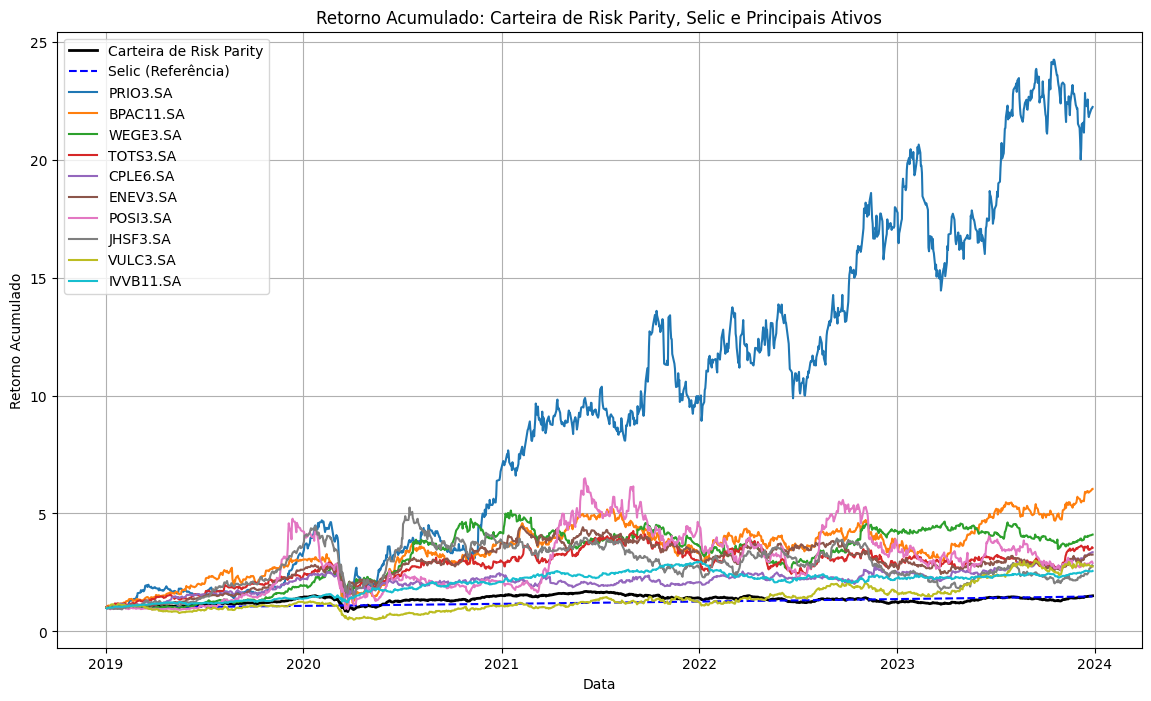

In [35]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Baixar os dados históricos de fechamento
df_fechamento = yf.download(acoes_b3, start=start_date, end=end_date)['Close']
df_fechamento = df_fechamento.dropna(axis=1, thresh=int(0.8 * len(df_fechamento)))
df_fechamento = df_fechamento.fillna(method='ffill').fillna(method='bfill')

# Calcular retornos diários e a matriz de covariância
retornos_diarios = df_fechamento.pct_change().dropna()
matriz_cov = retornos_diarios.cov()

# Função para calcular a volatilidade de cada ativo na carteira
def calcular_volatilidade(pesos):
    return np.sqrt(np.dot(pesos.T, np.dot(matriz_cov, pesos)))

# Função de minimização para otimizar a carteira de Risk Parity
def risk_parity_objetivo(pesos):
    vol_total = calcular_volatilidade(pesos)
    contrib_risco = pesos * np.dot(matriz_cov, pesos) / vol_total
    risco_paridade = np.sum((contrib_risco - np.mean(contrib_risco)) ** 2)
    return risco_paridade

# Restrições e inicialização dos pesos
n_ativos = len(df_fechamento.columns)
pesos_iniciais = np.array([1 / n_ativos] * n_ativos)
limites = ((0, 1),) * n_ativos  # Pesos entre 0 e 1
restricoes = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Otimização
resultado = minimize(risk_parity_objetivo, pesos_iniciais, method='SLSQP', bounds=limites, constraints=restricoes)
pesos_otimizados = resultado.x

# Calcular retorno diário do portfólio de Risk Parity
portfolio_retorno_diario = (retornos_diarios * pesos_otimizados).sum(axis=1)

# Calcular retorno acumulado da carteira de Risk Parity
retorno_acumulado_carteira = (1 + portfolio_retorno_diario).cumprod()

# Calcular retorno acumulado de cada ativo
retorno_acumulado_ativos = (1 + retornos_diarios).cumprod()

# Adicionar Selic como benchmark
selic_anual = 0.0832 # 8,32% ao ano
dias_uteis = 252
selic_diaria = (1 + selic_anual) ** (1 / dias_uteis) - 1

# Criar uma série de retornos diários da Selic
datas = df_fechamento.index
retorno_diario_selic = pd.Series(selic_diaria, index=datas)

# Calcular retorno acumulado da Selic
retorno_acumulado_selic = (1 + retorno_diario_selic).cumprod()

# Calcular retorno acumulado final da carteira
retorno_final_carteira = retorno_acumulado_carteira.iloc[-1] - 1

# Calcular retorno acumulado final da Selic
retorno_final_selic = retorno_acumulado_selic.iloc[-1] - 1

print(f"Retorno Acumulado Final da Carteira de Risk Parity: {retorno_final_carteira:.2%}")
print(f"Retorno Acumulado Final da Selic: {retorno_final_selic:.2%}")

# Plotar o retorno acumulado da carteira, ativos e Selic
plt.figure(figsize=(14, 8))
plt.plot(retorno_acumulado_carteira, label='Carteira de Risk Parity', color='black', linewidth=2)
plt.plot(retorno_acumulado_selic, label='Selic (Referência)', color='blue', linestyle='--')

# Selecionar os 10 ativos com maiores retornos acumulados finais
retorno_final_ativos = retorno_acumulado_ativos.iloc[-1] - 1
melhores_ativos = retorno_final_ativos.nlargest(10).index

for ticker in melhores_ativos:
    plt.plot(retorno_acumulado_ativos[ticker], label=ticker)

plt.title('Retorno Acumulado: Carteira de Risk Parity e Selic')
plt.xlabel('Data')
plt.ylabel('Retorno Acumulado')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()
